
# 🌾 CropAI: Crop Recommendation System Using Machine Learning

---

## 📌 Overview

**CropAI** is a machine learning-based recommendation system designed to suggest the most suitable crop to cultivate based on environmental and soil conditions. This project aims to improve agricultural productivity by leveraging data-driven insights from soil nutrients, temperature, humidity, pH levels, and rainfall.

Using a range of powerful classification algorithms, the system predicts which crop is most appropriate for given conditions, helping farmers make informed decisions.

---

## 🧩 Key Features

- Loads and preprocesses agricultural datasets
- Handles missing values and outlier detection
- Performs exploratory data analysis (EDA) to identify trends and anomalies
- Applies feature scaling to standardize input variables
- Trains multiple machine learning models, including:
  - Random Forest
  - XGBoost
  - Support Vector Machine (SVM)
  - K-Nearest Neighbors (KNN)
  - Logistic Regression
  - Gradient Boosting Classifier
  - Bagging Classifier
  - Extra Trees Classifier
- Evaluates models using metrics like accuracy, precision, recall, F1-score, and confusion matrix
- Visualizes feature importance for explainability
- Saves the best-performing model for deployment

---

## 🧪 Tech Stack

- **Language:** Python 3.x
- **Libraries:**
  - Data Manipulation: `pandas`, `numpy`
  - Visualization: `matplotlib`, `seaborn`
  - Machine Learning: `scikit-learn`, `xgboost`
  - Utilities: `warnings`, `os`, `joblib`

---

## 📂 Dataset Requirements


| Feature       | Description                          |
|---------------|--------------------------------------|
| N             | Nitrogen content in soil             |
| P             | Phosphorus content in soil           |
| K             | Potassium content in soil            |
| temperature   | Temperature in degrees Celsius       |
| humidity      | Relative humidity in %               |
| ph            | Soil pH value                        |
| rainfall      | Rainfall in mm                       |
| label         | Target variable (crop name)          |



---

## ✅ Usage Instructions

### 1. Install Dependencies

```bash
pip install pandas numpy matplotlib seaborn scikit-learn xgboost pickle
```

### 2. Run Jupyter Notebook


```bash
jupyter notebook crop_recommendation.ipynb
```

Or if using a Python script:

```bash
python crop_recommendation.py
```

### 3. Launch the Web App

```bash
streamlit run app.py
```

---

## 🔍 Workflow Explanation

### 1. Import Required Libraries
Import essential libraries for data processing, visualization, and machine learning.

### 2. Load and Understand Data
Load the dataset and examine its structure, including class distribution and feature statistics.

### 3. Exploratory Data Analysis (EDA)
Visualize feature distributions and relationships between features and the target crop.

### 4. Address Class Imbalance
Apply under-sampling if needed to ensure balanced representation of crop types.

### 5. Feature Scaling
Standardize the features to avoid bias due to feature magnitude differences.

### 6. Data Splitting
Split the dataset into training and test sets for fair model evaluation.

### 7. Train Multiple Models
Train various classifiers including ensemble, boosting, and linear models.

### 8. Evaluate Models
Evaluate models using classification metrics and visualize confusion matrices.

### 9. Select the Best Model
Choose the most accurate and generalizable model for deployment.

### 10. Save the Model
Serialize the selected model using `joblib` for future predictions.

---

## 📊 Example Output

- Accuracy scores of all trained models
- Confusion matrix heatmaps
- Feature importance chart from Random Forest or XGBoost
- Saved model file: `best_model.pkl`

---

## 📬 Author

- **Name:** Samyak Deshar  
- **Project:** CropAI  
---





# =============================================
# Import necessary libraries
# =============================================

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python -m pip install --upgrade pip

In [1]:
!pip3 install -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached pickle-mixin-1.0.2.tar.gz (5.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached streamlit-1.45.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.w

  DEPRECATION: Building 'pickle-mixin' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pickle-mixin'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
!pip install xgboost

In [3]:
# Importing required library
# Data Manipulation & Analysis
import pandas as pd                      # DataFrame operations
import numpy as np                       # Numerical computing

# 📊 Visualization Libraries
import matplotlib.pyplot as plt          # Basic plotting
import seaborn as sns                    # Statistical plots

# ⚙️ Preprocessing & Utilities
from sklearn.model_selection import train_test_split   # Splitting datasets
from sklearn.preprocessing import StandardScaler       # Feature scaling
from sklearn.preprocessing import LabelEncoder         # Encoding target labels

# 🤖 Machine Learning Models
from sklearn.linear_model import LogisticRegression    # Logistic Regression
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier        # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier     # k-NN Classifier
from sklearn.ensemble import (                         # Ensemble Models
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)

# 🔥 Advanced Gradient Boosting
from xgboost import XGBClassifier         # XGBoost Classifier

# 📏 Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    classification_report,
    confusion_matrix
)

# 📉 Dimensionality Reduction
from sklearn.decomposition import PCA     # Principal Component Analysis

# 🔍 Model Optimization
from sklearn.model_selection import GridSearchCV       # Hyperparameter Tuning


# 💾 Saving Models
import pickle                             # Save/load model objects

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import keras

# =============================================
# Load Dataset
# =============================================

In [ ]:
# Load the datasets
primary_df = pd.read_csv('/content/drive/MyDrive/crop/Crop_Recommendation/Crop_recommendation.csv')
secondary_df = pd.read_csv('/content/drive/MyDrive/crop/Crop_Recommendation/crop.csv')

In [ ]:
#Inspect the structure of both datasets
print("Primary Dataset Columns:")
print(primary_df.columns)
print("\nSecondary Dataset Columns:")
print(secondary_df.columns)

Primary Dataset Columns:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Secondary Dataset Columns:
Index(['ph', 'temperature', 'humidity', 'altitude', 'rainfall', 'N', 'P', 'K',
       'label'],
      dtype='object')


In [ ]:
print("primary_df Shape:", primary_df.shape)
print("secondary_df Shape:", secondary_df.shape)

primary_df Shape: (2200, 8)
secondary_df Shape: (2000, 9)


In [3]:
# Unique labels in both datasets
print('primary_df label',primary_df['label'].unique())
print('secondary_df label',secondary_df['label'].unique())

primary_df label ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
secondary_df label ['Almond' 'Apricot' 'Avocado' 'Beetroot' 'Bitter Melon'
 'Brinjal (Eggplant)' 'Capsicum (Bell Pepper)' 'Walnut' 'Turnip'
 'Java Plum']


In [ ]:
print("\nPrimary Dataset Sample:")
print(primary_df.head())

print("\nSecondary Dataset Sample:")
print(secondary_df.head())


Primary Dataset Sample:
      N     P     K  temperature   humidity        ph    rainfall label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3   NaN  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice

Secondary Dataset Sample:
     ph  temperature  humidity  altitude  rainfall    N   P    K   label
0  6.43        27.41     50.10       486    582.53   45  47   83  Almond
1  7.11        18.26     53.39      1108    509.42  105  41   69  Almond
2  6.45        29.09     51.00       268    486.98   74  26   90  Almond
3  7.41        17.50     56.40       973    551.17   97  26   70  Almond
4  7.36        16.31     48.97       903    950.01   63  30  113  Almond


In [4]:
# Find common columns
common_columns = primary_df.columns.intersection(secondary_df.columns).tolist()
print("Common columns:", common_columns)

Common columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


In [5]:
# Subset the secondary dataframe to only those columns
filtered_secondary_df = secondary_df[common_columns]
filtered_secondary_df


N   P    K  temperature  humidity    ph  rainfall      label
0      45  47   83        27.41     50.10  6.43    582.53     Almond
1     105  41   69        18.26     53.39  7.11    509.42     Almond
2      74  26   90        29.09     51.00  6.45    486.98     Almond
3      97  26   70        17.50     56.40  7.41    551.17     Almond
4      63  30  113        16.31     48.97  7.36    950.01     Almond
...   ...  ..  ...          ...       ...   ...       ...        ...
1995   85  22  203        20.72     69.56  6.95    724.40  Java Plum
1996  117  27  226        27.11     57.09  6.51    660.22  Java Plum
1997  127  24  186        26.70     43.48  5.61    737.40  Java Plum
1998   92  32  101        22.00     63.98  6.28   1259.01  Java Plum
1999   92  21  236        31.09     46.43  6.91   1149.12  Java Plum

[2000 rows x 8 columns]

In [6]:
# Concatenate vertically (stack rows)
combined_df = pd.concat([primary_df, filtered_secondary_df], ignore_index=True)

In [7]:
# Show result
print("Combined dataset shape:", combined_df.shape)
print(combined_df.head())

Combined dataset shape: (4200, 8)
      N     P     K  temperature   humidity        ph    rainfall label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3   NaN  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
#Save combined data to a new CSV
combined_df.to_csv('/content/drive/MyDrive/crop/Crop_Recommendation/combined_crop_data.csv', index=False)



In [ ]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/crop/Crop_Recommendation/combined_crop_data.csv')

In [ ]:
df = pd.read_csv('D:\projects\crop\Crop_Recommendation\combined_crop_data.csv')

In [4]:
df.head()                                       # Preview top rows

N     P     K  temperature   humidity        ph    rainfall label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3   NaN  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            4198 non-null   float64
 1   P            4199 non-null   float64
 2   K            4196 non-null   float64
 3   temperature  4199 non-null   float64
 4   humidity     4200 non-null   float64
 5   ph           4200 non-null   float64
 6   rainfall     4200 non-null   float64
 7   label        4200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 262.6+ KB


In [6]:
 # Unique crop labels
df['label'].unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee',
       'Almond', 'Apricot', 'Avocado', 'Beetroot', 'Bitter Melon',
       'Brinjal (Eggplant)', 'Capsicum (Bell Pepper)', 'Walnut', 'Turnip',
       'Java Plum'], dtype=object)

In [7]:
# Check missing values
df.isnull().sum()

N              2
P              1
K              4
temperature    1
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# Show rows with missing values
df[df.isnull().any(axis=1)]

N     P     K  temperature   humidity        ph    rainfall      label
3     NaN  35.0  40.0    26.491096  80.158363  6.980401  242.864034       rice
13    NaN  56.0  36.0    24.014976  82.056872  6.984354  185.277339       rice
14   94.0   NaN  37.0    25.665852  80.663850  6.948020  209.586971       rice
116  70.0  47.0  17.0          NaN  70.416244  6.600827  104.162615      maize
504  29.0  54.0   NaN    27.780315  54.650300  8.153023   32.050253  mothbeans
507   5.0  35.0   NaN    28.929526  53.570147  9.679241   66.356341  mothbeans
627  33.0  57.0   NaN    27.896361  88.717823  6.784153   57.798634   mungbean
630  35.0  41.0   NaN    28.705627  81.592007  6.705009   59.870654   mungbean

In [9]:
df['label'].value_counts()

label
Avocado                   200
Beetroot                  200
Bitter Melon              200
Brinjal (Eggplant)        200
Capsicum (Bell Pepper)    200
Walnut                    200
Java Plum                 200
Turnip                    200
Apricot                   200
Almond                    200
rice                      100
maize                     100
pigeonpeas                100
mothbeans                 100
chickpea                  100
kidneybeans               100
apple                     100
muskmelon                 100
watermelon                100
grapes                    100
mango                     100
banana                    100
pomegranate               100
lentil                    100
blackgram                 100
mungbean                  100
jute                      100
coffee                    100
papaya                    100
orange                    100
coconut                   100
cotton                    100
Name: count, dtype: int64

# =====================================================
# 🔧 DATA CLEANING & IMPUTATION
# ===================================================

In [4]:
# Impute Missing Values with Crop-wise Mean
for col in ['N', 'P', 'K', 'temperature']:
    df[col] = df.groupby('label')[col].transform(lambda x: x.fillna(x.mean()))


In [5]:
# Confirm all missing values are handled
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
# Preview after imputation
df.head()

N     P     K  temperature   humidity        ph    rainfall label
0  90.000000  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85.000000  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60.000000  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3  79.816327  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78.000000  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice

# =====================================================
# 🔤 LABEL ENCODING
# =====================================================

In [6]:
# 🔤 Encode Target Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['label_encoded'] = label_encoder.fit_transform(df['label'])# Encode crop labels

df.head()

N     P     K  temperature   humidity        ph    rainfall label  \
0  90.000000  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice   
1  85.000000  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice   
2  60.000000  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice   
3  79.816327  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice   
4  78.000000  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice   

   label_encoded  
0             30  
1             30  
2             30  
3             30  
4             30

# =====================================================
# 📊 EXPLORATORY DATA ANALYSIS (EDA)
# =====================================================

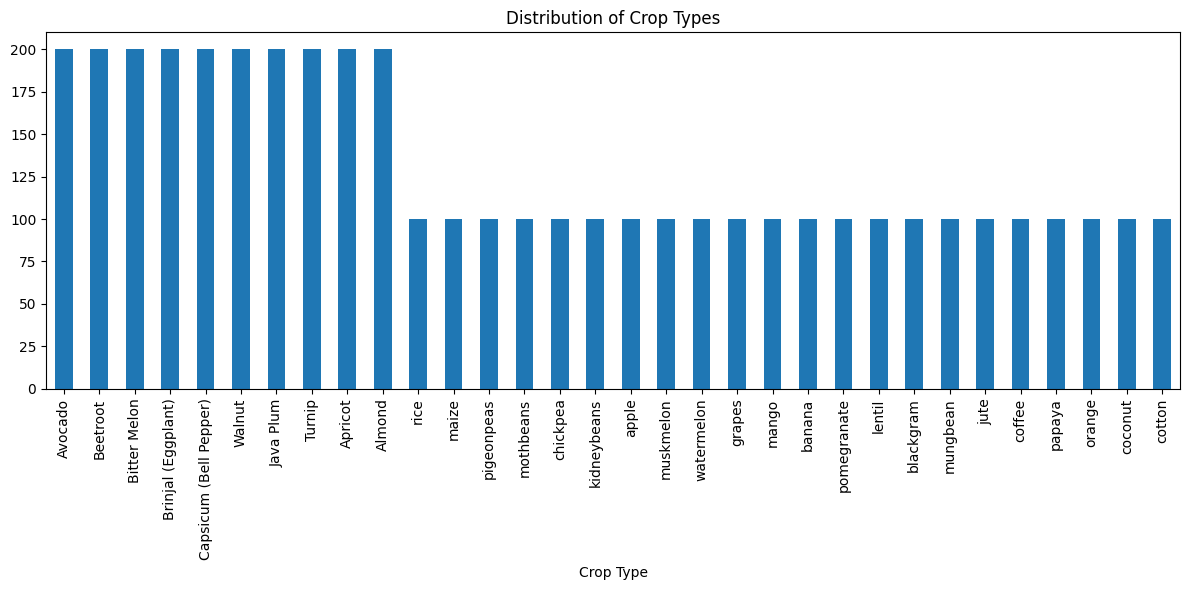

In [14]:
# 📊 Crop Distribution Bar Chart
plt.figure(figsize=(12, 6))
df['label'].value_counts().plot(kind='bar')  # Count of each crop type
plt.xlabel('Crop Type')
plt.title('Distribution of Crop Types')
plt.tight_layout()
plt.show()

In [15]:
#  Summary Statistics
df.describe()

N            P            K  temperature     humidity  \
count  4200.000000  4200.000000  4200.000000  4200.000000  4200.000000   
mean     71.596817    46.678466    75.645330    24.506841    63.937582   
std      38.186424    26.723092    54.607623     5.412346    19.339047   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      35.000000    28.000000    30.000000    21.260000    51.375000   
50%      82.000000    41.000000    62.000000    24.799265    62.730891   
75%     103.000000    58.000000   103.000000    28.015392    81.035509   
max     150.000000   145.000000   250.000000    43.675493    99.981876   

                ph     rainfall  label_encoded  
count  4200.000000  4200.000000    4200.000000  
mean      6.514523   436.898081      12.880952  
std       0.655803   403.469753       9.428040  
min       3.504752    20.211267       0.000000  
25%       6.100000    91.989216       5.000000  
50%       6.484561   213.628597      10.500000  
75%       6.930000   724.775000      21.000000  
max       9.935091  1797.720000      31.000000

Boxplots for Outlier Detection

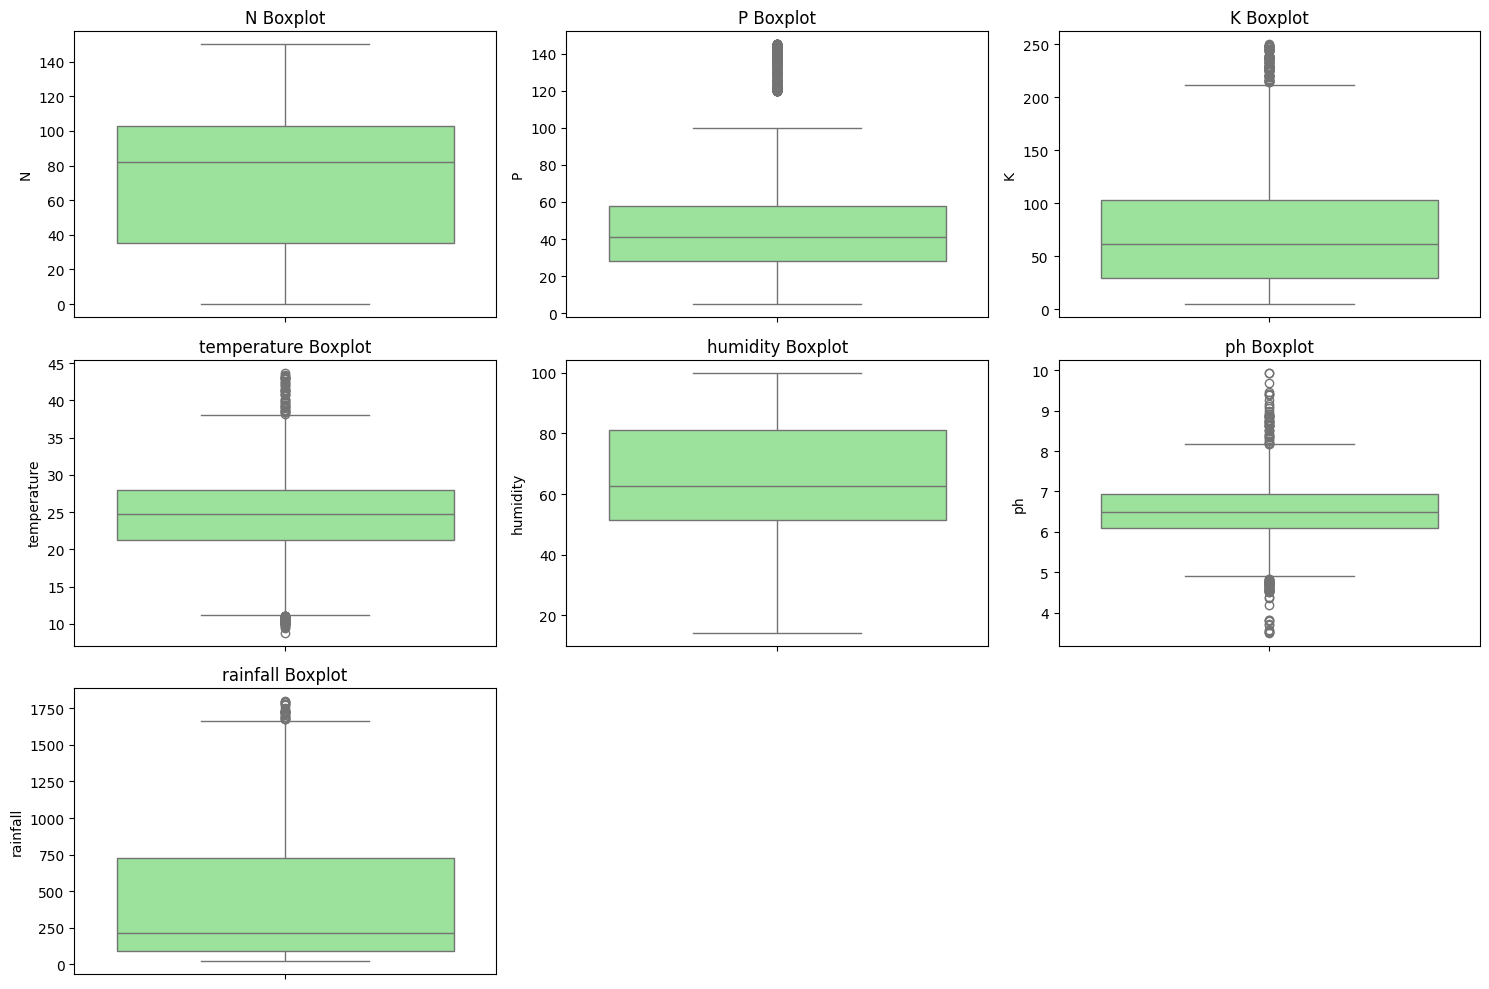

In [ ]:
# List of Numeric Features
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Boxplots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [17]:
# Summary Stats Per Crop
summary_stats = pd.DataFrame(df.groupby('label').agg(['min', 'max', 'mean']))

summary_stats

N                         P                     \
                          min    max        mean    min    max        mean   
label                                                                        
Almond                   31.0  120.0   73.555000   20.0   60.0   40.790000   
Apricot                  80.0  150.0  118.125000   22.0  100.0   56.005000   
Avocado                  80.0  120.0  100.115000   20.0   60.0   40.790000   
Beetroot                 80.0  120.0   99.195000   20.0   60.0   40.720000   
Bitter Melon             80.0  120.0   99.750000   20.0   40.0   30.450000   
Brinjal (Eggplant)       60.0  100.0   80.355000   40.0   60.0   49.980000   
Capsicum (Bell Pepper)   80.0  120.0  102.390000   20.0   40.0   29.495000   
Java Plum                80.0  149.0  113.680000   20.0   40.0   29.690000   
Turnip                   80.0  120.0  101.130000   20.0   40.0   29.530000   
Walnut                   40.0   80.0   59.205000   30.0   60.0   45.820000   
apple                     0.0   40.0   20.800000  120.0  145.0  134.220000   
banana                   80.0  120.0  100.230000   70.0   95.0   82.010000   
blackgram                20.0   60.0   40.020000   55.0   80.0   67.470000   
chickpea                 20.0   60.0   40.090000   55.0   80.0   67.790000   
coconut                   0.0   40.0   21.980000    5.0   30.0   16.930000   
coffee                   80.0  120.0  101.200000   15.0   40.0   28.740000   
cotton                  100.0  140.0  117.770000   35.0   60.0   46.240000   
grapes                    0.0   40.0   23.180000  120.0  145.0  132.530000   
jute                     60.0  100.0   78.400000   35.0   60.0   46.860000   
kidneybeans               0.0   40.0   20.750000   55.0   80.0   67.540000   
lentil                    0.0   40.0   18.770000   55.0   80.0   68.360000   
maize                    60.0  100.0   77.760000   35.0   60.0   48.440000   
mango                     0.0   40.0   20.070000   15.0   40.0   27.180000   
mothbeans                 0.0   40.0   21.440000   35.0   60.0   48.010000   
mungbean                  0.0   40.0   20.990000   35.0   60.0   47.280000   
muskmelon                80.0  120.0  100.320000    5.0   30.0   17.720000   
orange                    0.0   40.0   19.580000    5.0   30.0   16.550000   
papaya                   31.0   70.0   49.880000   46.0   70.0   59.050000   
pigeonpeas                0.0   40.0   20.730000   55.0   80.0   67.730000   
pomegranate               0.0   40.0   18.870000    5.0   30.0   18.750000   
rice                     60.0   99.0   79.816327   35.0   60.0   47.555556   
watermelon               80.0  120.0   99.420000    5.0   30.0   17.000000   

                            K                    temperature  ...   humidity  \
                          min    max        mean         min  ...       mean   
label                                                         ...              
Almond                   50.0  120.0   83.060000   15.000000  ...  55.719450   
Apricot                  80.0  250.0  161.280000   12.030000  ...  53.928400   
Avocado                  50.0  120.0   83.990000   20.110000  ...  65.087950   
Beetroot                 80.0  120.0  100.575000   15.030000  ...  56.135750   
Bitter Melon             80.0  120.0  100.425000   25.010000  ...  53.501150   
Brinjal (Eggplant)       80.0  120.0  101.760000   20.070000  ...  60.945750   
Capsicum (Bell Pepper)   80.0  120.0   98.675000   20.010000  ...  53.124800   
Java Plum                85.0  249.0  169.880000   20.020000  ...  54.940400   
Turnip                   80.0  120.0   99.940000   10.030000  ...  58.768550   
Walnut                   40.0   80.0   59.280000   10.010000  ...  44.237450   
apple                   195.0  205.0  199.890000   21.036527  ...  92.333383   
banana                   45.0   55.0   50.050000   25.010185  ...  80.358123   
blackgram                15.0   25.0   19.240000   25.097374  ...  65.118426   
chickpea         

In [18]:
#  Inspect One Crop
df[df['label'] == 'apple']

N      P      K  temperature   humidity        ph    rainfall  label  \
1500  24.0  128.0  196.0    22.750888  90.694892  5.521467  110.431786  apple   
1501   7.0  144.0  197.0    23.849401  94.348150  6.133221  114.051249  apple   
1502  14.0  128.0  205.0    22.608010  94.589006  6.226290  116.039659  apple   
1503   8.0  120.0  201.0    21.186674  91.134357  6.321152  122.233323  apple   
1504  20.0  129.0  201.0    23.410447  91.699133  5.587906  116.077793  apple   
...    ...    ...    ...          ...        ...       ...         ...    ...   
1595  40.0  120.0  197.0    23.805938  92.488795  5.889481  119.633555  apple   
1596  25.0  132.0  198.0    22.319441  90.851744  5.732758  100.117344  apple   
1597  31.0  137.0  196.0    22.144641  93.825674  6.400321  120.631078  apple   
1598  36.0  144.0  196.0    23.651676  94.505288  6.496934  115.361127  apple   
1599  10.0  140.0  197.0    22.169395  90.271856  6.229499  124.468311  apple   

      label_encoded  
1500             10  
1501             10  
1502             10  
1503             10  
1504             10  
...             ...  
1595             10  
1596             10  
1597             10  
1598             10  
1599             10  

[100 rows x 9 columns]

Outlier Detection

In [19]:
# Outlier Detection Function

def detect_outliers_by_label(df, label_col='label'):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    outlier_info = {}

    for label, group in df.groupby(label_col):
        outlier_info[label] = {}
        for col in numeric_columns:
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.25 * IQR
            upper = Q3 + 1.25 * IQR
            outliers = group[(group[col] < lower) | (group[col] > upper)]
            outlier_info[label][col] = {
                'IQR': IQR,
                'Lower Bound': lower,
                'Upper Bound': upper,
                'Outlier Count': len(outliers),
                'Outlier Indexes': outliers.index.tolist()
            }

    return outlier_info


In [20]:
# Detect Outliers

outlier_summary = detect_outliers_by_label(df)

outlier_summary

{'Almond': {'N': {'IQR': np.float64(40.25),
   'Lower Bound': np.float64(4.4375),
   'Upper Bound': np.float64(145.3125),
   'Outlier Count': 0,
   'Outlier Indexes': []},
  'P': {'IQR': np.float64(19.0),
   'Lower Bound': np.float64(7.25),
   'Upper Bound': np.float64(73.75),
   'Outlier Count': 0,
   'Outlier Indexes': []},
  'K': {'IQR': np.float64(37.25),
   'Lower Bound': np.float64(17.4375),
   'Upper Bound': np.float64(147.8125),
   'Outlier Count': 0,
   'Outlier Indexes': []},
  'temperature': {'IQR': np.float64(7.502500000000001),
   'Lower Bound': np.float64(9.121875),
   'Upper Bound': np.float64(35.380625),
   'Outlier Count': 0,
   'Outlier Indexes': []},
  'humidity': {'IQR': np.float64(13.747500000000002),
   'Lower Bound': np.float64(31.758124999999993),
   'Upper Bound': np.float64(79.874375),
   'Outlier Count': 0,
   'Outlier Indexes': []},
  'ph': {'IQR': np.float64(0.71),
   'Lower Bound': np.float64(5.4624999999999995),
   'Upper Bound': np.float64(7.9475),
   'O

In [21]:
# Display Outlier Counts per Crop and Feature

for label, features in outlier_summary.items():
    print(f"\nLabel: {label}")
    for feature, stats in features.items():
        print(f"  {feature} = Outliers: {stats['Outlier Count']}")


Label: Almond
  N = Outliers: 0
  P = Outliers: 0
  K = Outliers: 0
  temperature = Outliers: 0
  humidity = Outliers: 0
  ph = Outliers: 0
  rainfall = Outliers: 0
  label_encoded = Outliers: 0

Label: Apricot
  N = Outliers: 0
  P = Outliers: 0
  K = Outliers: 0
  temperature = Outliers: 0
  humidity = Outliers: 0
  ph = Outliers: 0
  rainfall = Outliers: 0
  label_encoded = Outliers: 0

Label: Avocado
  N = Outliers: 0
  P = Outliers: 0
  K = Outliers: 0
  temperature = Outliers: 0
  humidity = Outliers: 0
  ph = Outliers: 0
  rainfall = Outliers: 0
  label_encoded = Outliers: 0

Label: Beetroot
  N = Outliers: 0
  P = Outliers: 0
  K = Outliers: 0
  temperature = Outliers: 0
  humidity = Outliers: 0
  ph = Outliers: 0
  rainfall = Outliers: 0
  label_encoded = Outliers: 0

Label: Bitter Melon
  N = Outliers: 0
  P = Outliers: 0
  K = Outliers: 0
  temperature = Outliers: 0
  humidity = Outliers: 0
  ph = Outliers: 0
  rainfall = Outliers: 0
  label_encoded = Outliers: 0

Label: Br

No specific outliers were detected as some require less nutrients than other and other require higher nutrients


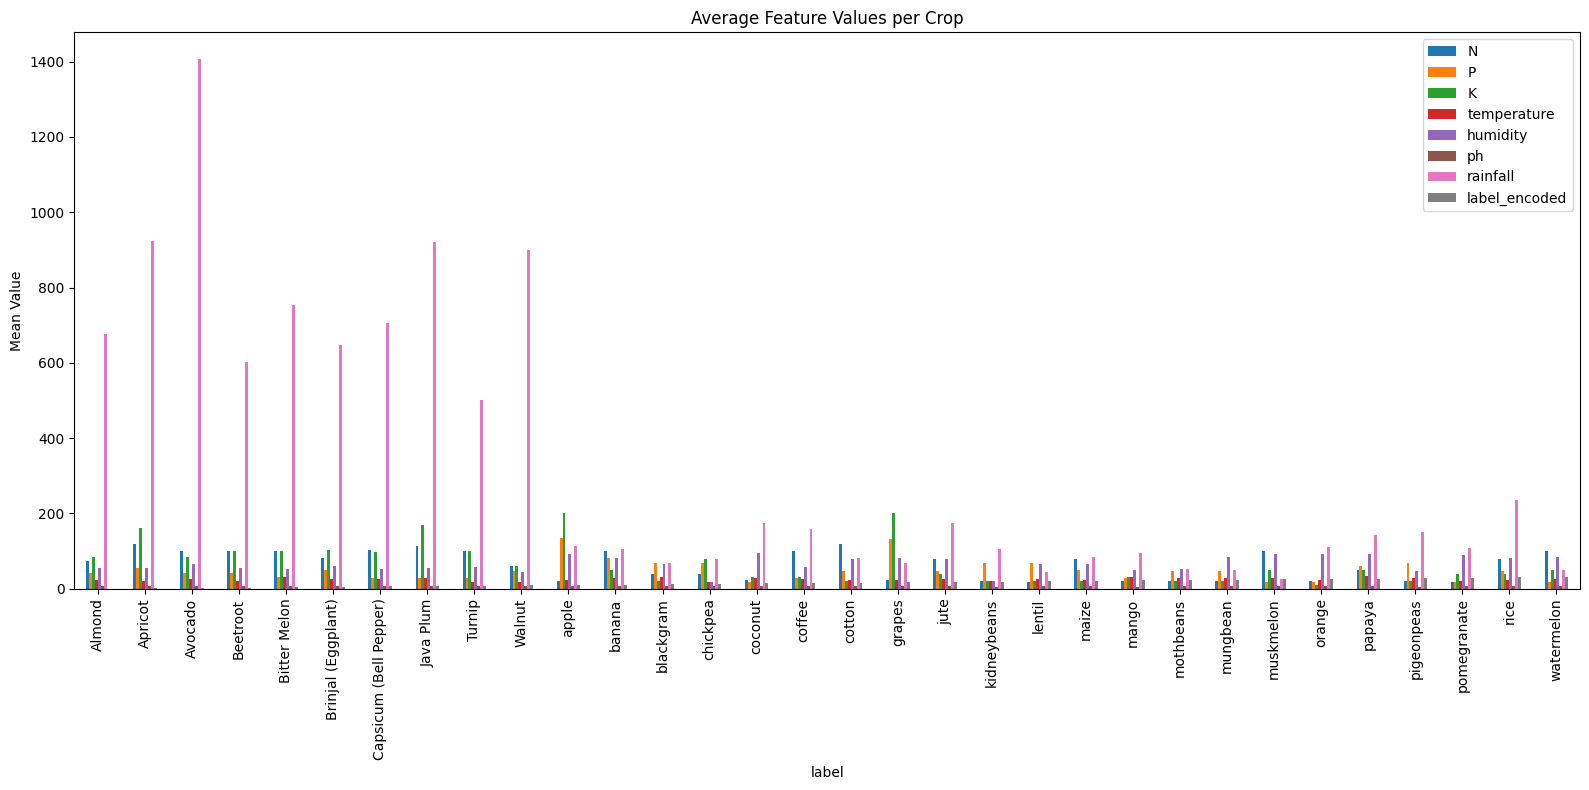

In [22]:
# Mean Feature Value per Crop

group_means = df.groupby('label').mean()
group_means.plot(kind='bar', figsize=(16, 8))
plt.title("Average Feature Values per Crop")
plt.xticks(rotation=90)
plt.ylabel("Mean Value")
plt.tight_layout()
plt.show()


Distribution of data(histplot)

In [74]:
def plot_feature_distribution(df, feature, bins=50, color='skyblue'):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=bins, kde=True, color=color)
    plt.title(f'Distribution of {feature} in Soil')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

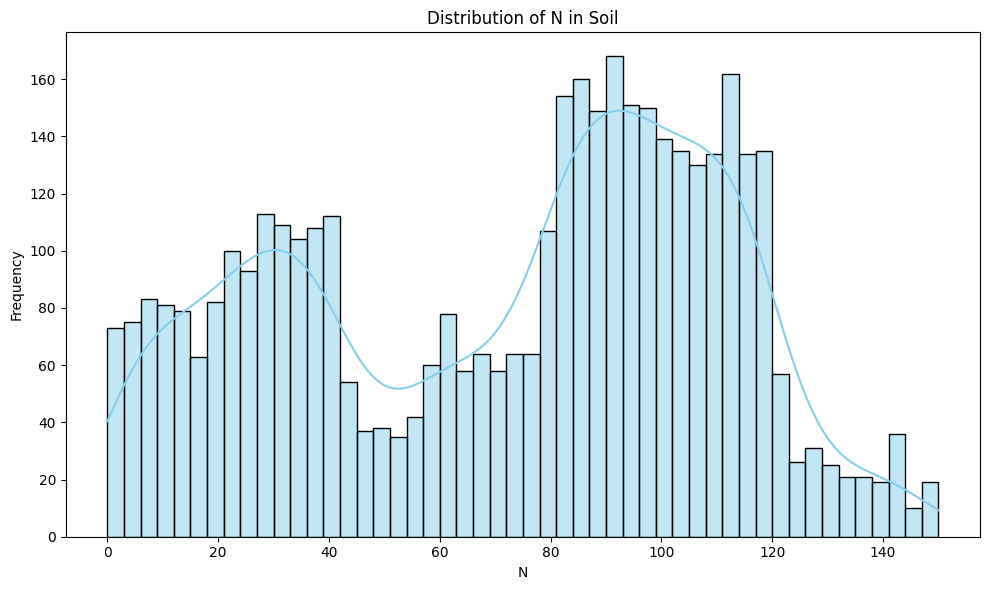

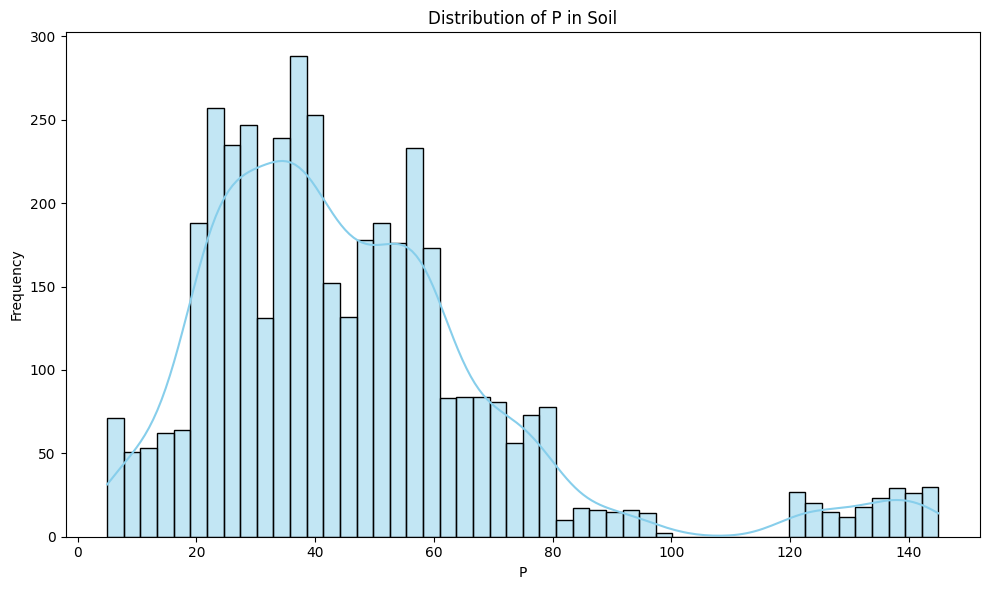

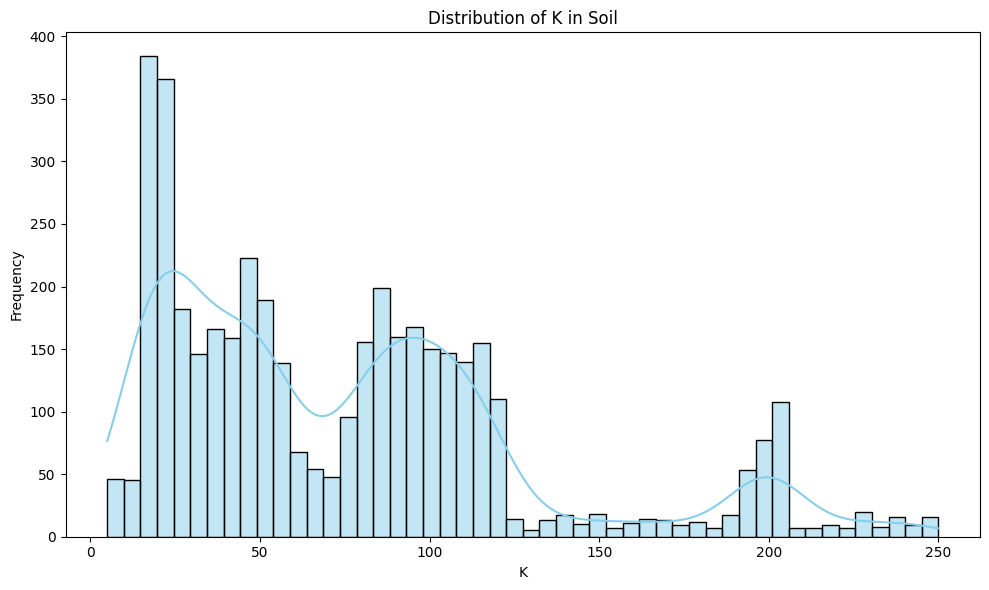

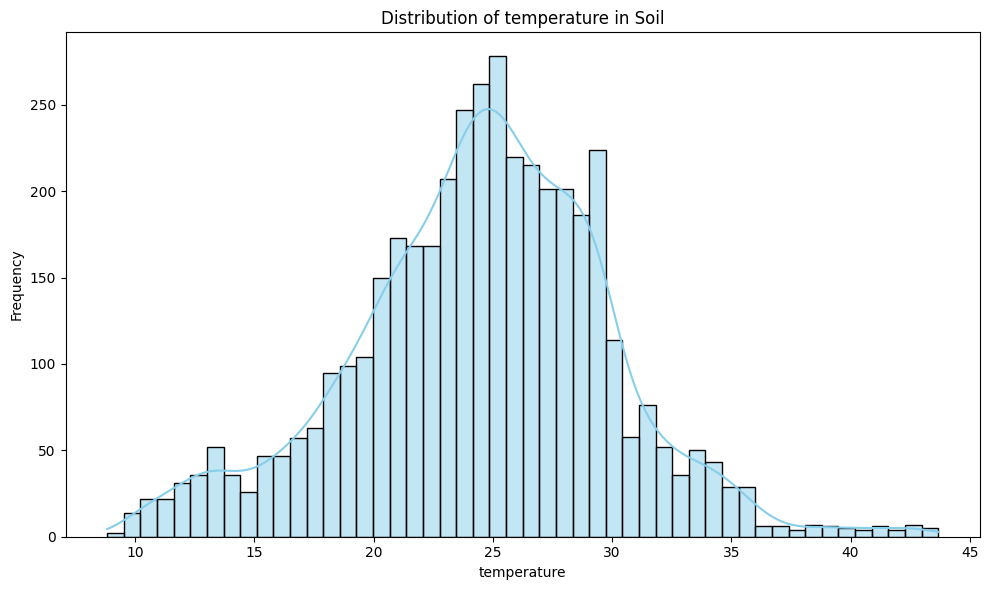

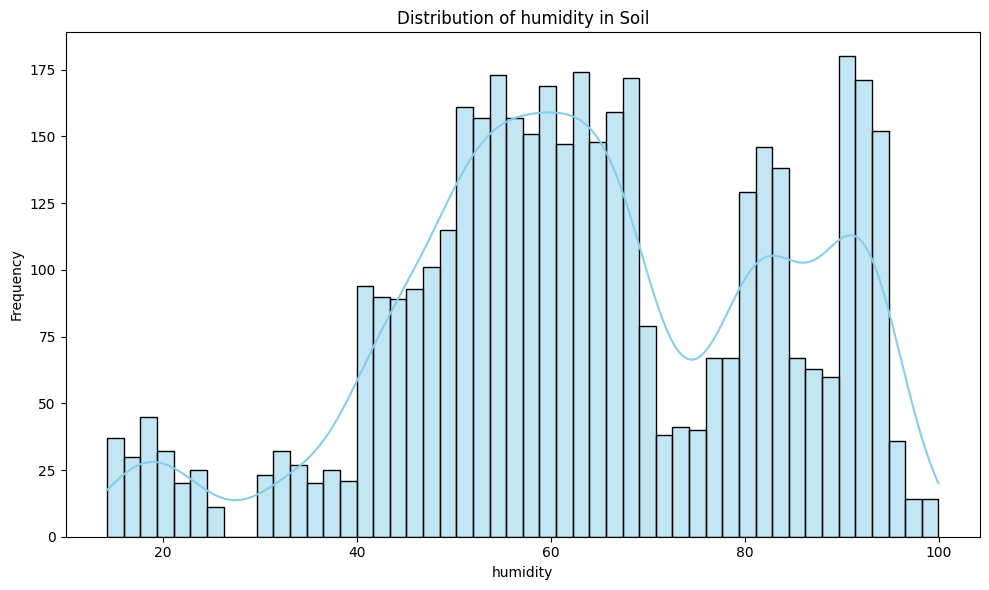

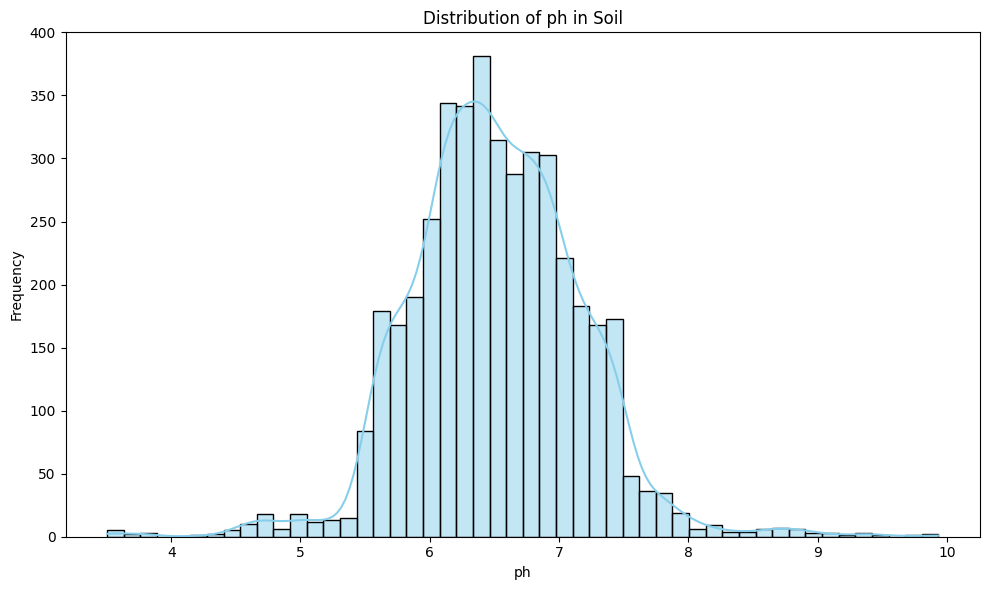

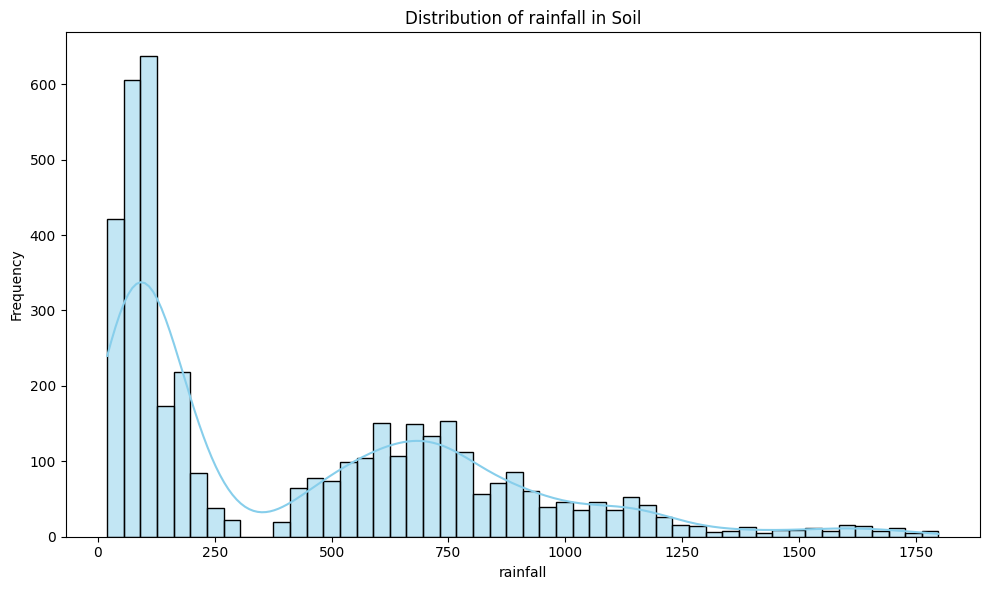

In [75]:
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plot_feature_distribution(df, i)

Description of each label columns. 



 Plot histogram for each numeric column base on label

In [70]:
def display_distribution(df, crop_label):
    crop_df = df[df['label'] == crop_label]
    print(f"Distribution for '{crop_label}':")
    print(crop_df.describe())

    numeric_cols = crop_df.select_dtypes(include=['int64', 'float64']).columns
    print(f"Numeric columns for '{crop_label}': {numeric_cols.tolist()}")

    n_cols = 4
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(crop_df[col], bins=20, kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f"Histogram of '{col}'")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

Distribution for 'rice':
                N           P           K  temperature    humidity  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean    79.816327   47.555556   39.870000    23.689332   82.272822   
std     11.829894    7.901185    2.946167     2.031272    1.418381   
min     60.000000   35.000000   35.000000    20.045414   80.122675   
25%     69.000000   41.000000   38.000000    21.927064   80.952094   
50%     79.816327   47.000000   40.000000    23.734837   82.189357   
75%     90.250000   54.250000   42.000000    25.513702   83.470254   
max     99.000000   60.000000   45.000000    26.929951   84.969072   

               ph    rainfall  label_encoded  
count  100.000000  100.000000          100.0  
mean     6.425471  236.181114           30.0  
std      0.768692   34.291825            0.0  
min      5.005307  182.561632           30.0  
25%      5.869992  204.334023           30.0  
50%      6.363804  233.119859           30.0  
75%      7.0391

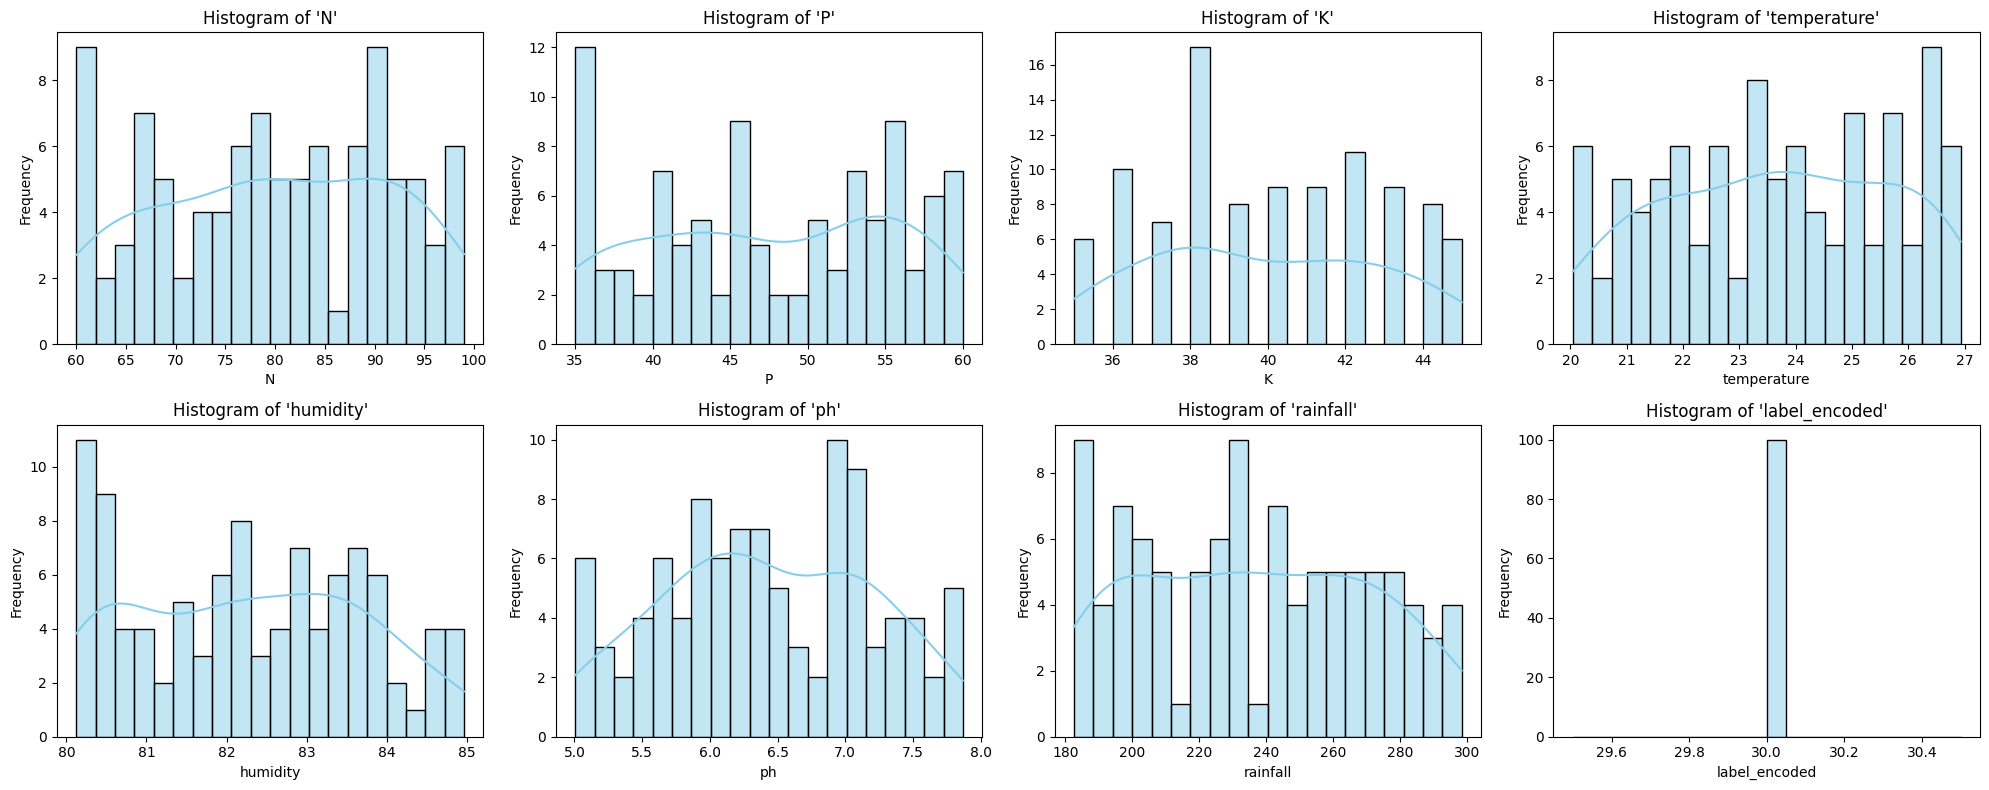

Distribution for 'maize':
               N           P         K  temperature    humidity          ph  \
count  100.00000  100.000000  100.0000   100.000000  100.000000  100.000000   
mean    77.76000   48.440000   19.7900    22.366742   65.092249    6.245190   
std     11.94949    8.010498    2.9415     2.669928    5.448699    0.412681   
min     60.00000   35.000000   15.0000    18.041855   55.282204    5.513698   
25%     67.75000   42.750000   17.0000    19.822579   60.579884    5.854734   
50%     76.00000   48.500000   20.0000    22.716057   65.303845    6.259181   
75%     87.00000   56.000000   22.0000    24.900640   69.431596    6.602366   
max    100.00000   60.000000   25.0000    26.549864   74.829137    6.995844   

         rainfall  label_encoded  
count  100.000000          100.0  
mean    84.766988           21.0  
std     15.547339            0.0  
min     60.651715           21.0  
25%     70.384556           21.0  
50%     83.471553           21.0  
75%     99.877090

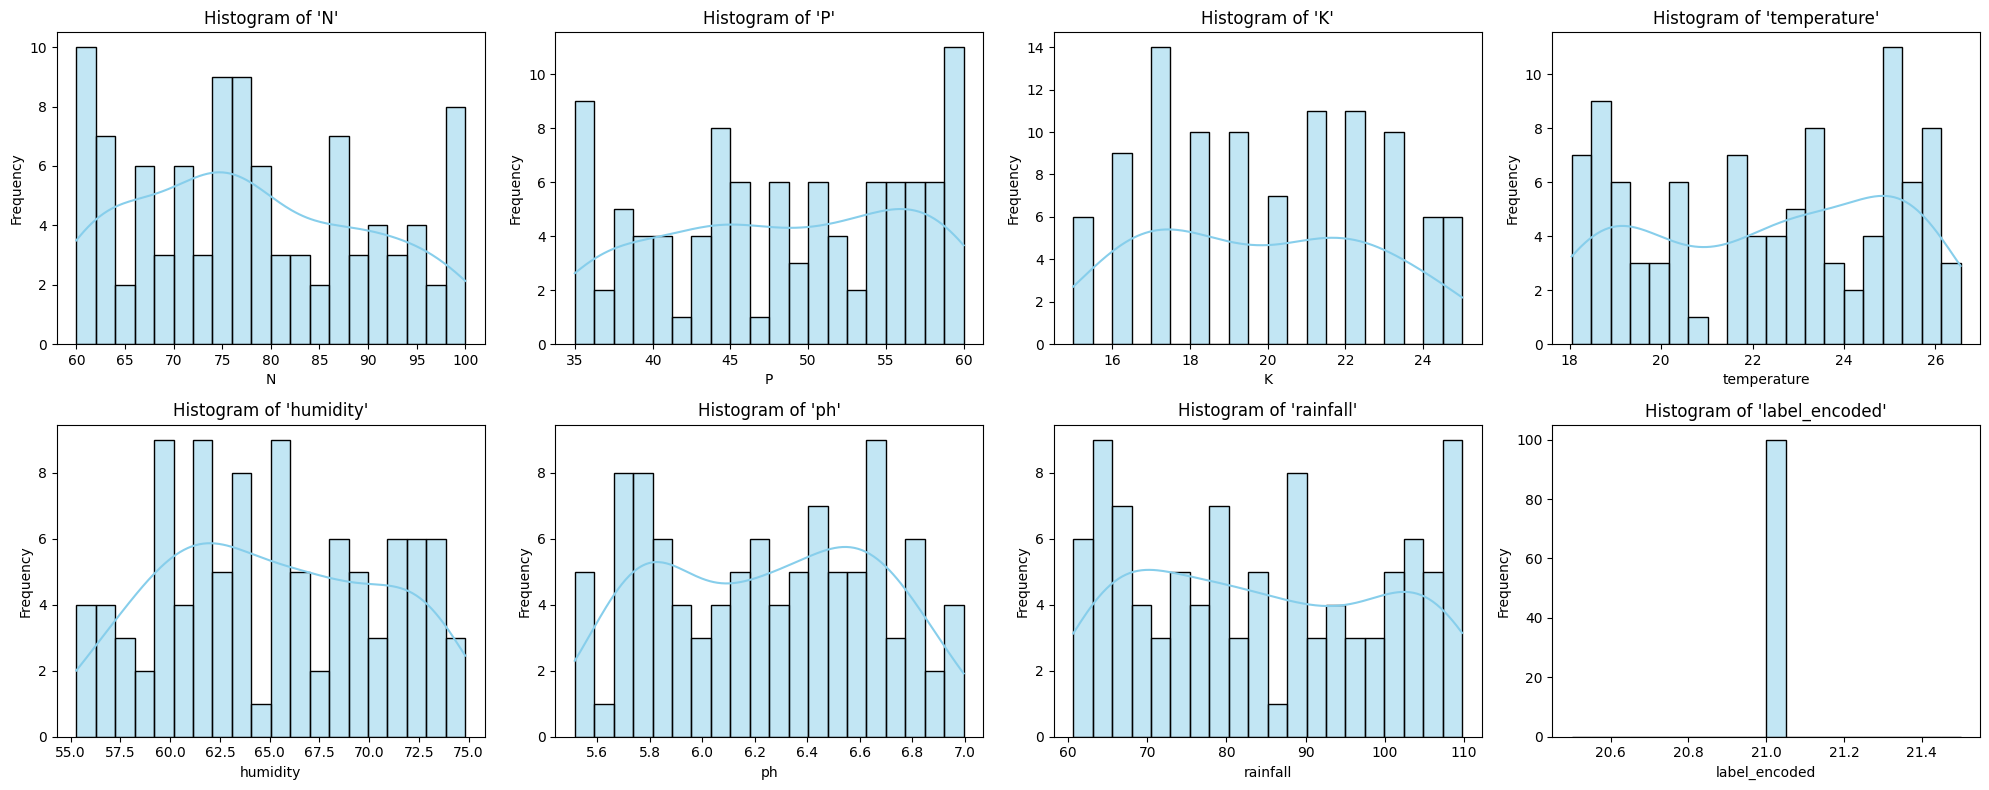

Distribution for 'chickpea':
                N           P           K  temperature    humidity  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean    40.090000   67.790000   79.920000    18.872847   16.860439   
std     12.150649    7.498545    3.261901     1.169838    1.711979   
min     20.000000   55.000000   75.000000    17.024985   14.258040   
25%     30.000000   61.000000   77.000000    17.877953   15.392700   
50%     39.000000   68.000000   79.000000    18.878291   16.658634   
75%     52.000000   74.000000   83.000000    19.711637   18.265986   
max     60.000000   80.000000   85.000000    20.995022   19.969789   

               ph    rainfall  label_encoded  
count  100.000000  100.000000          100.0  
mean     7.336957   80.058977           13.0  
std      0.801127    7.944350            0.0  
min      5.988993   65.113656           13.0  
25%      6.603967   73.610409           13.0  
50%      7.356537   79.692282           13.0  
75%      7.

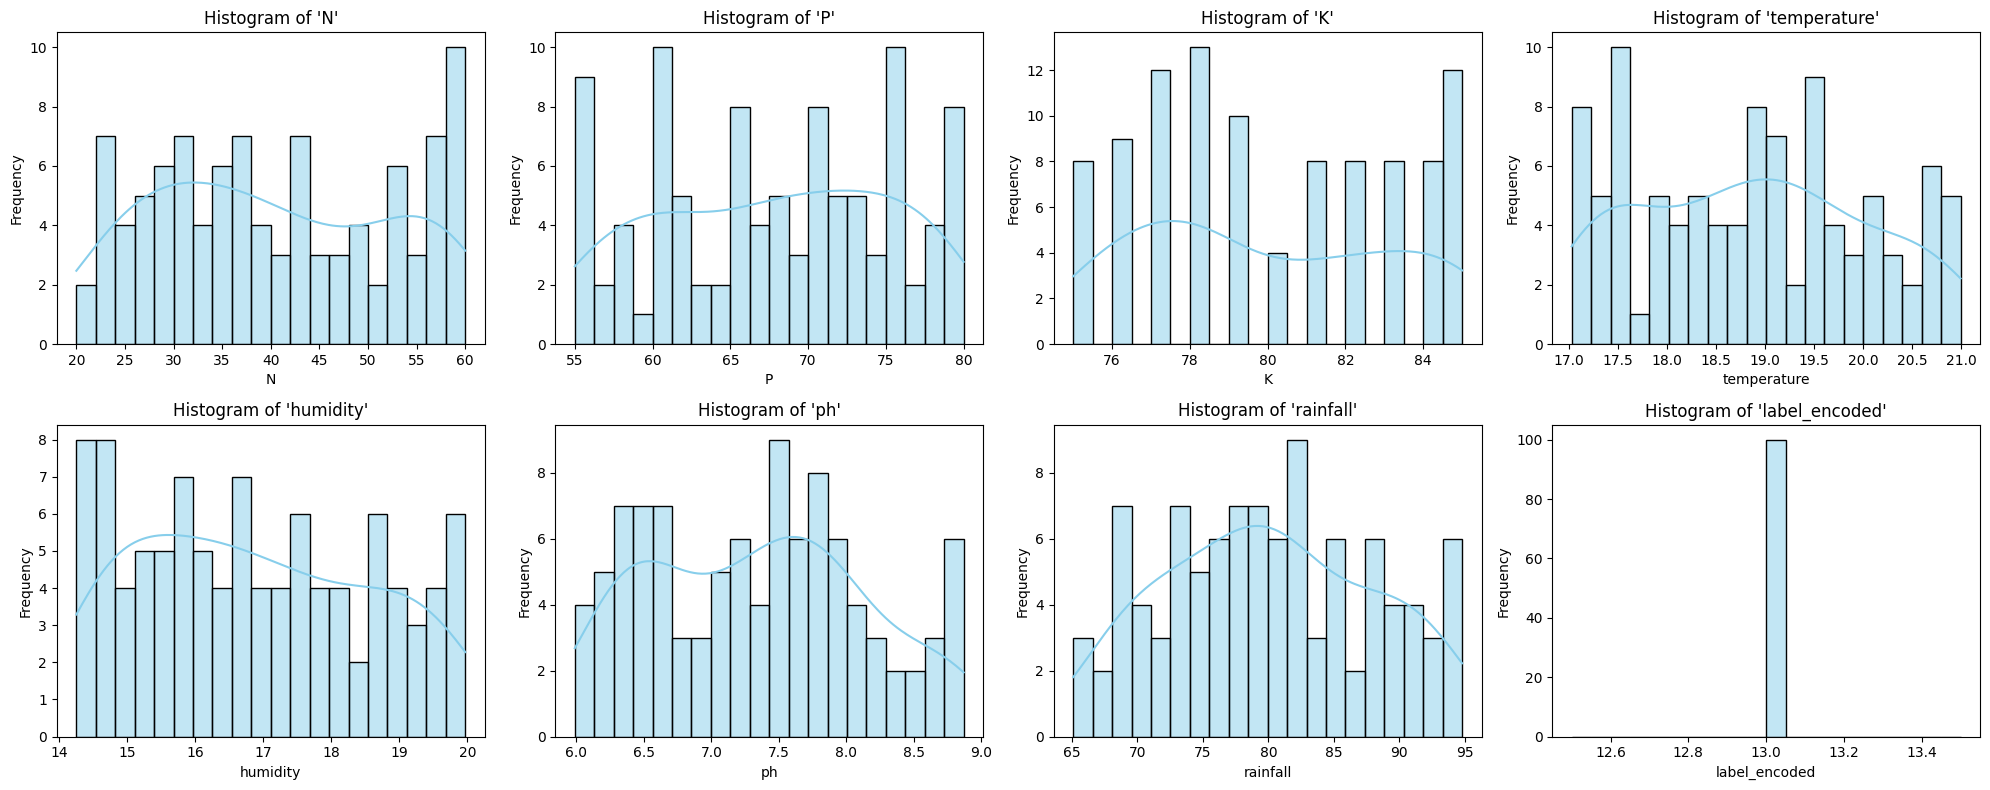

Distribution for 'kidneybeans':
                N           P           K  temperature    humidity  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean    20.750000   67.540000   20.050000    20.115085   21.605357   
std     10.834266    7.571104    3.102215     2.599573    2.167323   
min      0.000000   55.000000   15.000000    15.330426   18.092240   
25%     11.750000   61.000000   17.000000    18.294621   19.735894   
50%     22.000000   67.000000   20.000000    19.924037   21.348735   
75%     28.000000   74.000000   22.250000    22.003187   23.357184   
max     40.000000   80.000000   25.000000    24.923601   24.969699   

               ph    rainfall  label_encoded  
count  100.000000  100.000000          100.0  
mean     5.749411  105.919778           19.0  
std      0.145220   26.111384            0.0  
min      5.502999   60.275525           19.0  
25%      5.624995   85.824741           19.0  
50%      5.745283  107.399392           19.0  
75%     

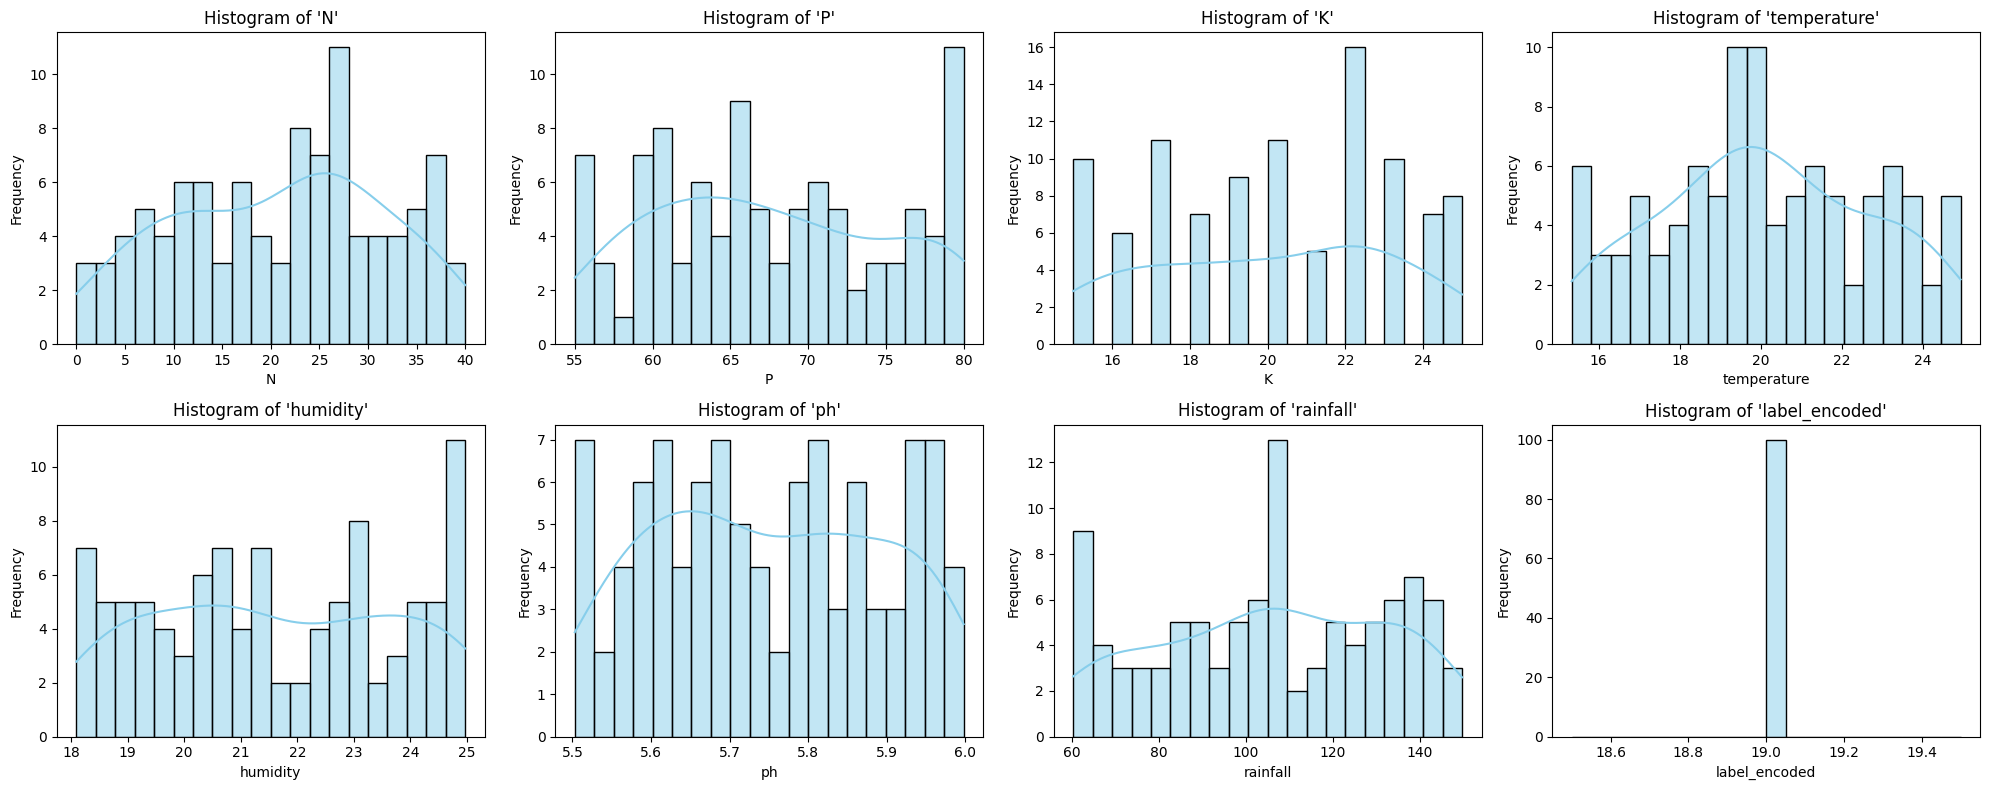

Distribution for 'pigeonpeas':
               N           P           K  temperature    humidity          ph  \
count  100.00000  100.000000  100.000000   100.000000  100.000000  100.000000   
mean    20.73000   67.730000   20.290000    27.741762   48.061633    5.794175   
std     11.84995    7.294463    2.815165     5.715682   10.963659    0.830274   
min      0.00000   55.000000   15.000000    18.319104   30.400468    4.548202   
25%     10.00000   61.000000   18.000000    22.866441   38.365278    5.003316   
50%     20.00000   69.500000   20.000000    28.931707   47.195180    5.690466   
75%     30.25000   73.250000   23.000000    31.472520   57.004398    6.418984   
max     40.00000   80.000000   25.000000    36.977944   69.691413    7.445445   

         rainfall  label_encoded  
count  100.000000          100.0  
mean   149.457564           28.0  
std     32.986321            0.0  
min     90.054227           28.0  
25%    122.345984           28.0  
50%    154.310507           2

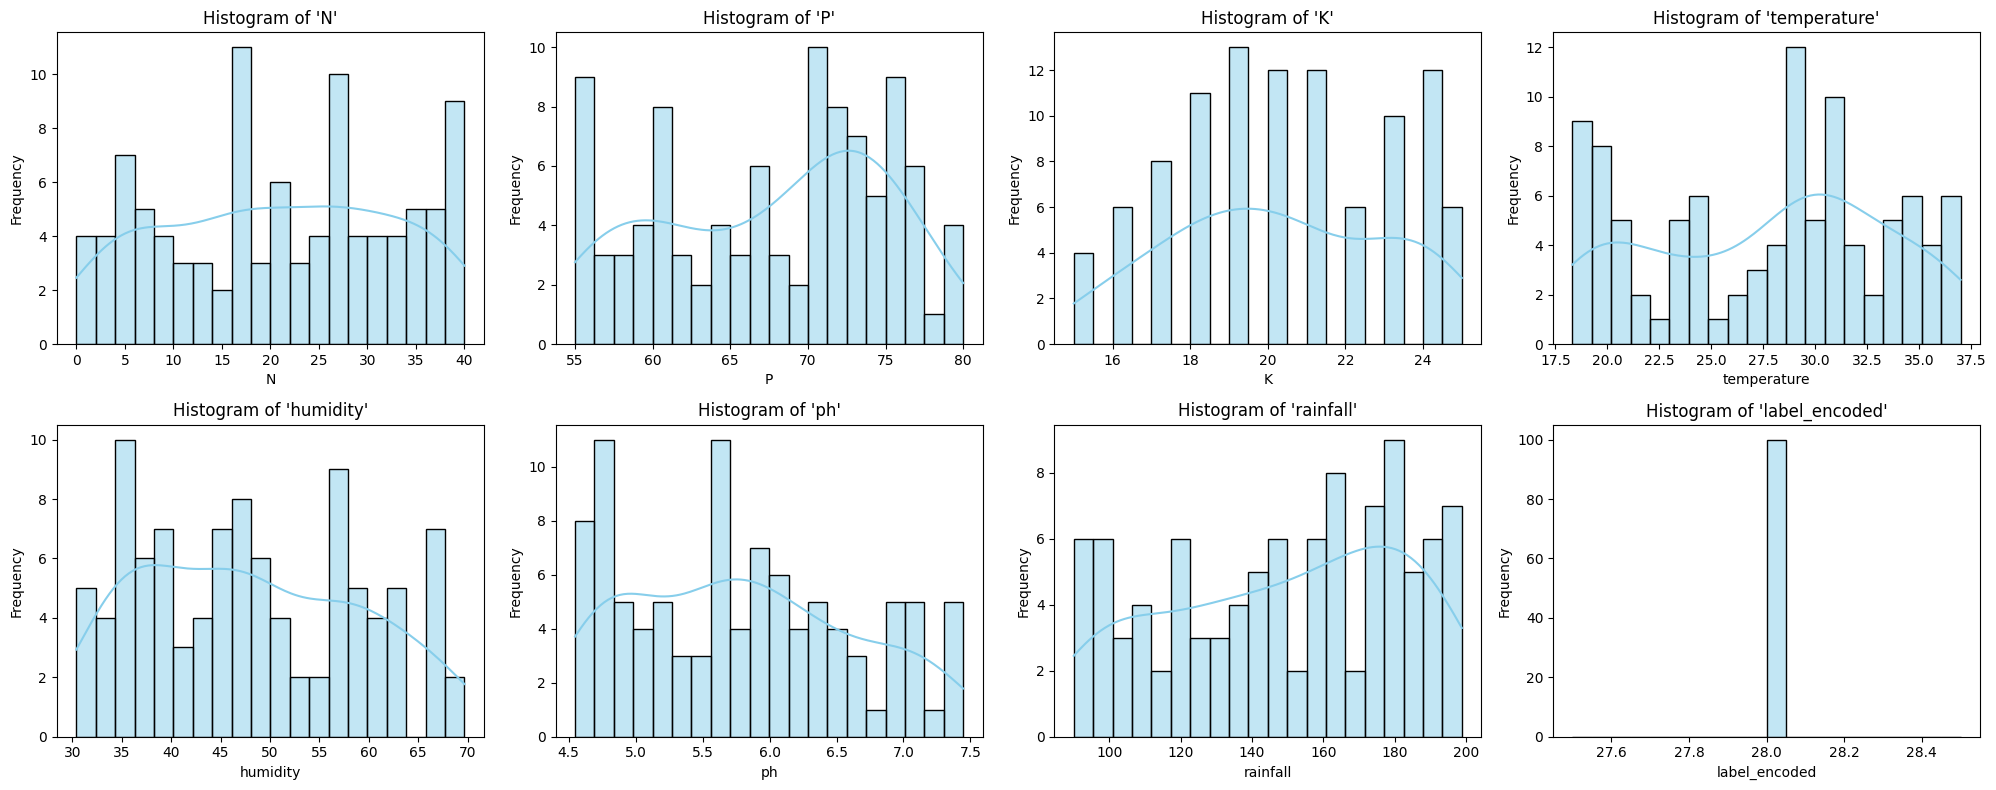

In [89]:
for i in df['label'].unique()[:5]:  # Display for first 5 unique crops
    display_distribution(df, i)

Rainfall vs Temperature colored by crop

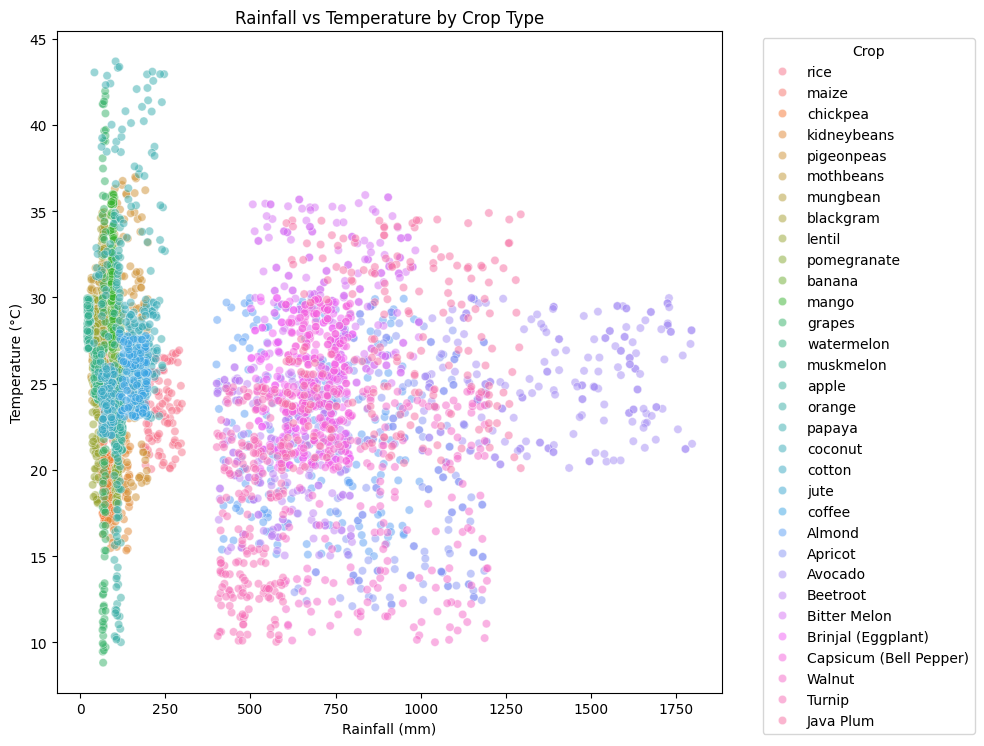

In [95]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df, x='rainfall', y='temperature', hue='label', alpha=0.5)
plt.title('Rainfall vs Temperature by Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Temperature (°C)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ScatterPlot of Rainfall vs Humidity

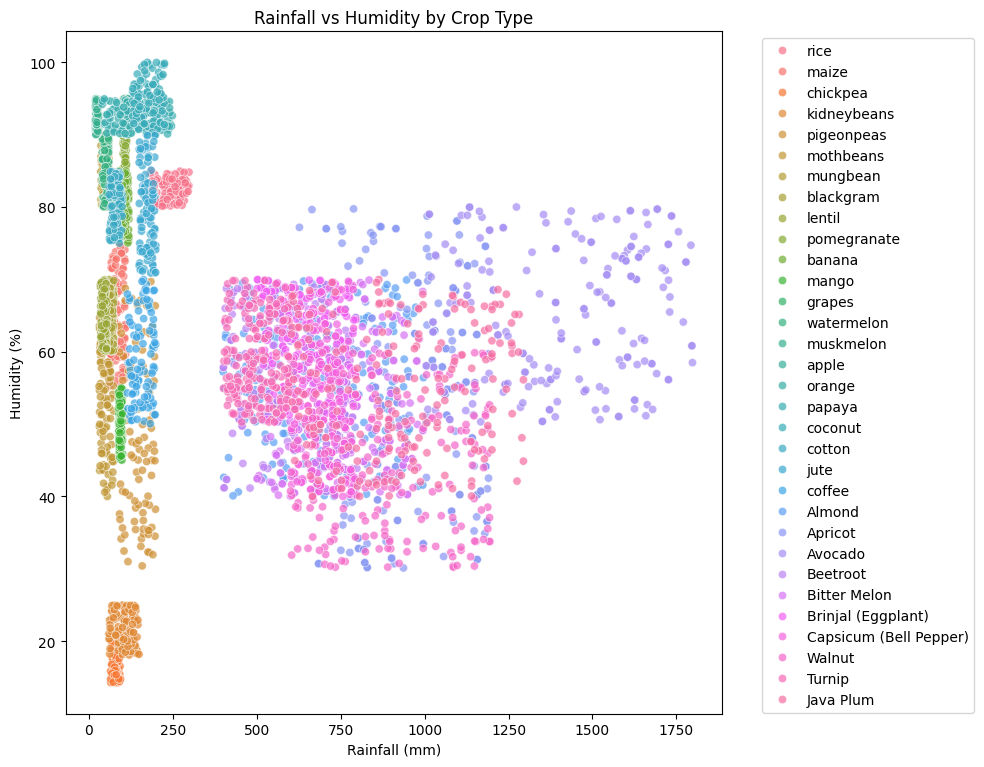

In [96]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='rainfall', y='humidity', hue='label', alpha=0.7)
plt.title('Rainfall vs Humidity by Crop Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Humidity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Pairplot of Selected Features

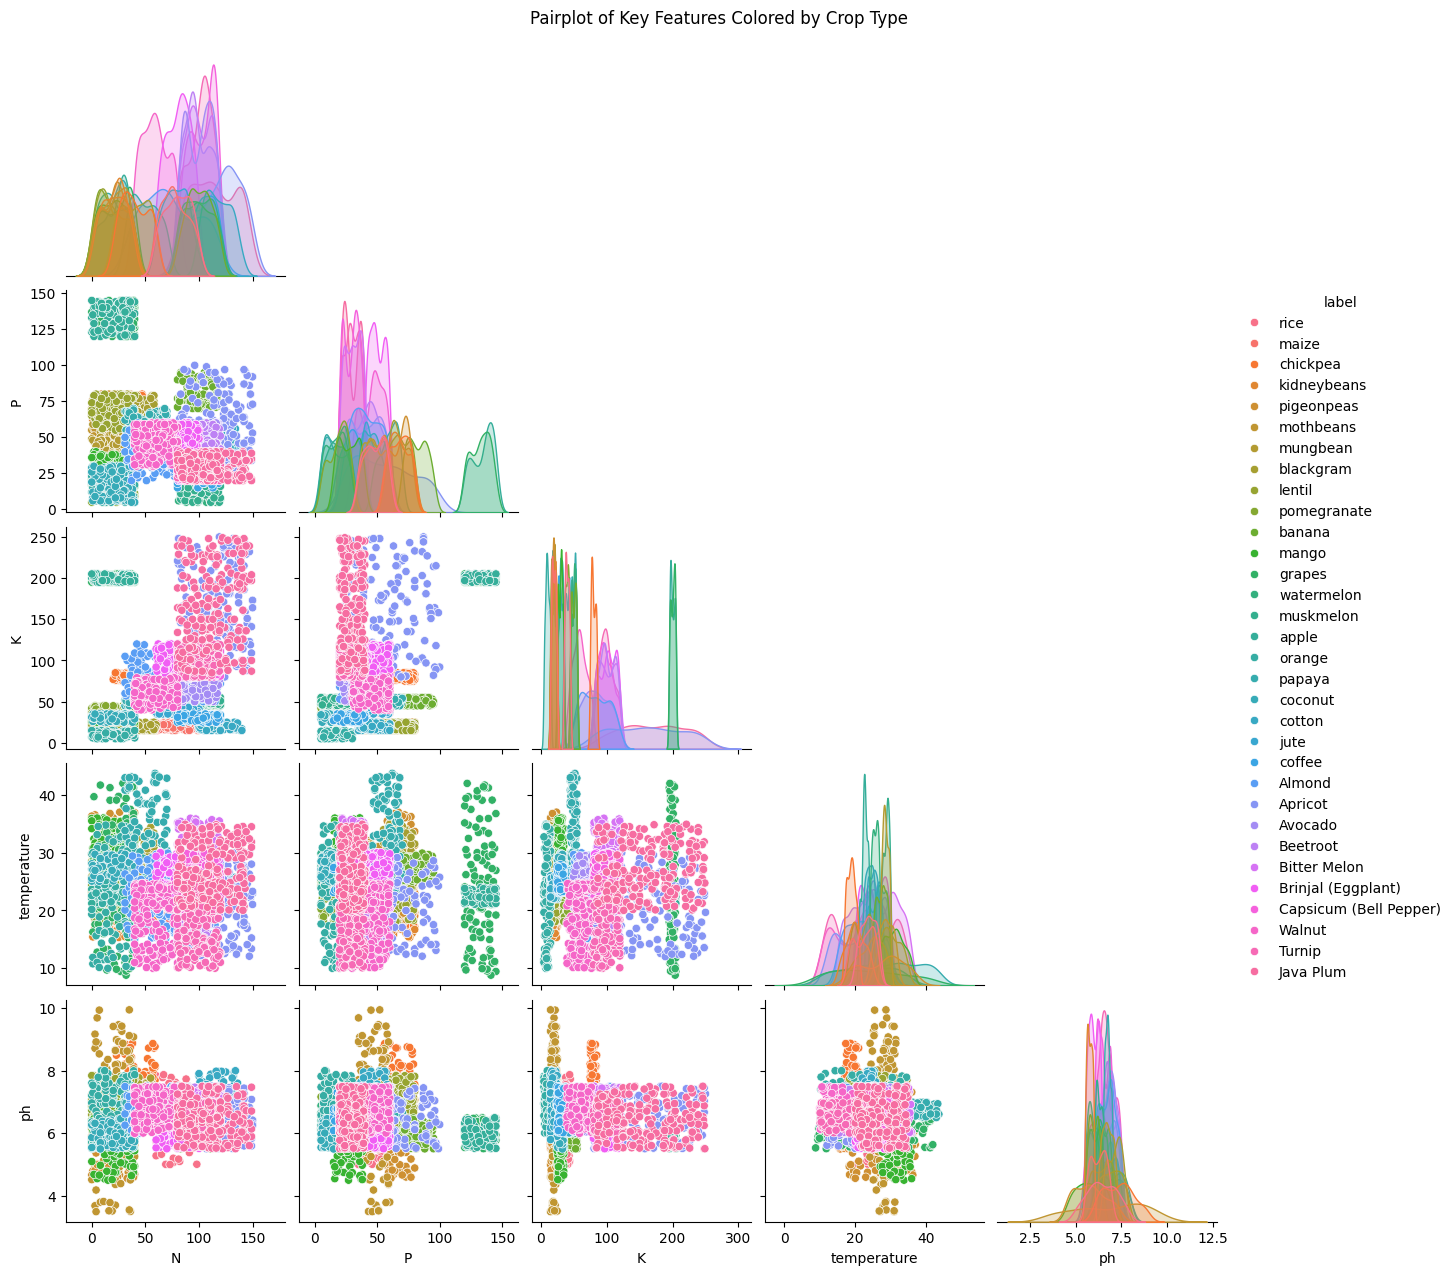

In [23]:
# Pairplot of Selected Features

sns.pairplot(df, vars=['N', 'P', 'K', 'temperature', 'ph'], hue='label', corner=True)
plt.suptitle('Pairplot of Key Features Colored by Crop Type', y=1.02)
plt.show()


Boxplots by Crop Type

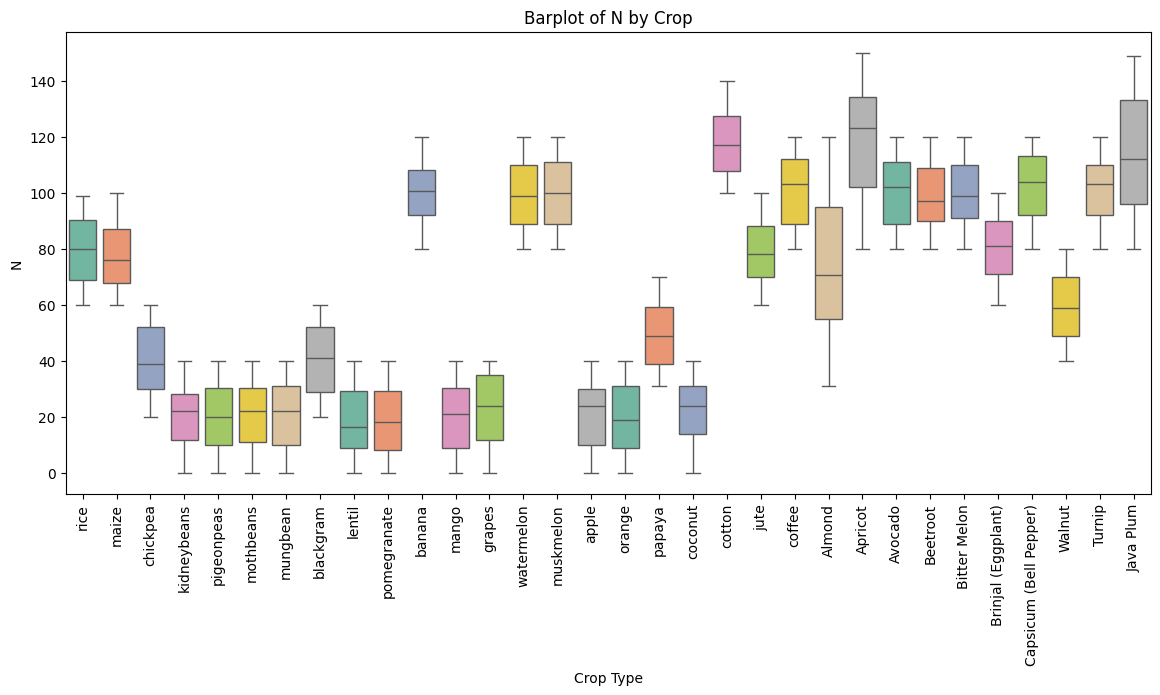

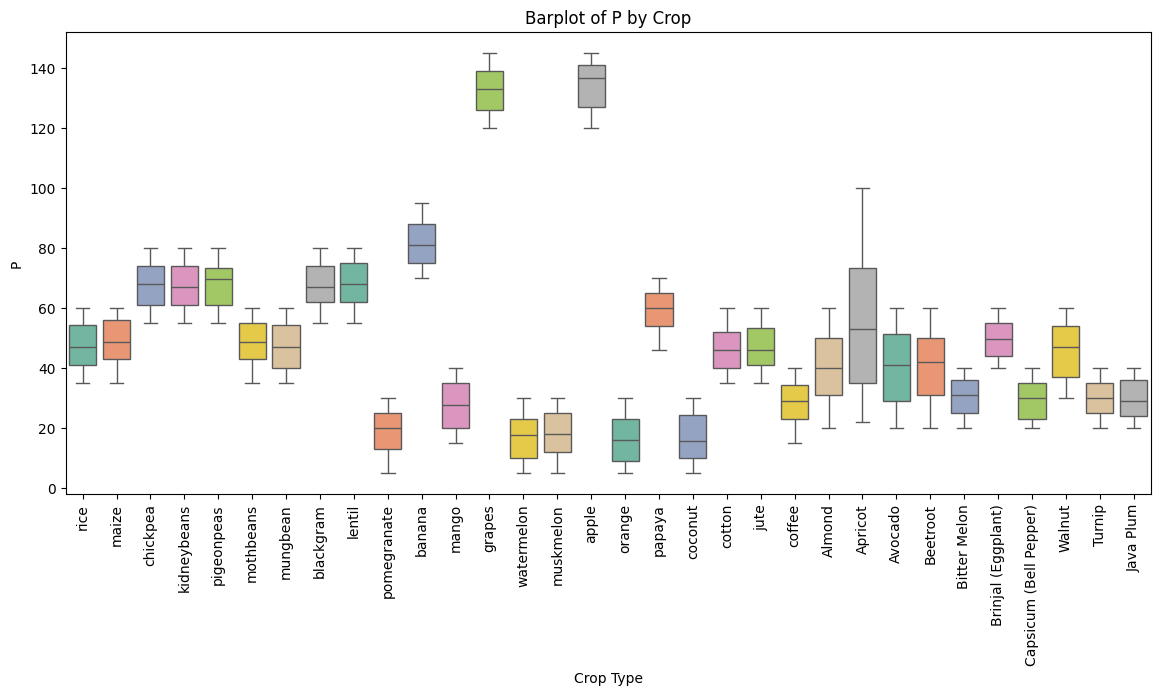

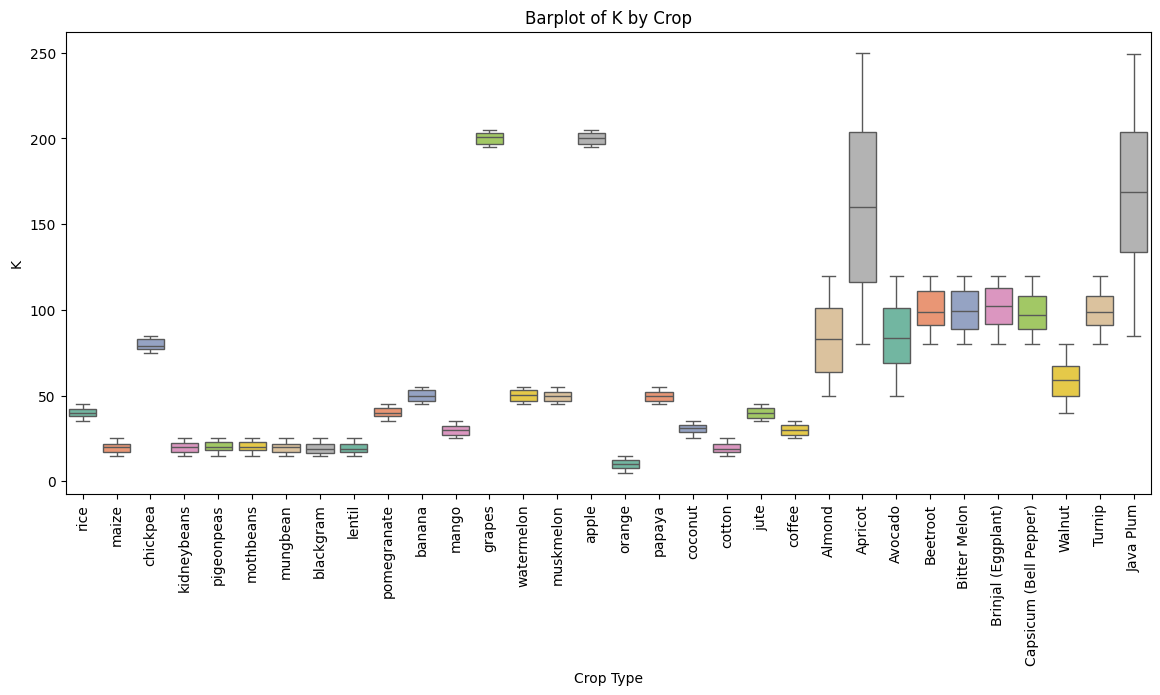

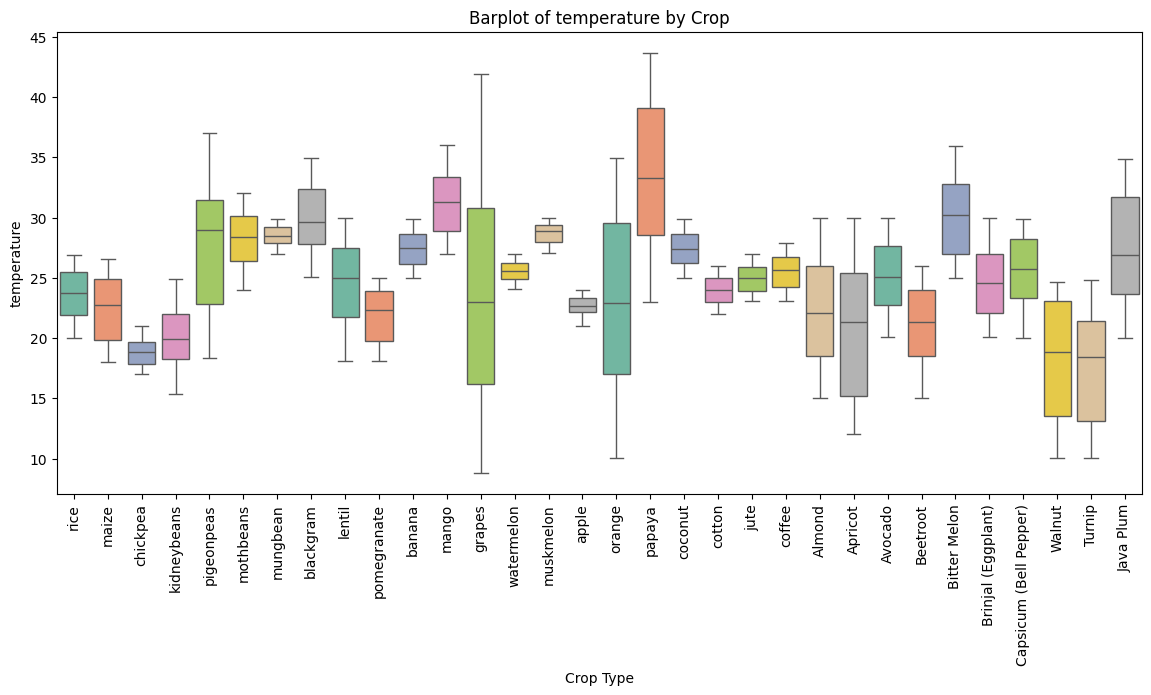

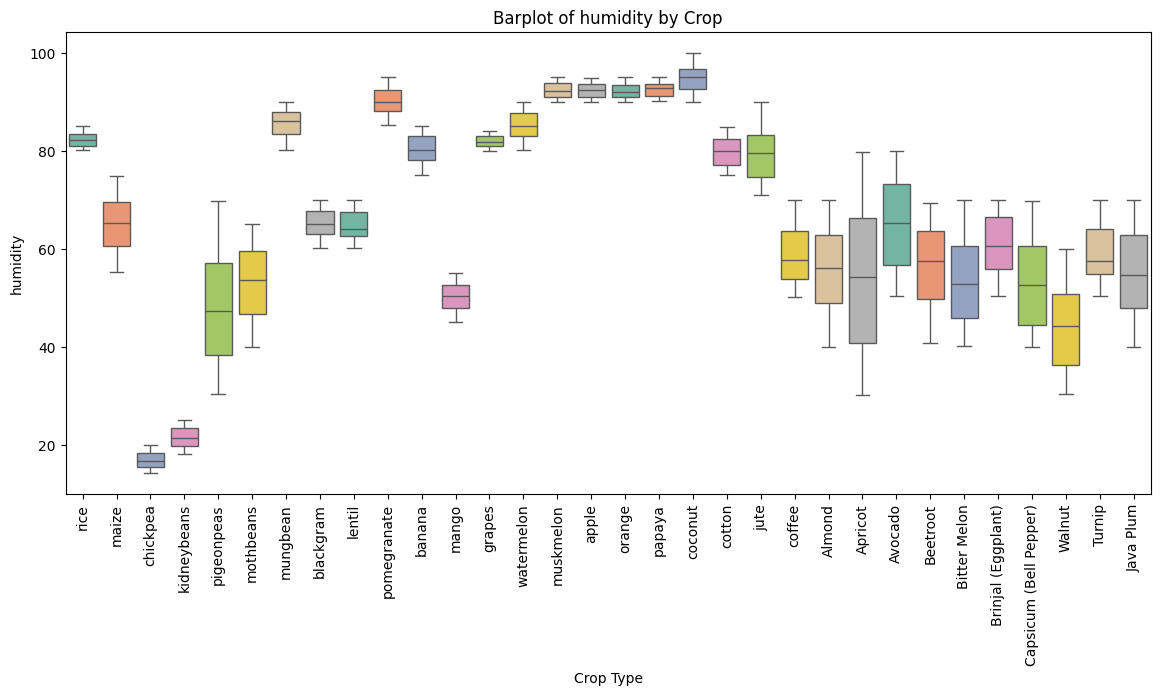

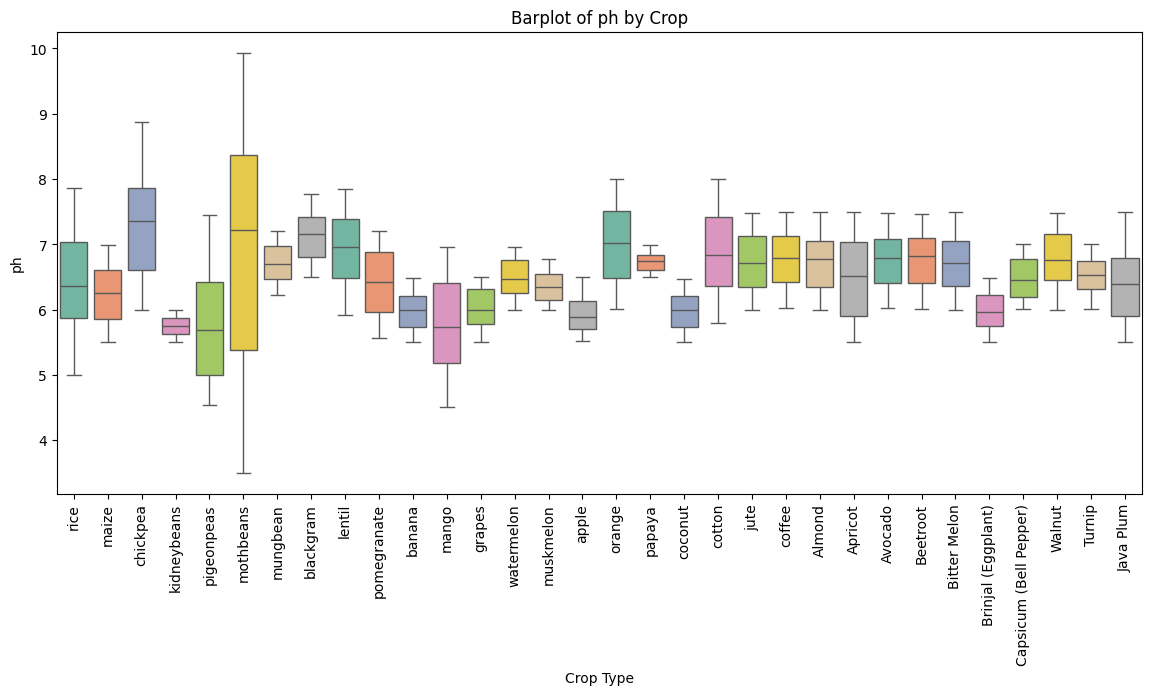

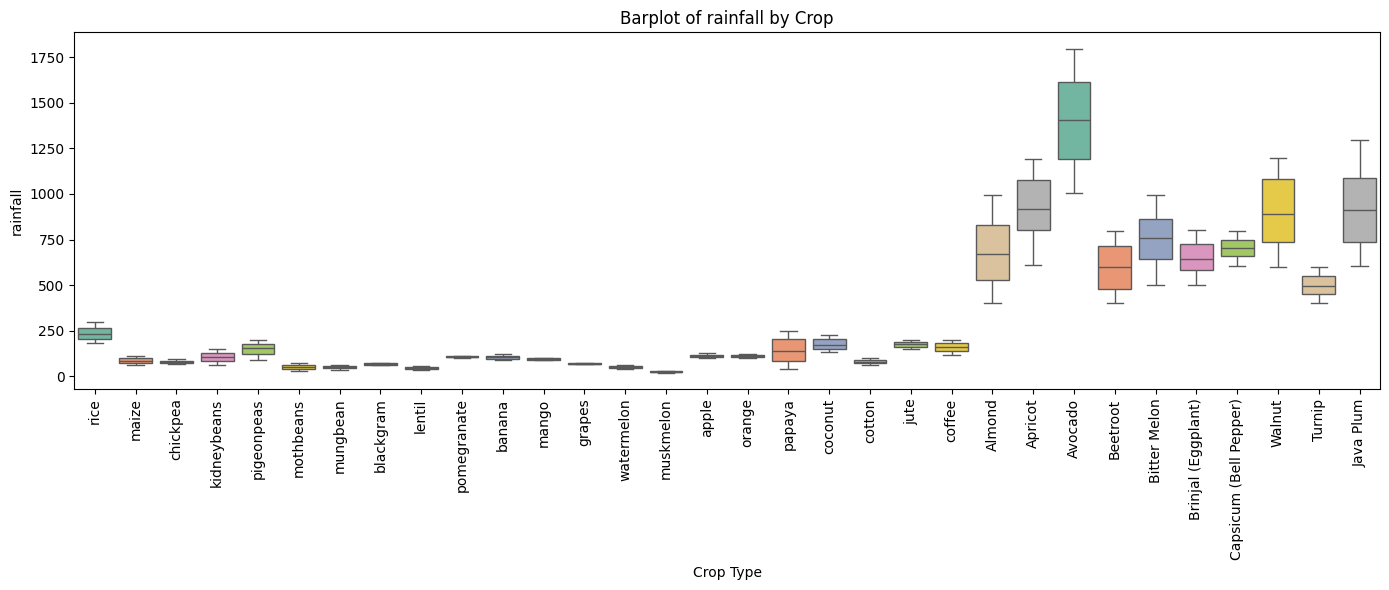

In [72]:
#  Boxplots by Crop Type
numeric_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']     
for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='label', y=feature, data=df, hue ='label', palette='Set2')
    plt.xlabel('Crop Type')
    plt.xticks(rotation=90)
    plt.title(f'Barplot of {feature} by Crop')
plt.tight_layout()
plt.show()


Stripplot for each numeric feature by crop type

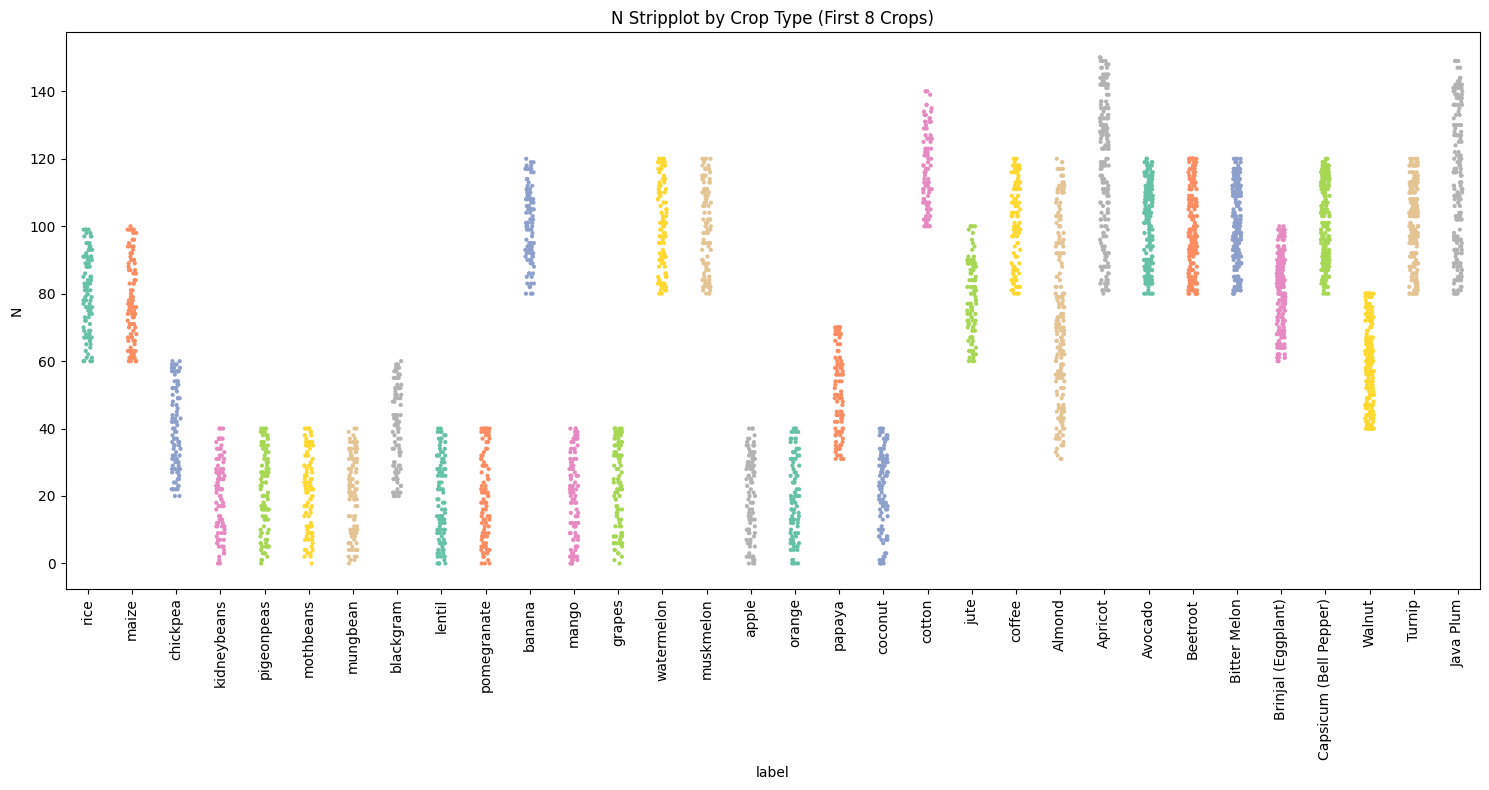

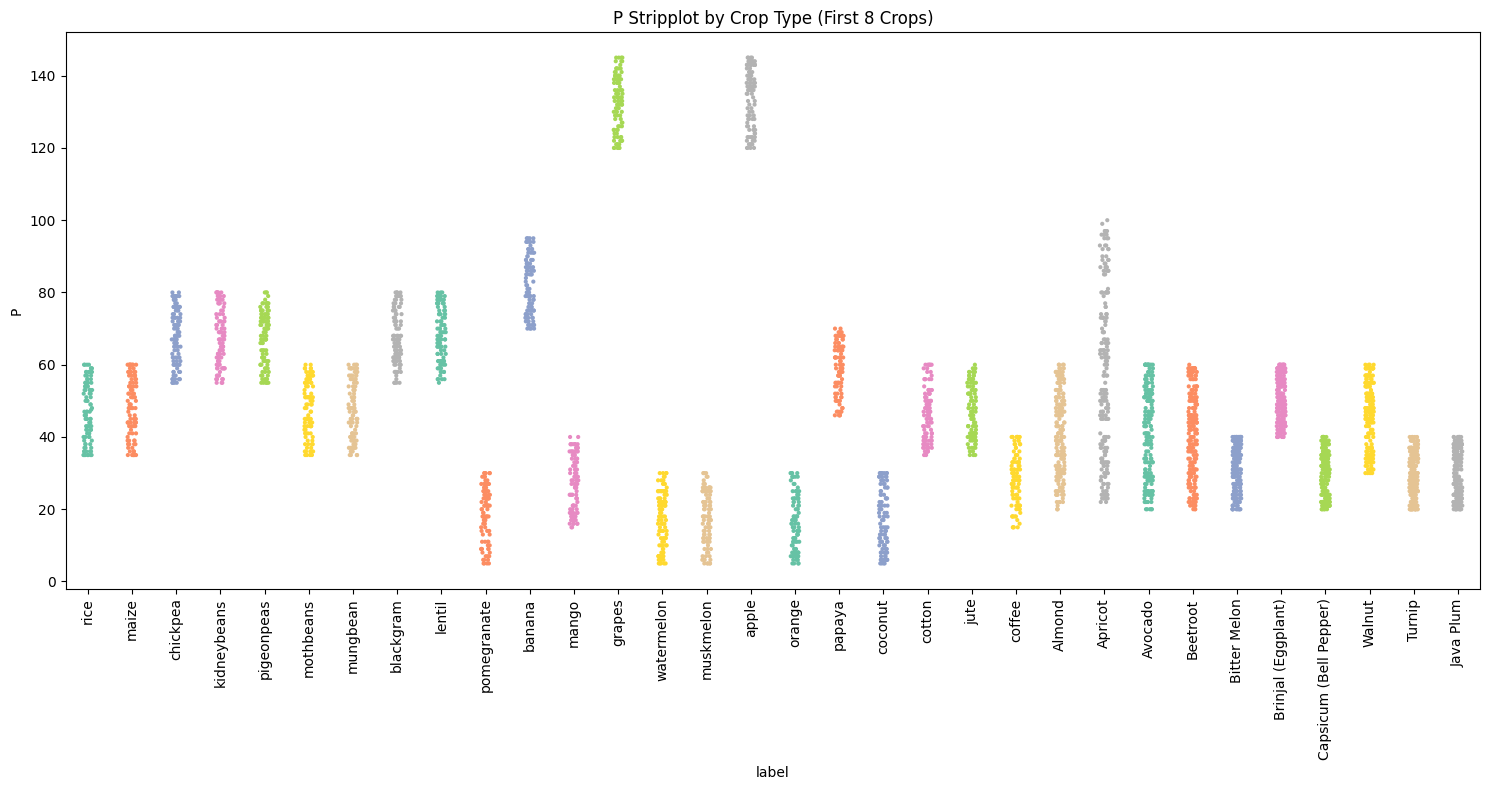

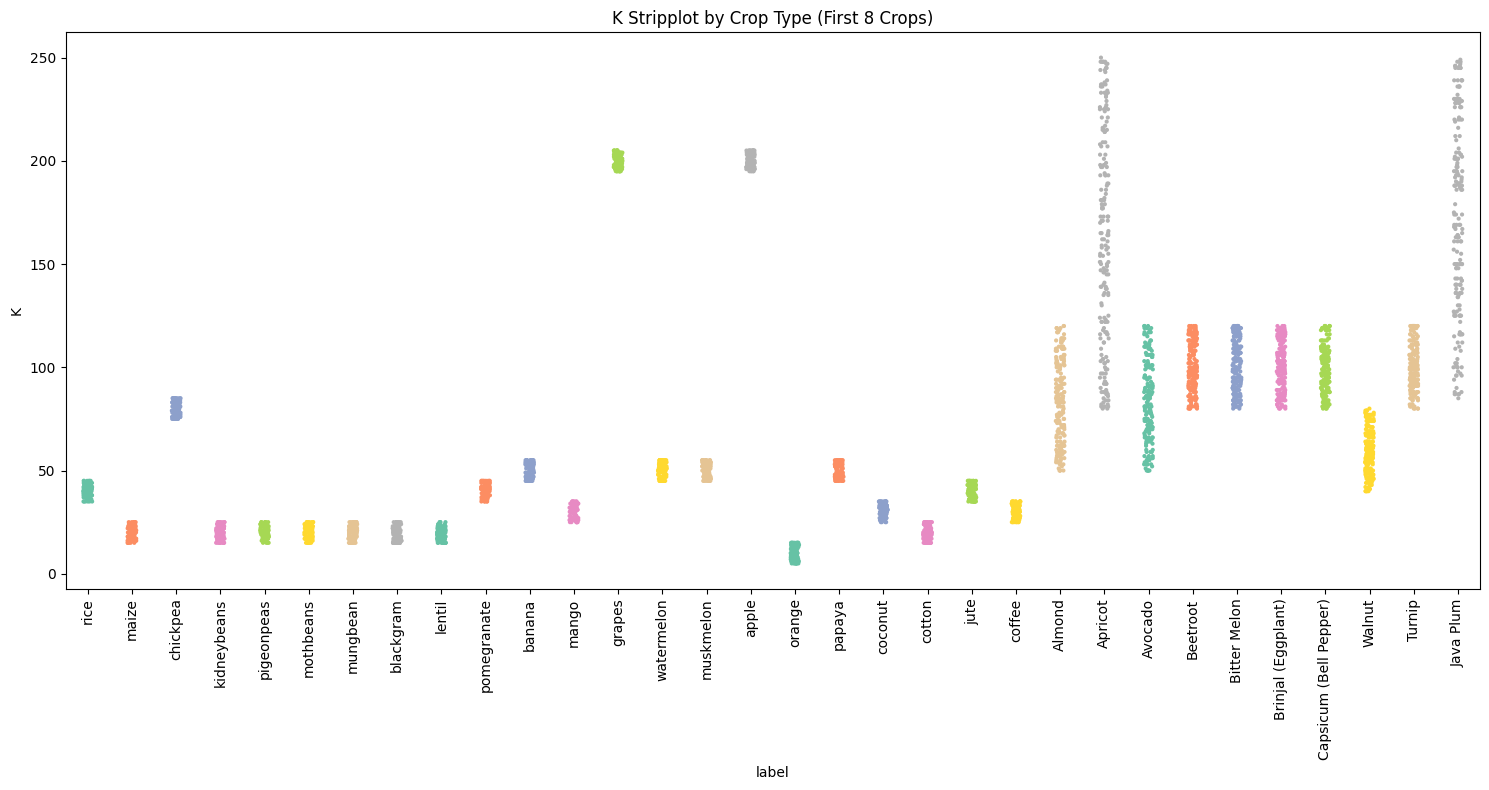

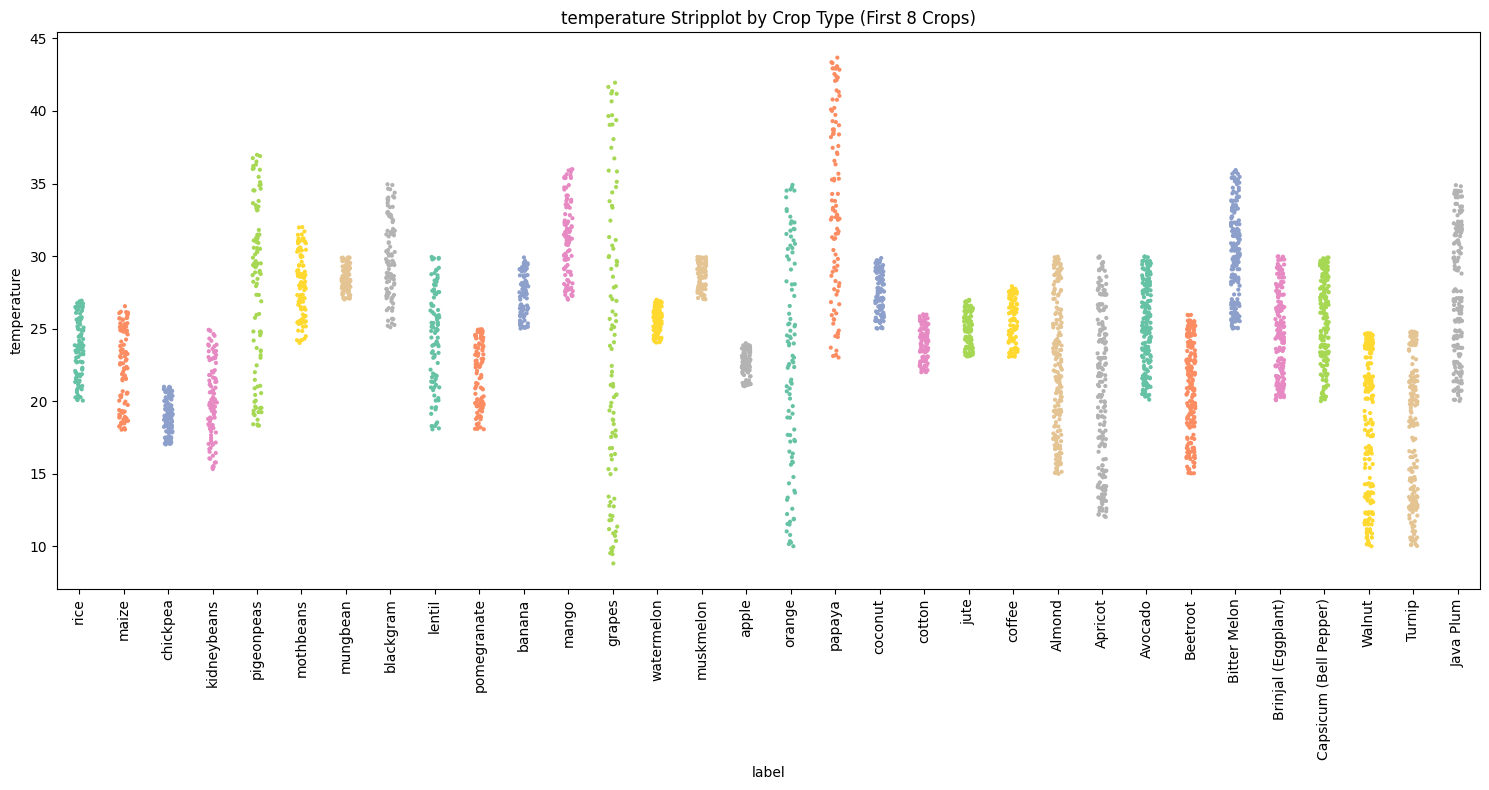

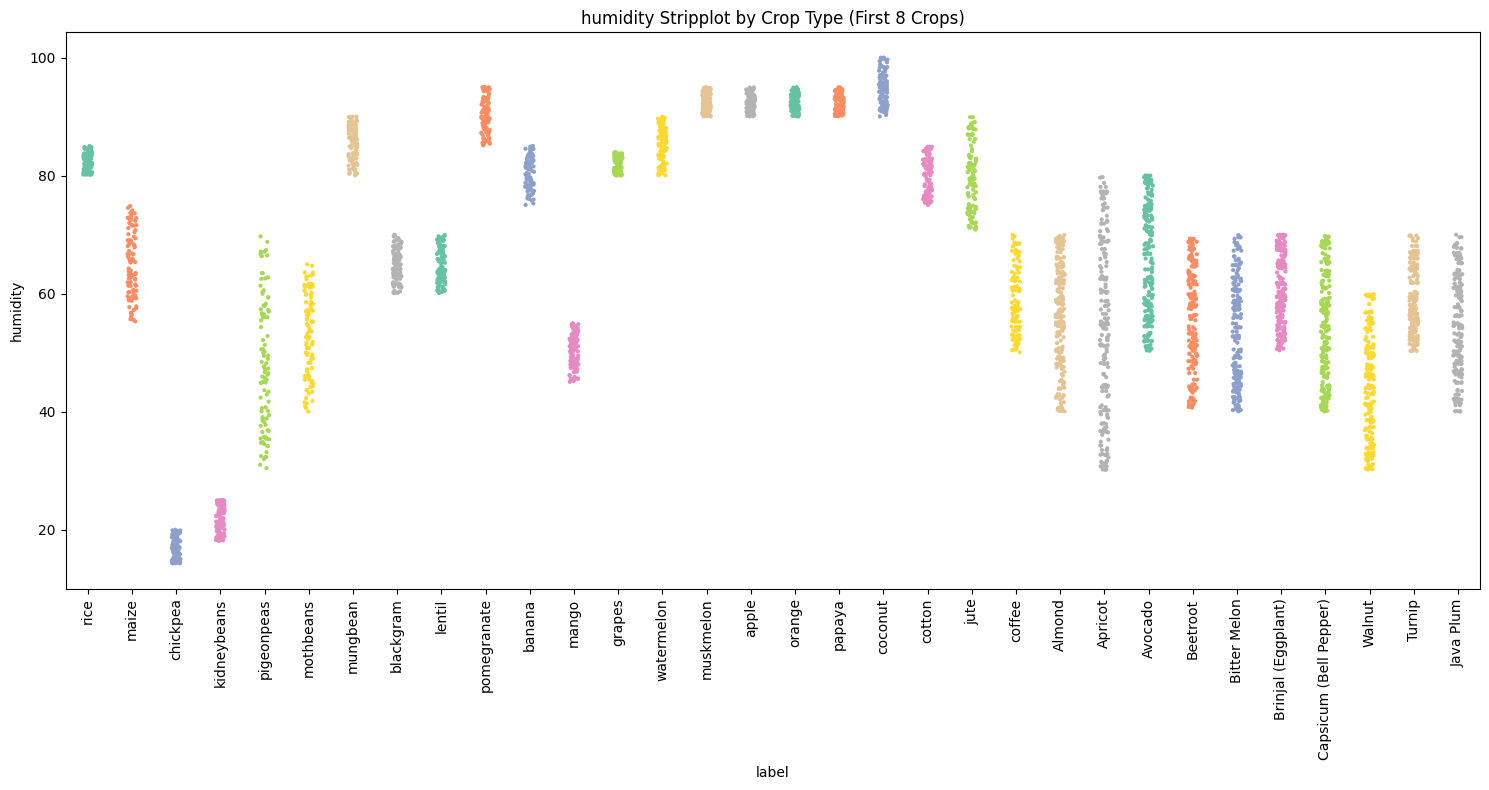

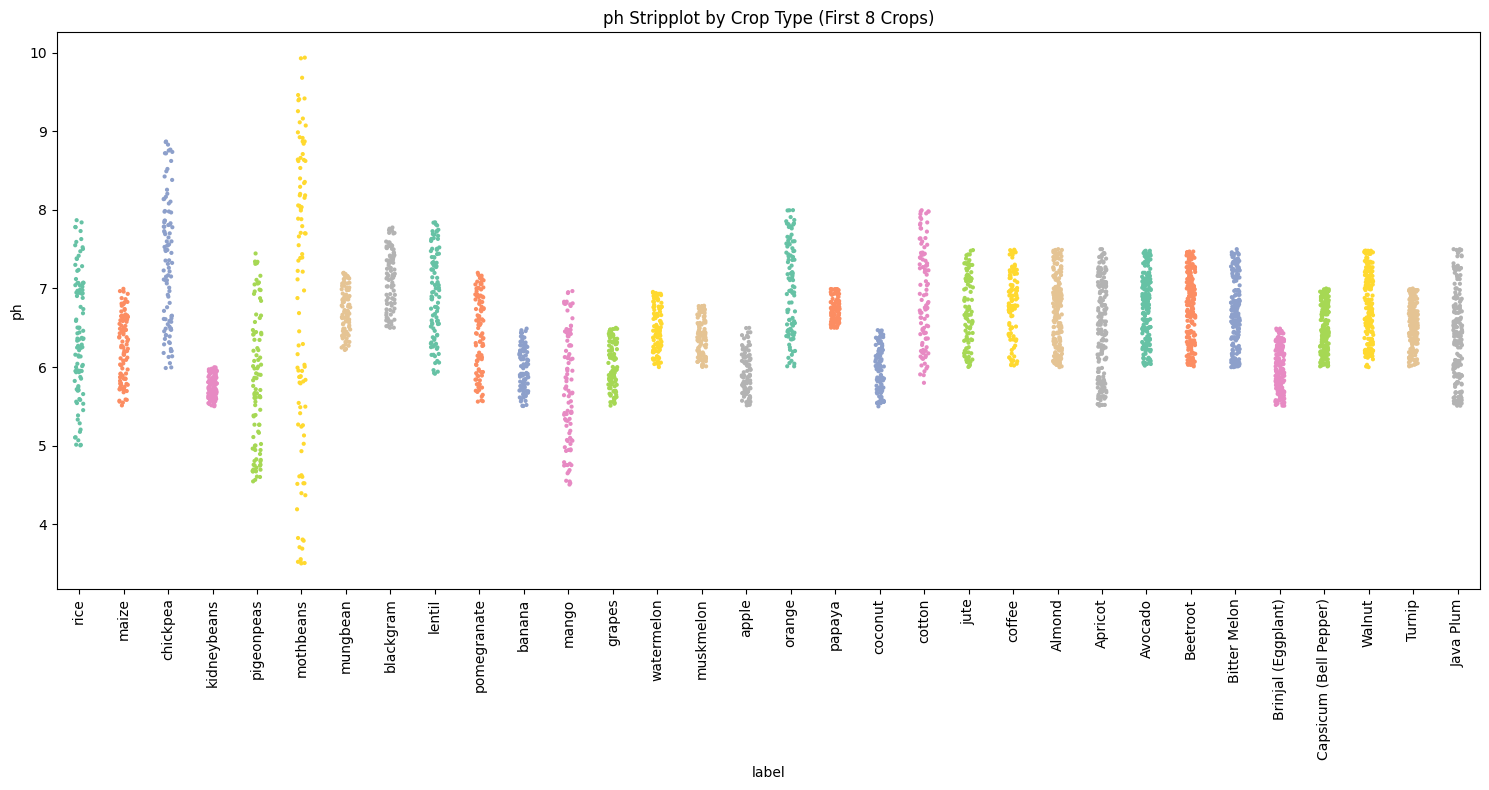

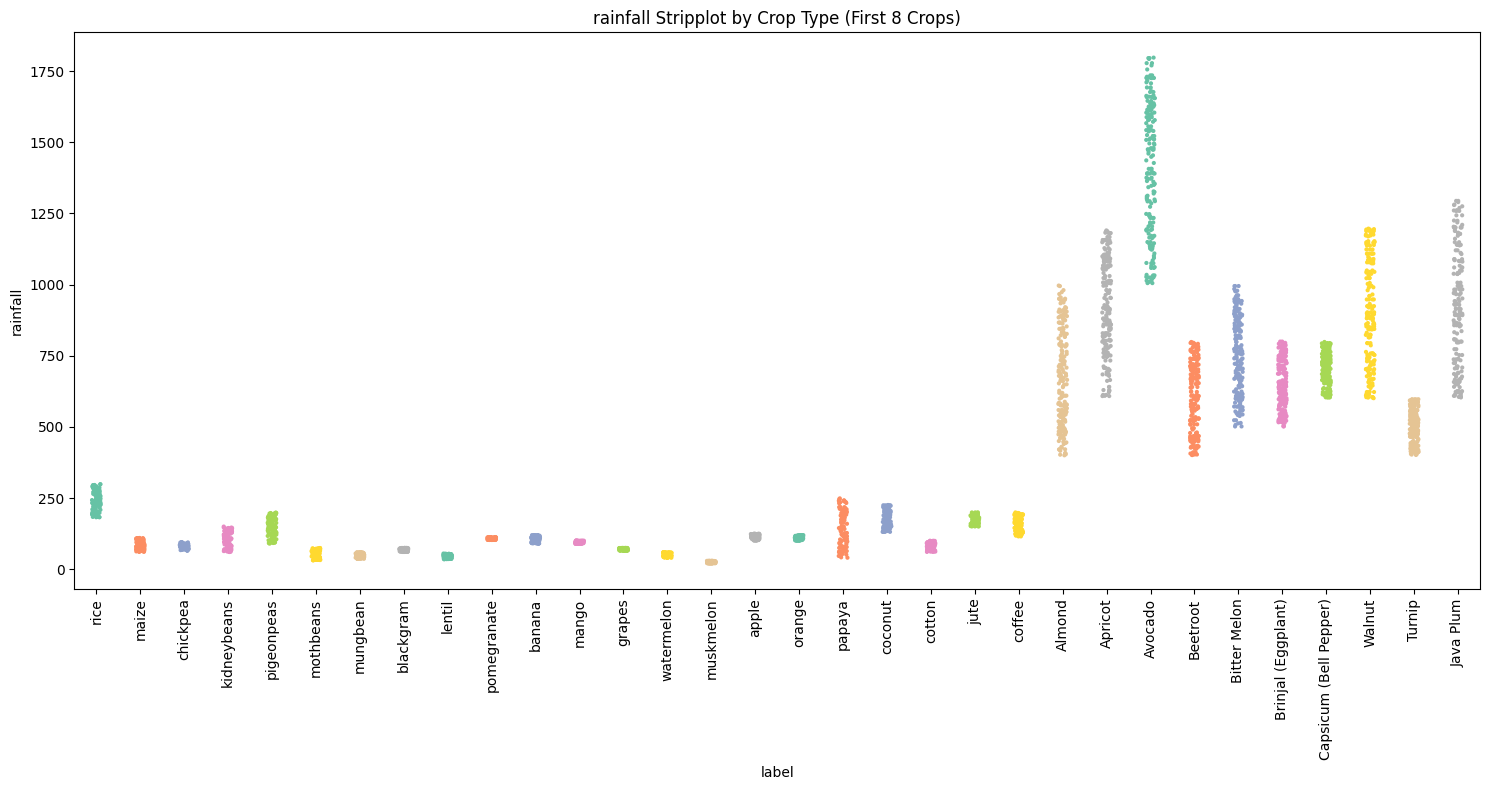

In [88]:
# Stripplot for each numeric feature by crop type (print each point for each crop type)
for feature in numeric_features:
    plt.figure(figsize=(15, 8))
    sns.stripplot(x='label', y=feature, data=df, palette='Set2', size=3, jitter=True)
    plt.xticks(rotation=90)
    plt.title(f'{feature} Stripplot by Crop Type (First 8 Crops)')
    plt.tight_layout()
    plt.show()

Density Plots for Numeric Features(by Crop)

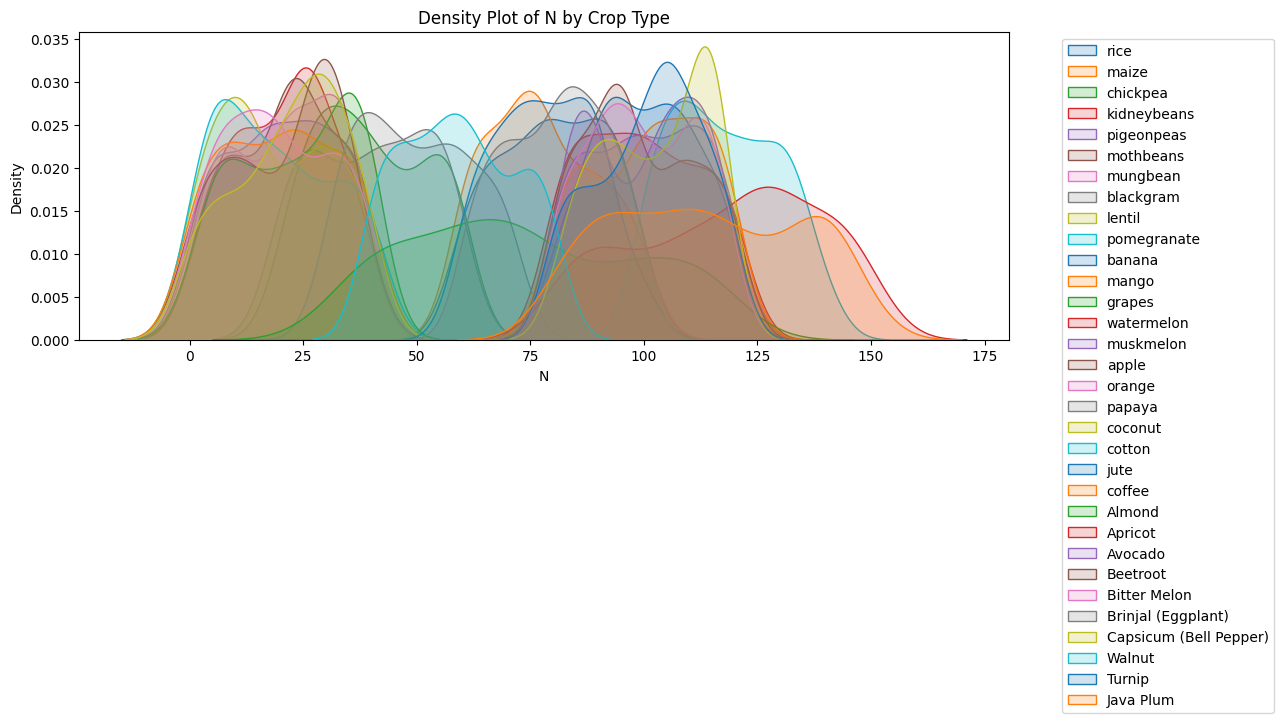

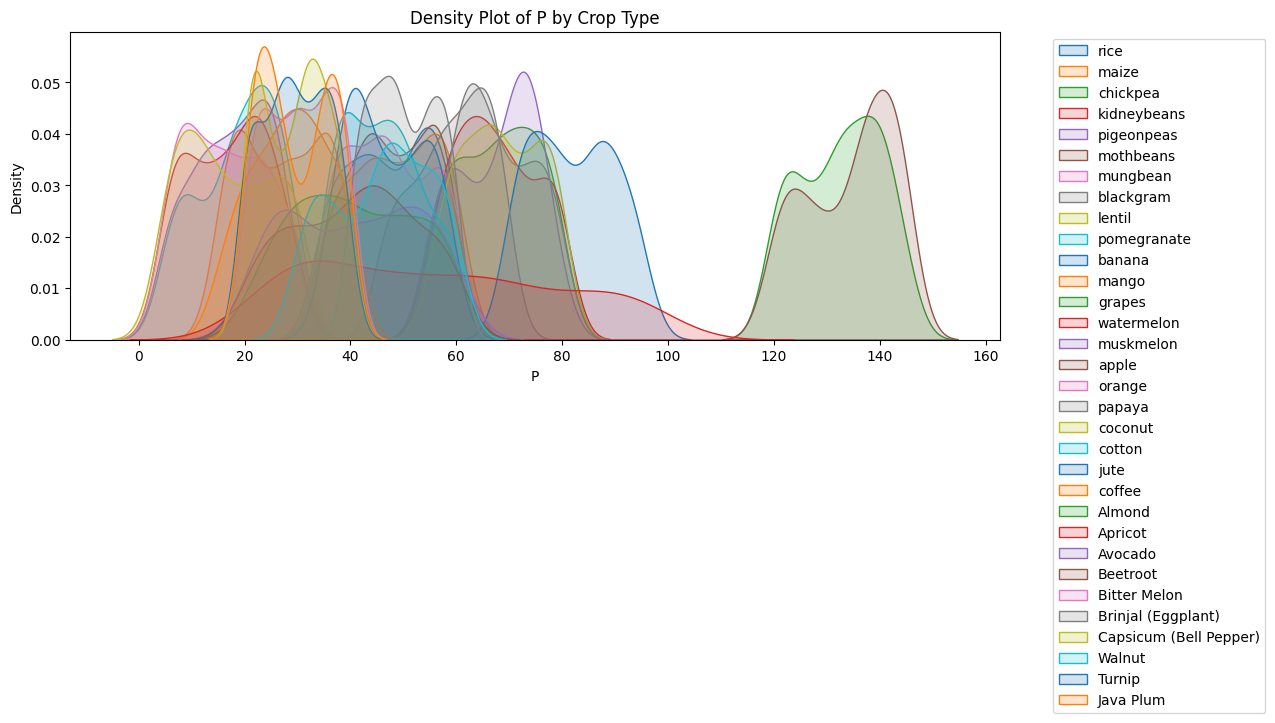

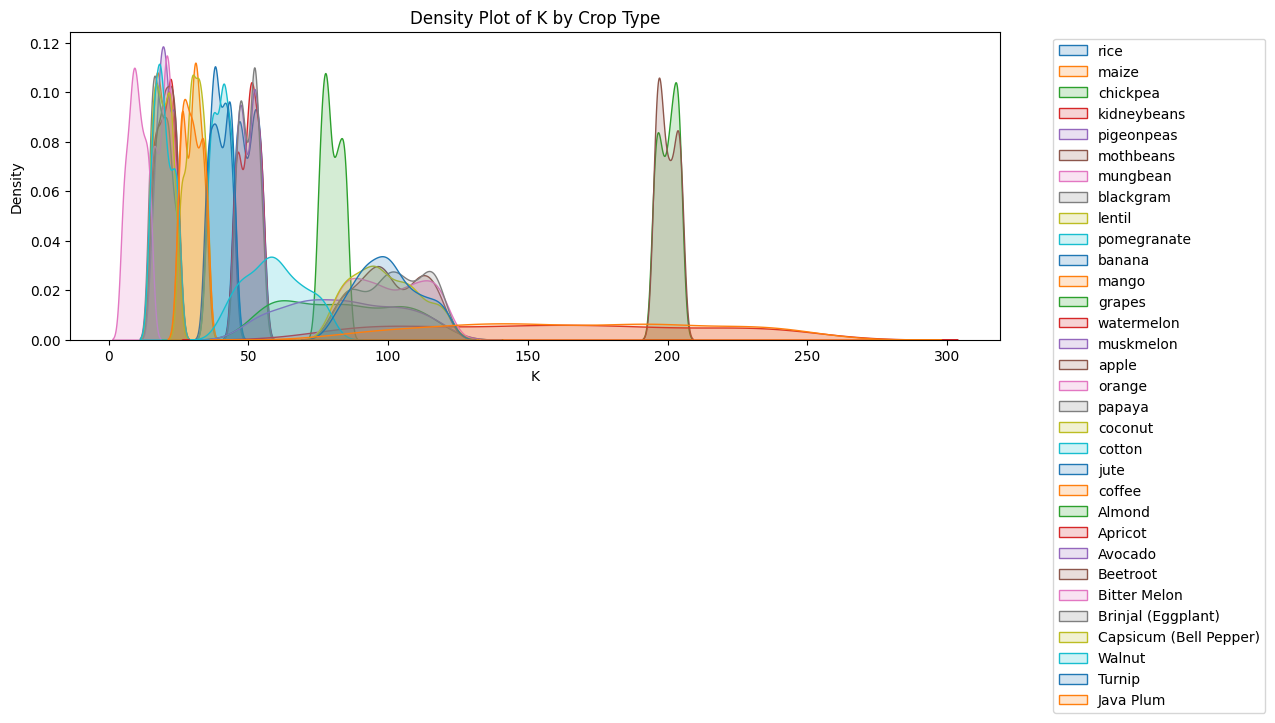

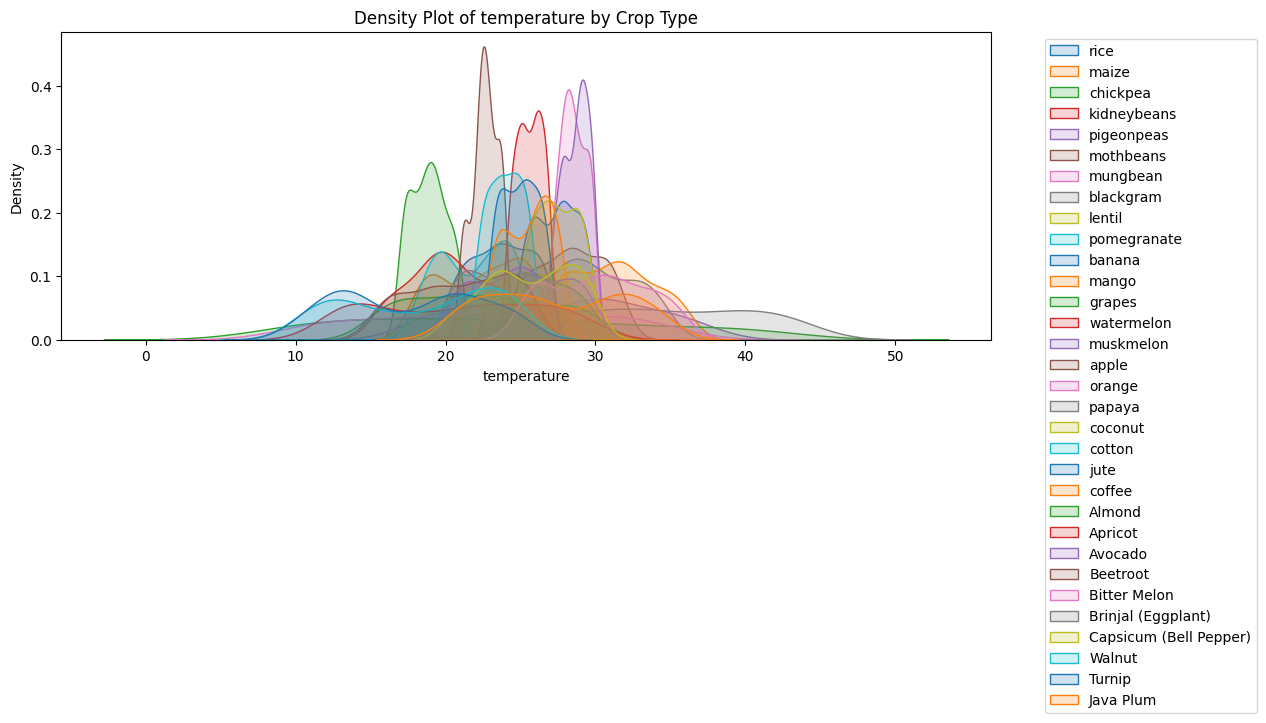

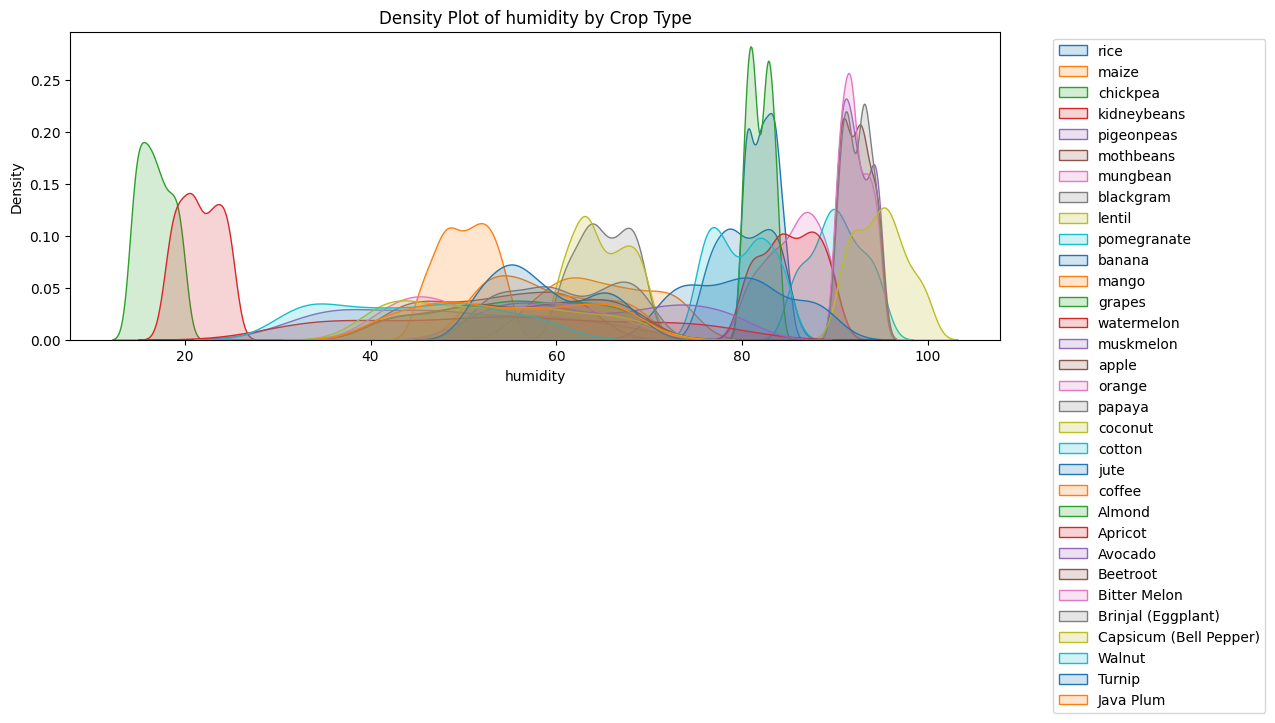

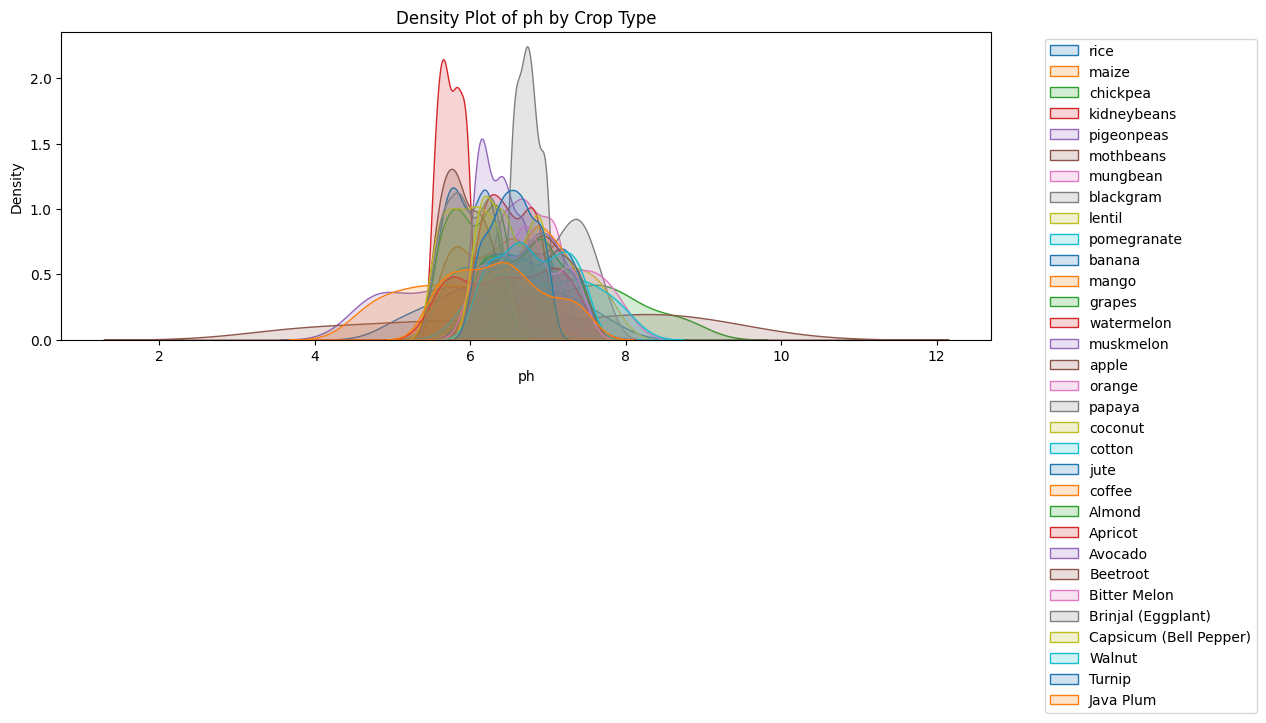

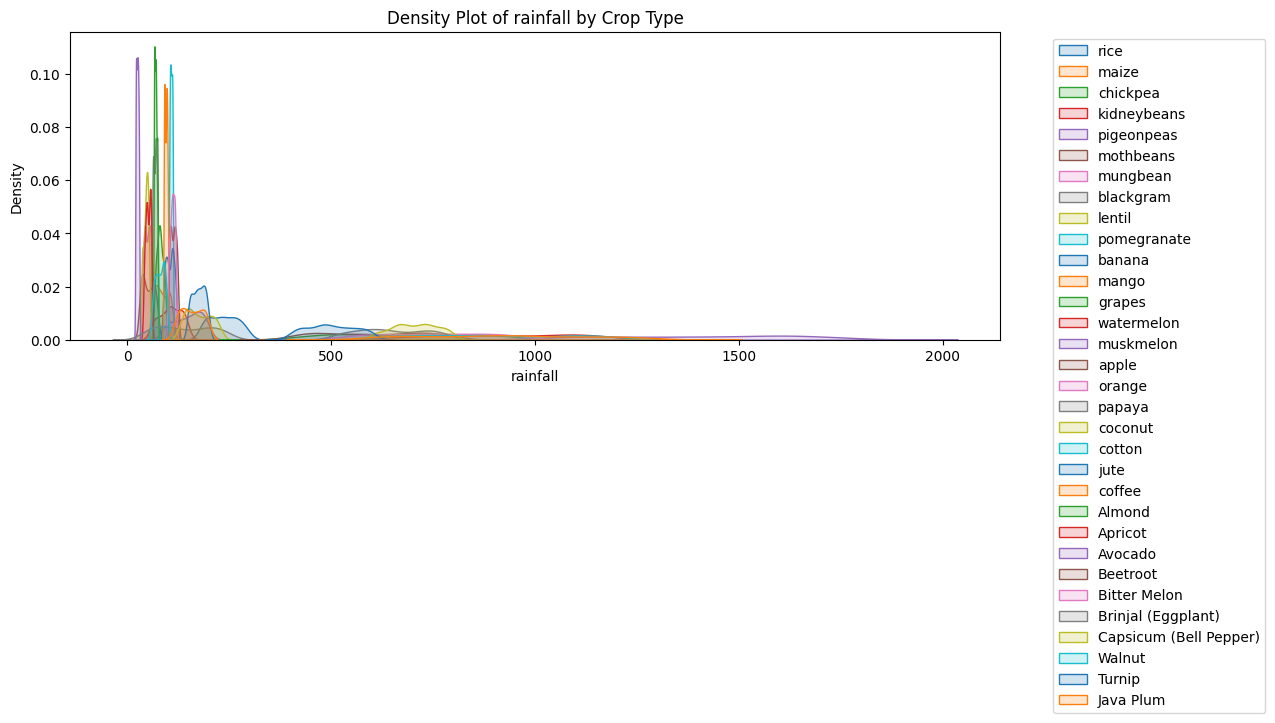

In [25]:
# Density Plots for Numeric Features(by Crop)

for col in numeric_features:
    plt.figure(figsize=(12, 4))
    for label in df['label'].unique():
        sns.kdeplot(df[df['label'] == label][col], label=label, fill=True, alpha=0.2)
    plt.title(f'Density Plot of {col} by Crop Type')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Violin Plots – Feature Distribution by Crop

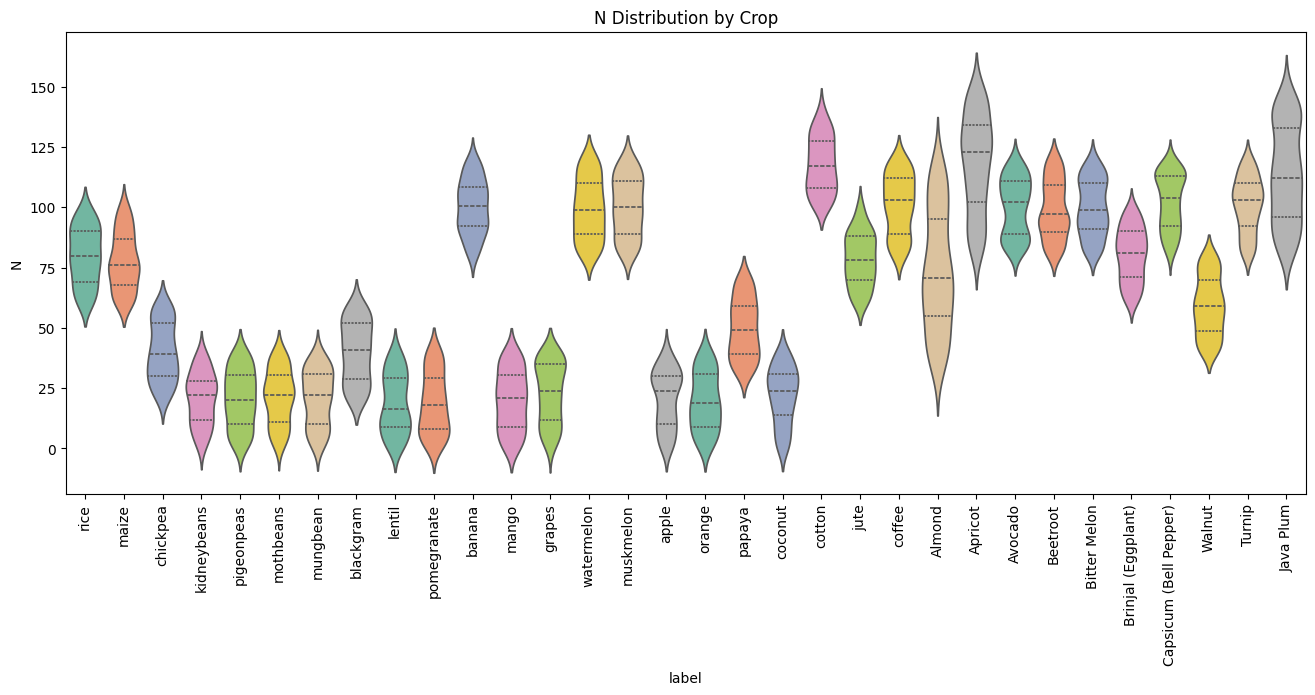

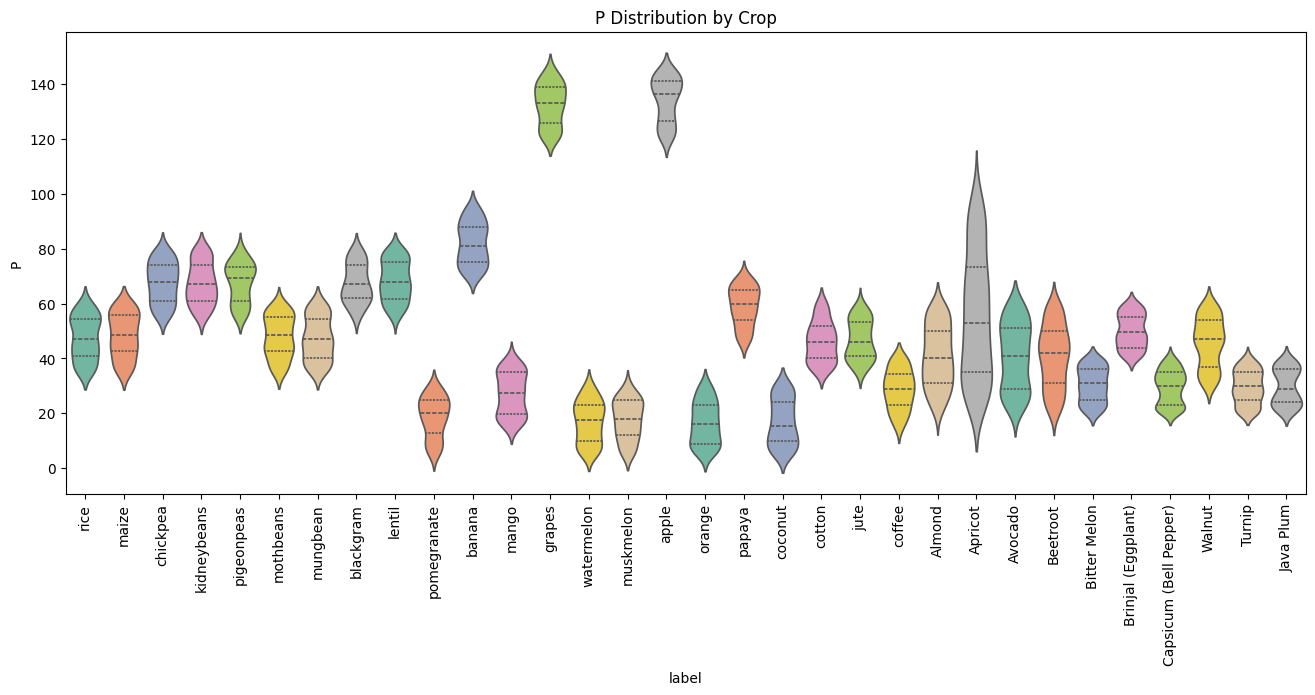

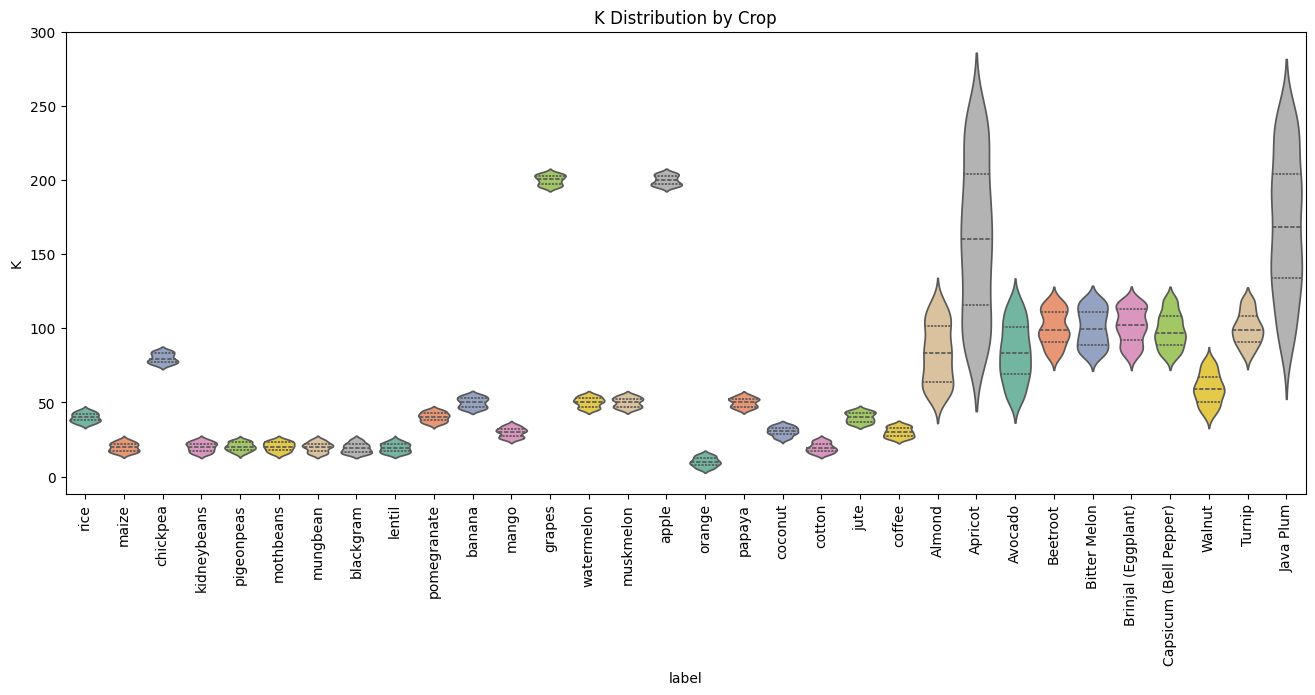

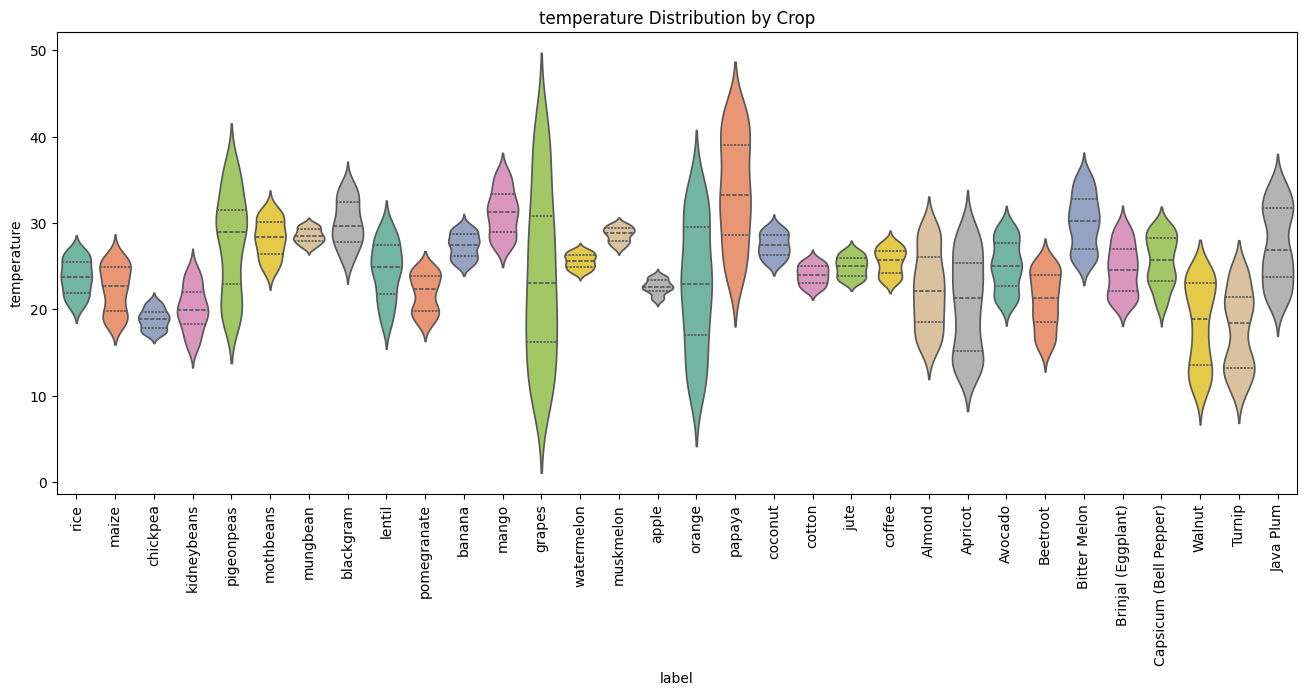

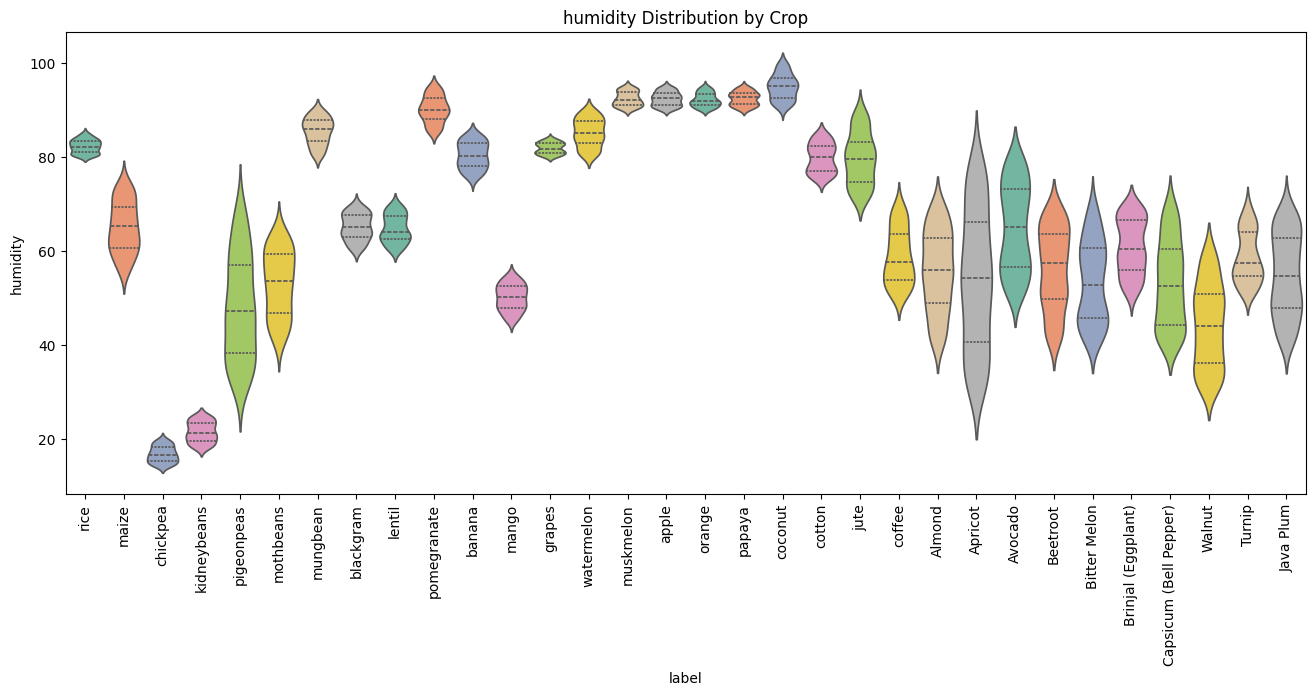

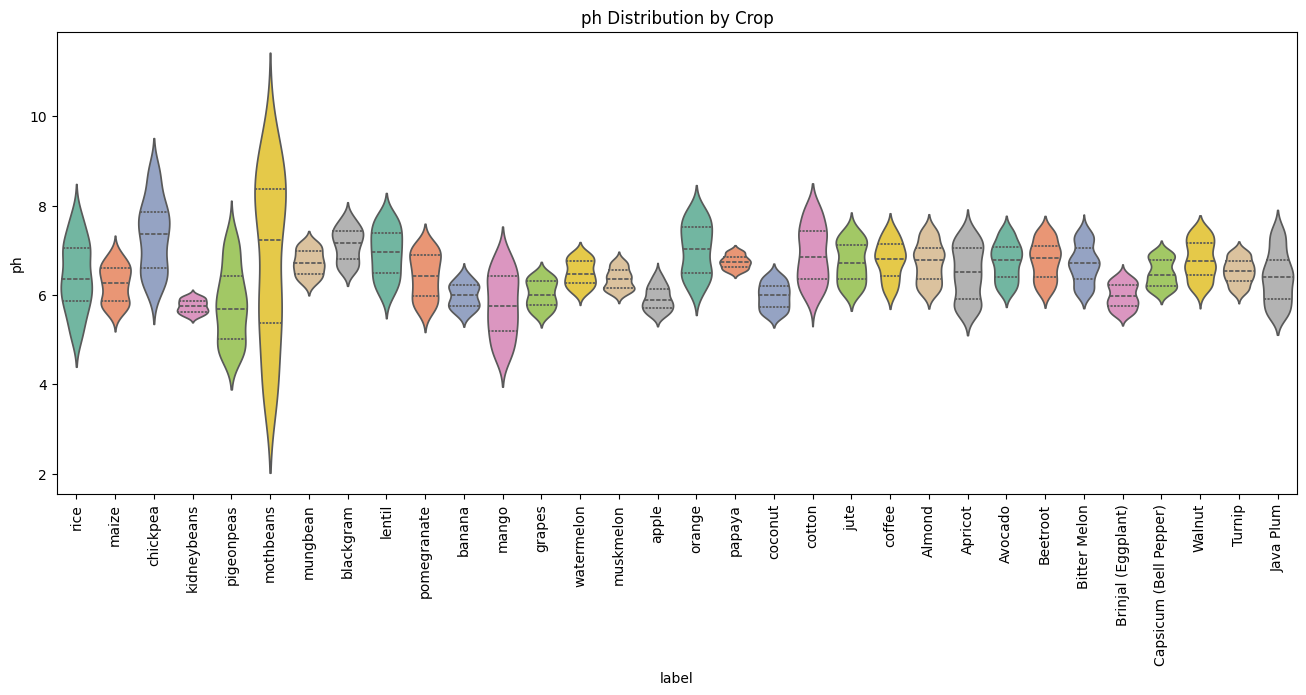

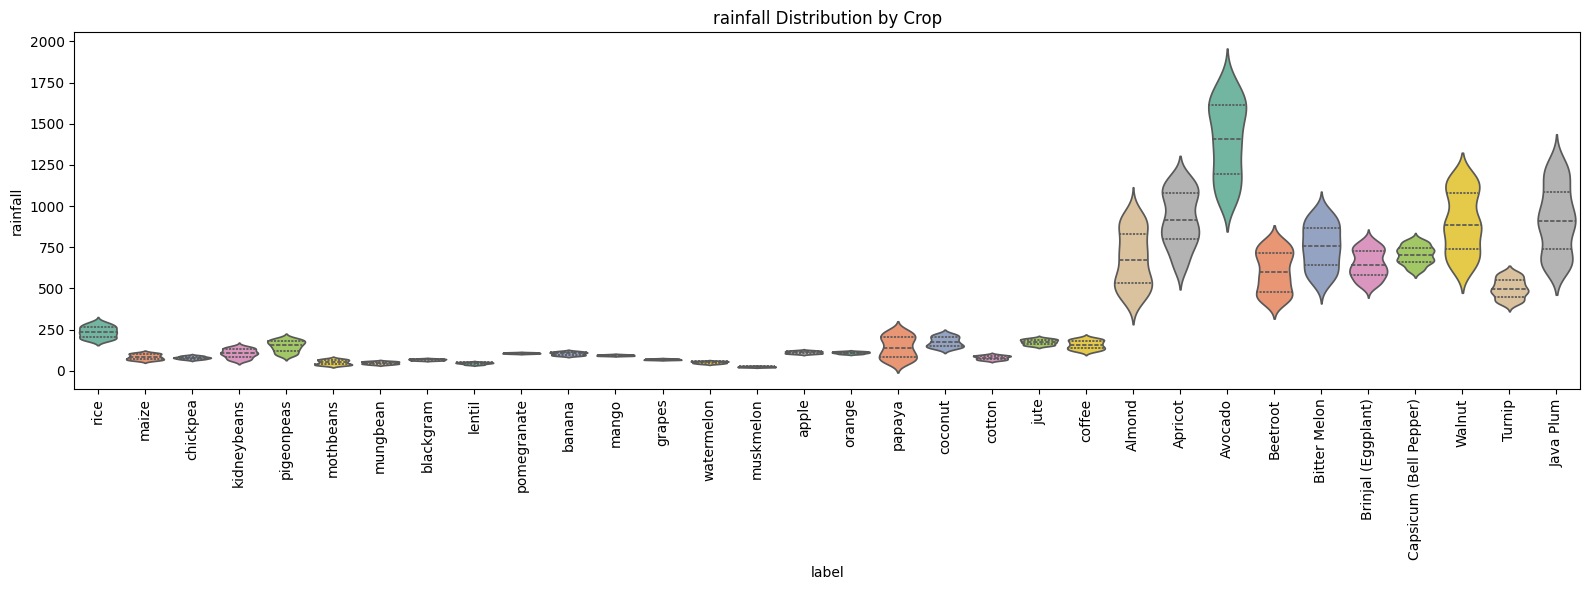

In [33]:
# Violin Plots – Feature Distribution by Crop


for i, col in enumerate(numeric_features):
    plt.figure(figsize=(16, 6))
    sns.violinplot(x='label', y=col, data=df, inner='quartile', scale='width', palette='Set2')
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Crop')
plt.tight_layout()
plt.show()


 Correlation 
 

In [27]:
df.corr(numeric_only=True)

N         P         K  temperature  humidity        ph  \
N              1.000000 -0.313937  0.345922    -0.054890 -0.104032  0.084281   
P             -0.313937  1.000000  0.301459    -0.059008  0.017938 -0.136685   
K              0.345922  0.301459  1.000000    -0.136572 -0.104574 -0.097465   
temperature   -0.054890 -0.059008 -0.136572     1.000000  0.217274 -0.050904   
humidity      -0.104032  0.017938 -0.104574     0.217274  1.000000 -0.056614   
ph             0.084281 -0.136685 -0.097465    -0.050904 -0.056614  1.000000   
rainfall       0.524310 -0.212589  0.465888    -0.138334 -0.329833  0.081633   
label_encoded -0.513329 -0.011110 -0.570977     0.201472  0.409640 -0.076356   

               rainfall  label_encoded  
N              0.524310      -0.513329  
P             -0.212589      -0.011110  
K              0.465888      -0.570977  
temperature   -0.138334       0.201472  
humidity      -0.329833       0.409640  
ph             0.081633      -0.076356  
rainfall       1.000000      -0.752537  
label_encoded -0.752537       1.000000

<Axes: >

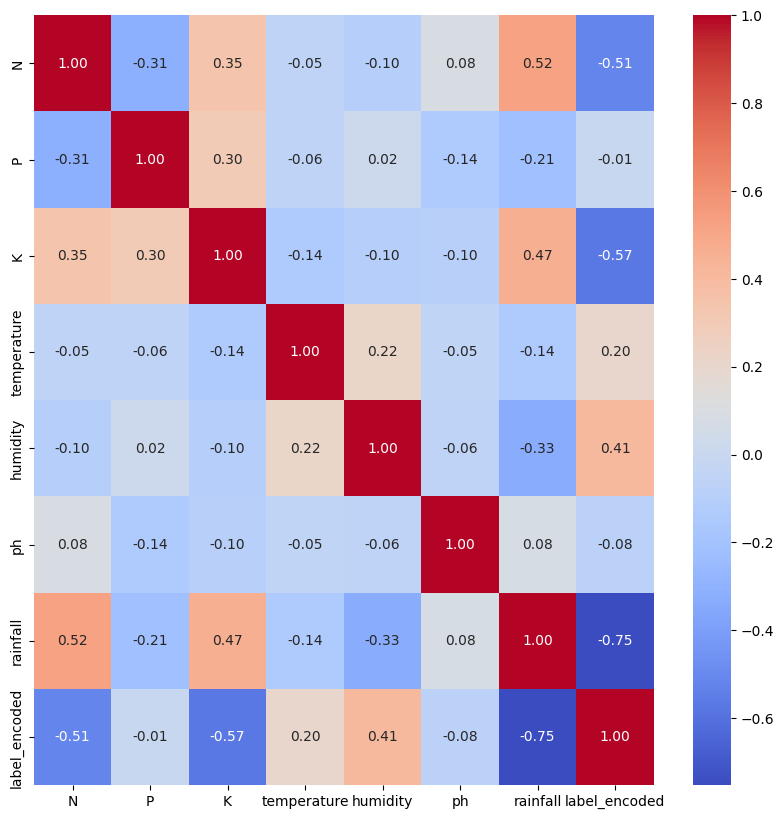

In [28]:
# Correlation Heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

Class Balance Visualization (with percentages)

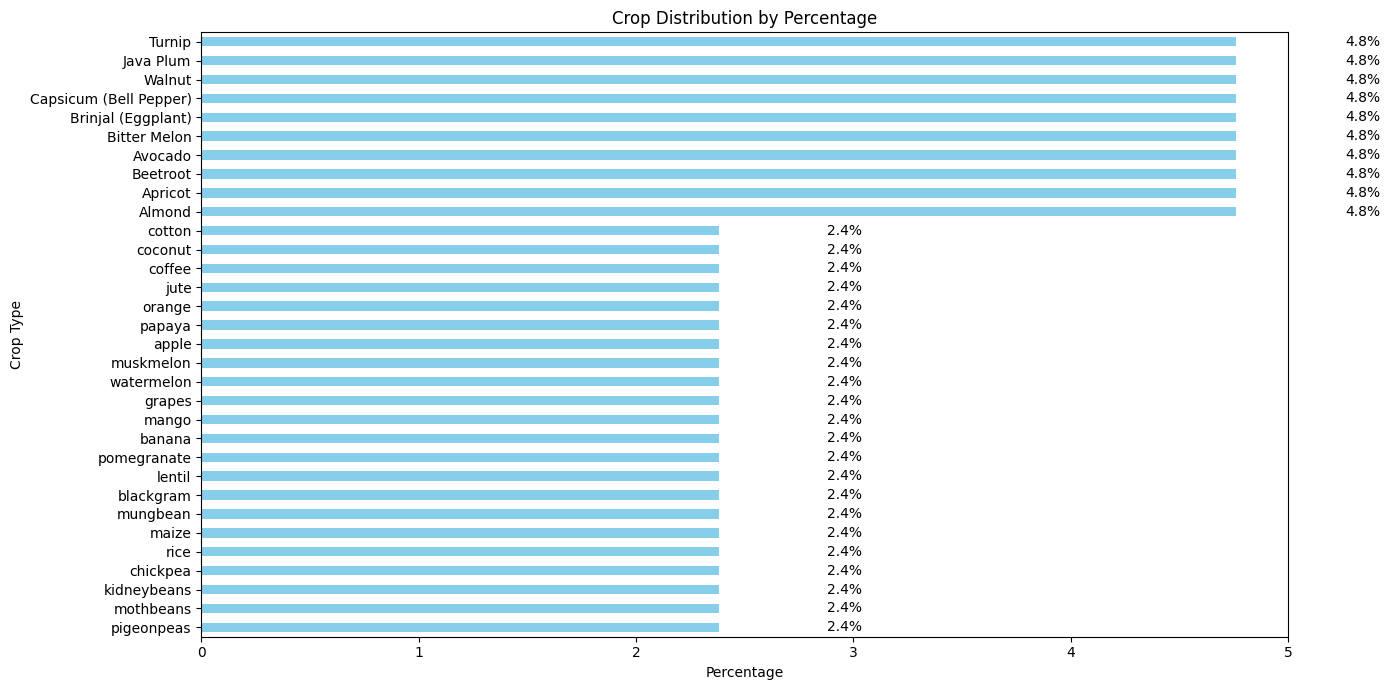

In [29]:
# 📊 Class Balance with Percentages

plt.figure(figsize=(14, 7))
ax = df['label'].value_counts(normalize=True).mul(100).sort_values().plot(kind='barh', color='skyblue')
for i, v in enumerate(df['label'].value_counts(normalize=True).mul(100).sort_values()):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
plt.title('Crop Distribution by Percentage')
plt.xlabel('Percentage')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()


# =====================================================
# ⚖️ FEATURE SCALING & DATA SPLIT & Sampling
# =====================================================

In [97]:
# Target column to balance
label_column = 'label'

# Get the minimum count per label (for downsampling)
min_count = df[label_column].value_counts().min()

# Sample equally from each class
df = (
    df.groupby(label_column)
      .apply(lambda x: x.sample(n=min_count, random_state=42))
      .reset_index(drop=True)
)

In [98]:
df['label'].nunique()

32

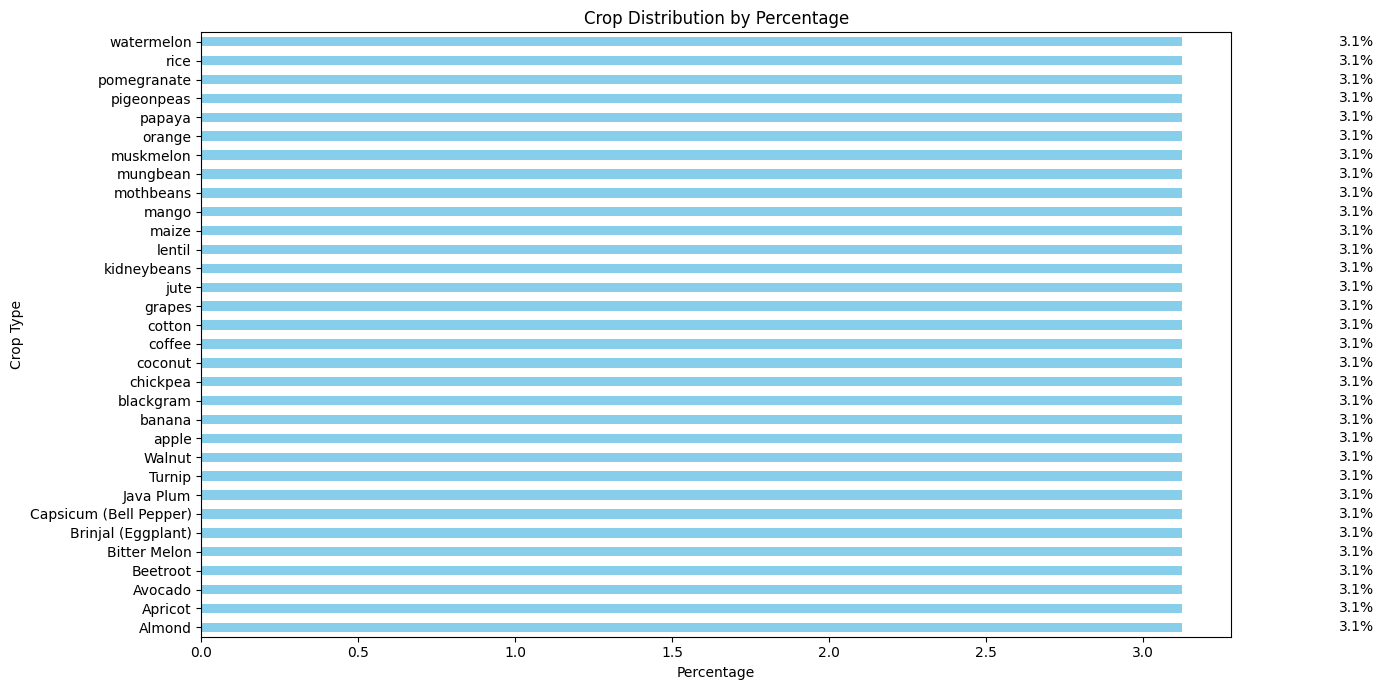

In [99]:
# 📊 Class Balance with Percentages

plt.figure(figsize=(14, 7))
ax = df['label'].value_counts(normalize=True).mul(100).sort_values().plot(kind='barh', color='skyblue')
for i, v in enumerate(df['label'].value_counts(normalize=True).mul(100).sort_values()):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
plt.title('Crop Distribution by Percentage')
plt.xlabel('Percentage')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

In [100]:
df['label'].value_counts()

label
Almond                    100
Apricot                   100
Avocado                   100
Beetroot                  100
Bitter Melon              100
Brinjal (Eggplant)        100
Capsicum (Bell Pepper)    100
Java Plum                 100
Turnip                    100
Walnut                    100
apple                     100
banana                    100
blackgram                 100
chickpea                  100
coconut                   100
coffee                    100
cotton                    100
grapes                    100
jute                      100
kidneybeans               100
lentil                    100
maize                     100
mango                     100
mothbeans                 100
mungbean                  100
muskmelon                 100
orange                    100
papaya                    100
pigeonpeas                100
pomegranate               100
rice                      100
watermelon                100
Name: count, dtype: int64

In [101]:
# ⚖️ Feature Scaling
scaler = StandardScaler()
features = df.drop(['label', 'label_encoded'], axis=1)
target = df['label_encoded']
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [102]:
# 🧪 Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.3, random_state=42)

# =====================================================
# 🤖 MODEL TRAINING & EVALUATION
# =====================================================

In [35]:
svc = SVC(kernel='rbf', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=100,random_state=2)

In [36]:
models = {
    'SVC' : svc,
    'KNeighborsClassifier' : knc,
    'DecisionTreeClassifier': dtc,
    'LogisticRegression': lrc,
    'RandomForestClassifier': rfc,
    'AdaBoost': abc,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier':gbdt,
    'XGBClassifier':xgb
}

In [37]:
models.items()

dict_items([('SVC', SVC(gamma=1.0)), ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=5)), ('LogisticRegression', LogisticRegression(penalty='l1', solver='liblinear')), ('RandomForestClassifier', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BaggingClassifier', BaggingClassifier(n_estimators=50, random_state=2)), ('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interactio


 Model: SVC

 Training Performance:
Accuracy  : 0.9625
Precision : 0.9625
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        69
           1       1.00      0.95      0.98        65
           2       0.97      1.00      0.98        59
           3       0.89      0.76      0.82        74
           4       0.92      0.93      0.93        61
           5       0.93      1.00      0.96        63
           6       0.81      0.99      0.89        74
           7       0.97      0.86      0.91        74
           8       0.85      0.97      0.91        70
           9       0.95      0.97      0.96        79
          10       1.00      1.00      1.00        65
          11       1.00      1.00      1.00        67
          12       0.89      0.96      0.92        68
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        67
          15       1.00      1.00    

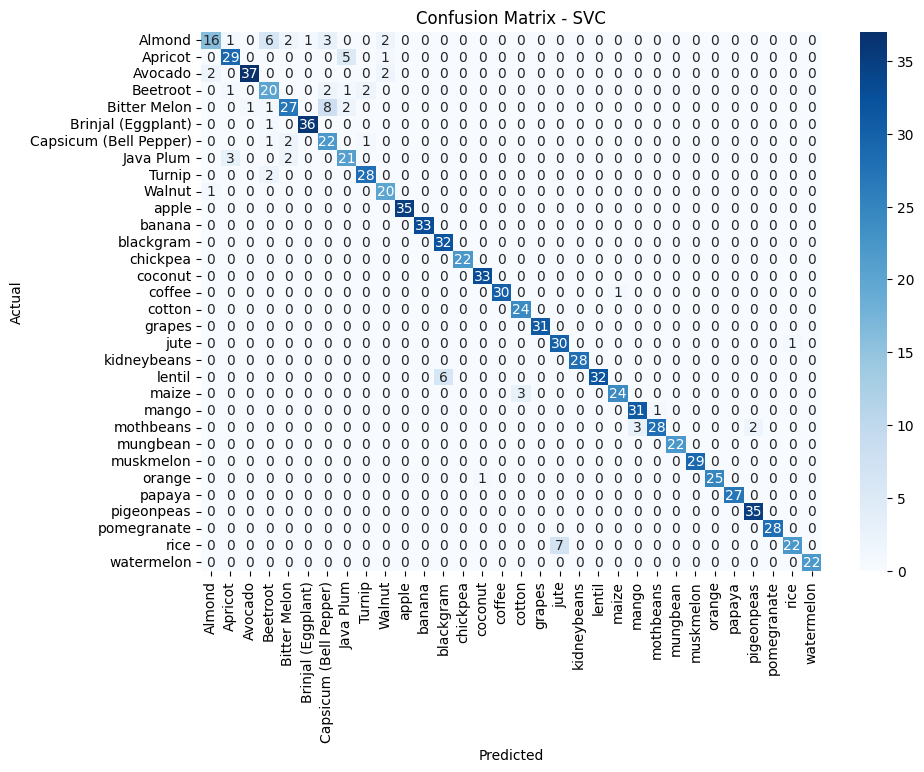


 Model: KNeighborsClassifier

 Training Performance:
Accuracy  : 0.9138
Precision : 0.9138
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.49      0.64        69
           1       0.98      0.71      0.82        65
           2       0.92      0.98      0.95        59
           3       0.72      0.74      0.73        74
           4       0.77      0.89      0.82        61
           5       0.78      0.97      0.87        63
           6       0.65      0.88      0.75        74
           7       0.83      0.65      0.73        74
           8       0.79      0.87      0.83        70
           9       0.95      0.97      0.96        79
          10       0.96      1.00      0.98        65
          11       1.00      1.00      1.00        67
          12       0.80      0.94      0.86        68
          13       1.00      1.00      1.00        78
          14       0.96      1.00      0.98        67
          15       0

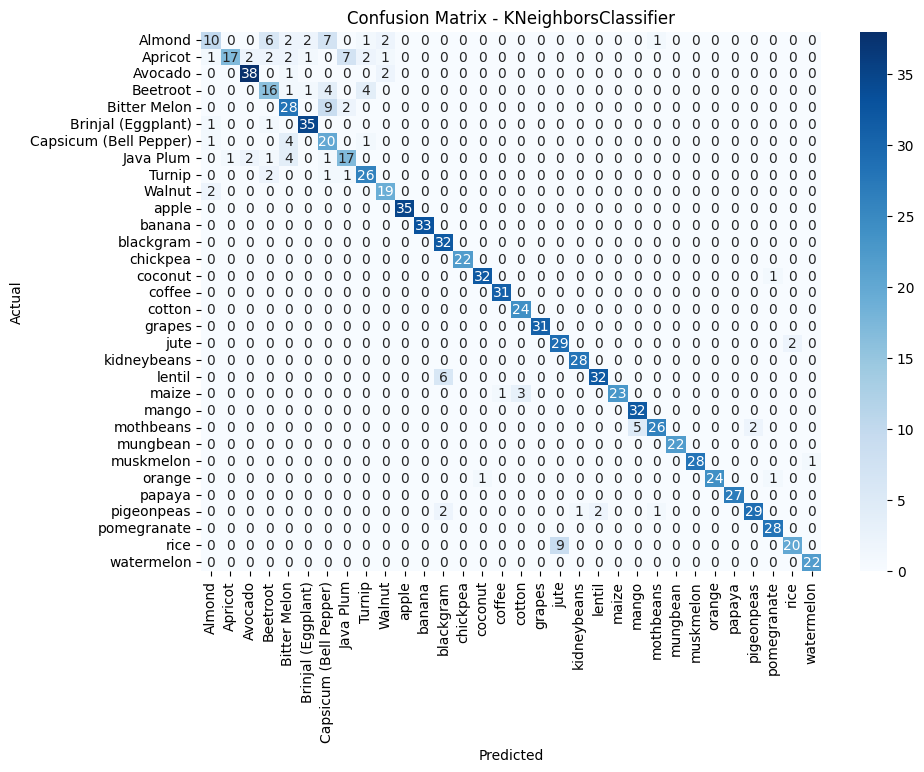


 Model: DecisionTreeClassifier

 Training Performance:
Accuracy  : 0.2643
Precision : 0.2643
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        59
           3       0.13      1.00      0.23        74
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00        74
           7       0.00      0.00      0.00        74
           8       0.00      0.00      0.00        70
           9       0.60      1.00      0.75        79
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        67
          12       0.00      0.00      0.00        68
          13       1.00      1.00      1.00        78
          14       0.00      0.00      0.00        67
          15      

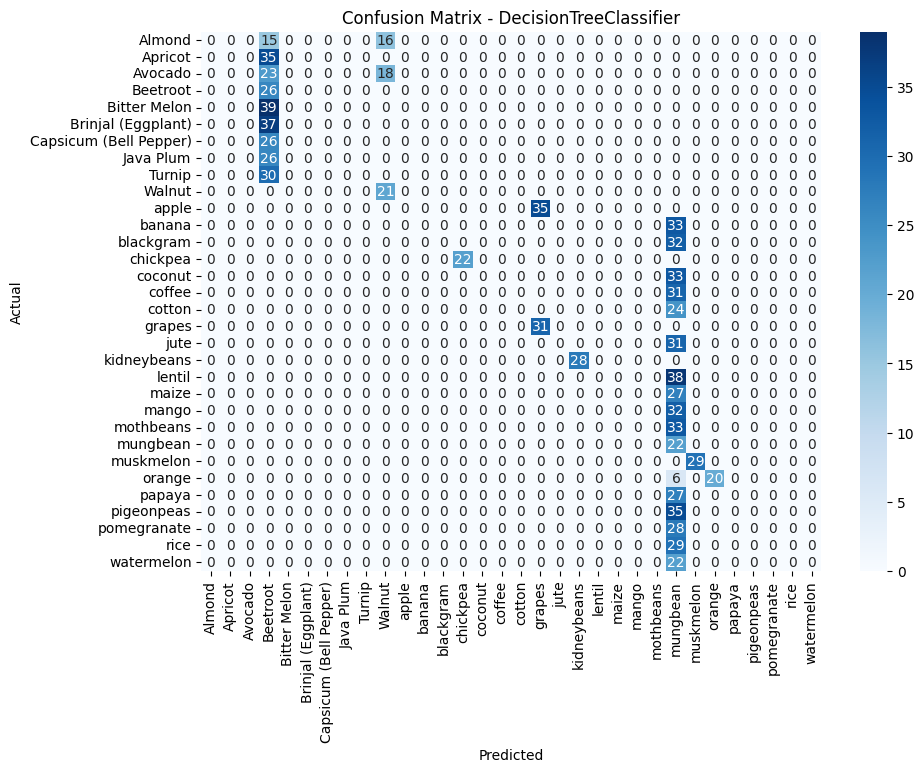


 Model: LogisticRegression

 Training Performance:
Accuracy  : 0.8571
Precision : 0.8571
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.32      0.43        69
           1       0.89      0.72      0.80        65
           2       0.92      0.97      0.94        59
           3       0.59      0.62      0.61        74
           4       0.60      0.59      0.60        61
           5       0.87      0.97      0.92        63
           6       0.49      0.61      0.54        74
           7       0.62      0.64      0.63        74
           8       0.67      0.73      0.70        70
           9       0.85      0.92      0.88        79
          10       1.00      1.00      1.00        65
          11       0.99      1.00      0.99        67
          12       0.85      0.88      0.86        68
          13       1.00      1.00      1.00        78
          14       0.94      1.00      0.97        67
          15       0.9

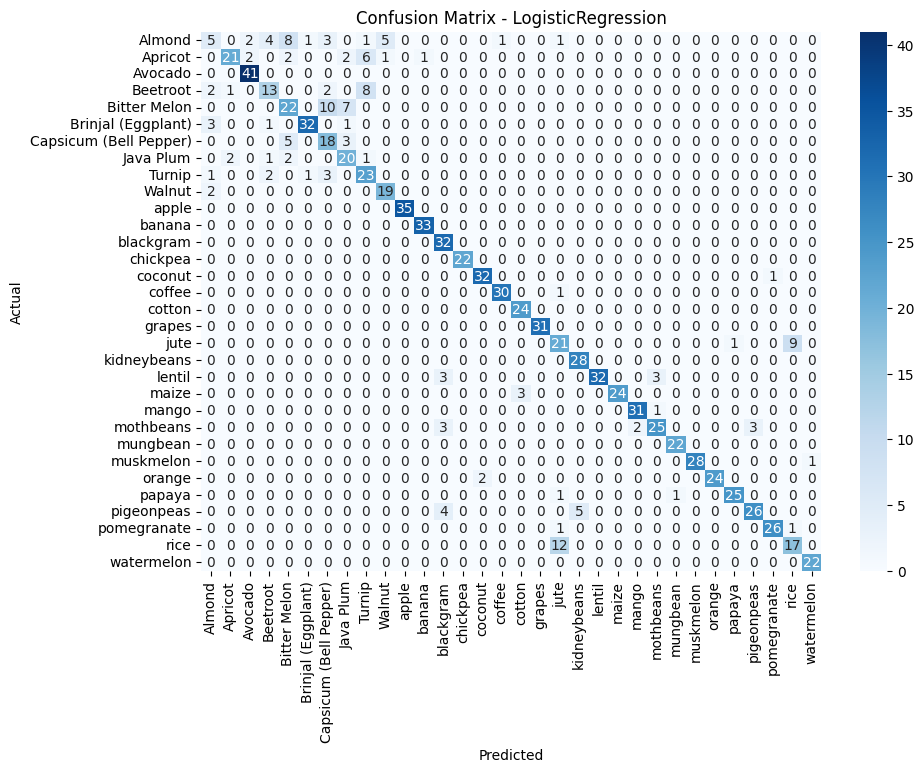


 Model: RandomForestClassifier

 Training Performance:
Accuracy  : 0.9996
Precision : 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        79
          10       1.00      1.00      1.00        65
          11       1.00      1.00      1.00        67
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        67
          15      

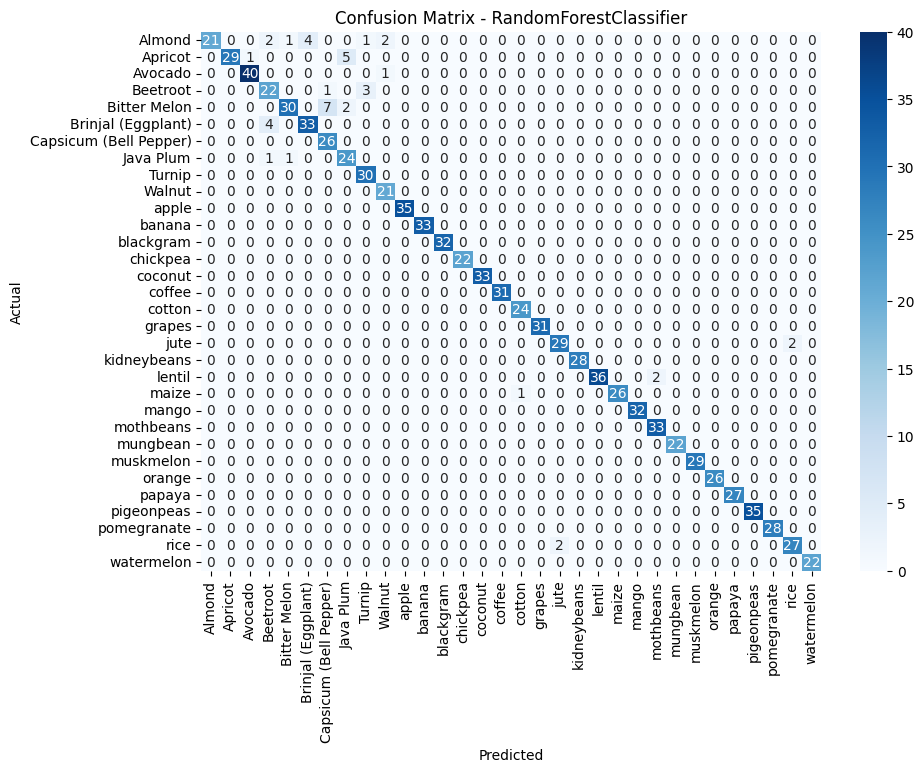


 Model: AdaBoost

 Training Performance:
Accuracy  : 0.1643
Precision : 0.1643
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00        74
           7       0.00      0.00      0.00        74
           8       0.00      0.00      0.00        70
           9       0.04      1.00      0.08        79
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        67
          12       0.00      0.00      0.00        68
          13       0.52      1.00      0.68        78
          14       0.00      0.00      0.00        67
          15       0.00      0.0

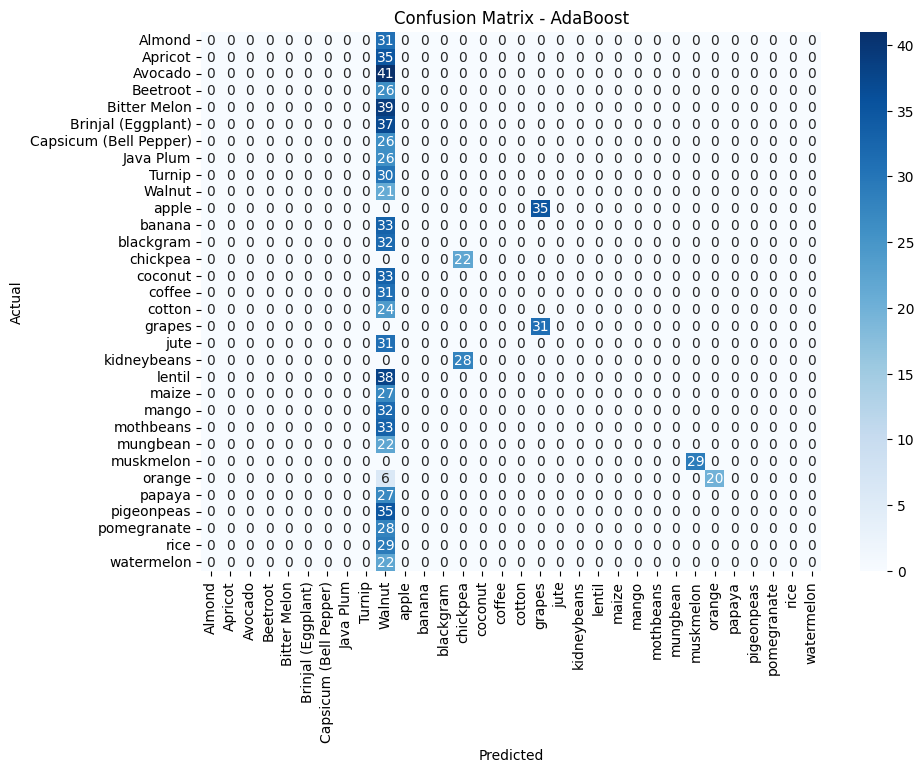


 Model: BaggingClassifier

 Training Performance:
Accuracy  : 1.0000
Precision : 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        79
          10       1.00      1.00      1.00        65
          11       1.00      1.00      1.00        67
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        67
          15       1.00

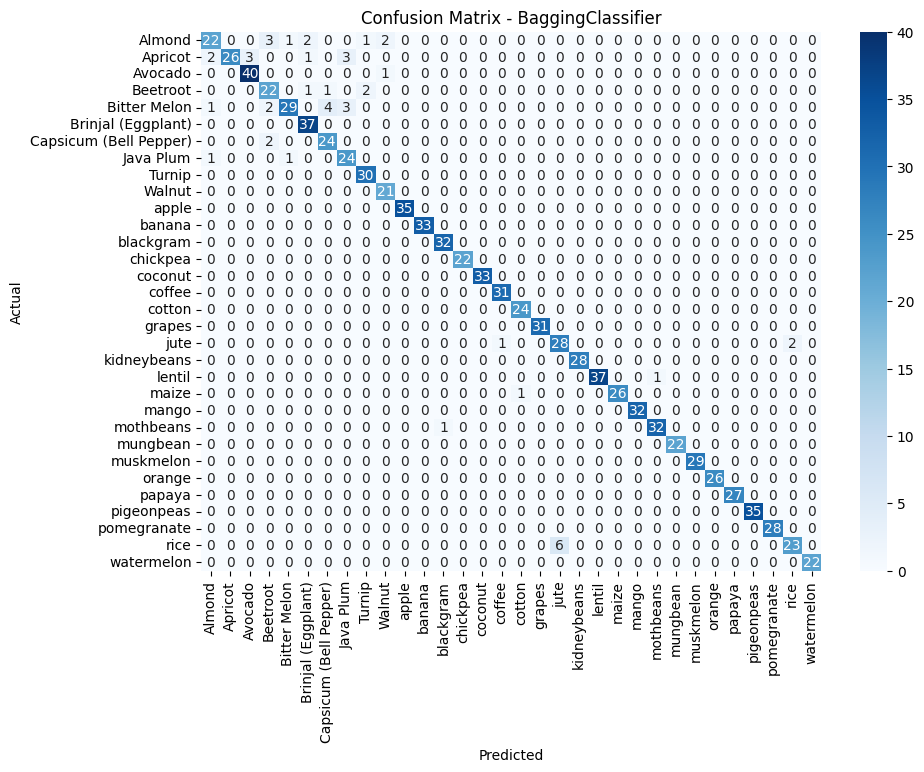


 Model: ExtraTreesClassifier

 Training Performance:
Accuracy  : 1.0000
Precision : 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        79
          10       1.00      1.00      1.00        65
          11       1.00      1.00      1.00        67
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        67
          15       1

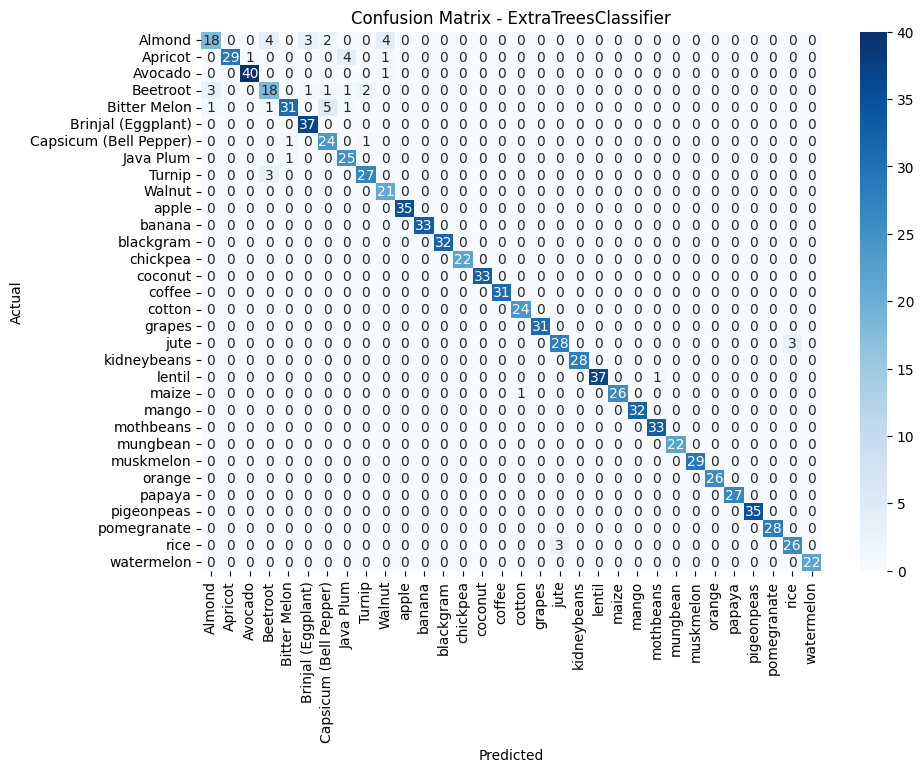


 Model: GradientBoostingClassifier

 Training Performance:
Accuracy  : 0.9996
Precision : 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        59
           3       0.99      1.00      0.99        74
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        79
          10       1.00      1.00      1.00        65
          11       1.00      1.00      1.00        67
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        67
          15  

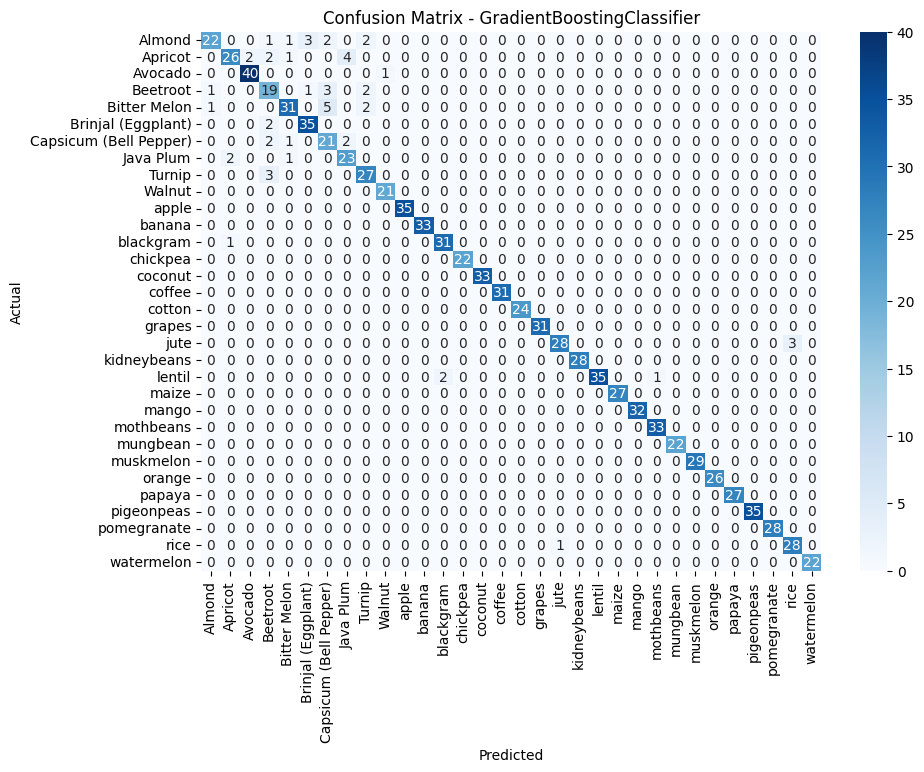


 Model: XGBClassifier

 Training Performance:
Accuracy  : 1.0000
Precision : 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        61
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        74
           8       1.00      1.00      1.00        70
           9       1.00      1.00      1.00        79
          10       1.00      1.00      1.00        65
          11       1.00      1.00      1.00        67
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        78
          14       1.00      1.00      1.00        67
          15       1.00    

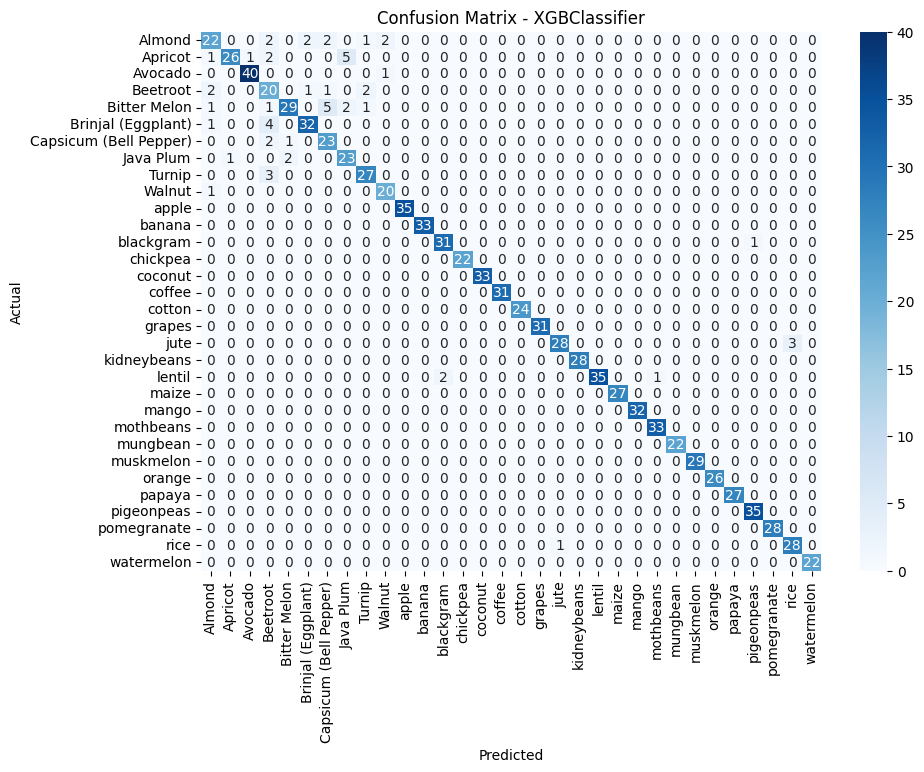

In [83]:
#  Function to train and evaluate a classifier


def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # Train the model

    #  Predictions
    y_train_pred = model.predict(X_train)  # Predict on training data
    y_test_pred = model.predict(X_test)    # Predict on test data

    # Accuracy and Precision scores
    train_accuracy = accuracy_score(y_train, y_train_pred)         # ✅ Train Accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)            # ✅ Test Accuracy

    train_precision = precision_score(y_train, y_train_pred, average='micro')  #  Train Precision
    test_precision = precision_score(y_test, y_test_pred, average='micro')     #  Test Precision

    return train_accuracy, test_accuracy, train_precision, test_precision, y_train_pred, y_test_pred

# 🗂️ 2. Initialize lists to store metrics
train_accuracy_scores = []     #  To store training accuracy
train_precision_scores = []    #  To store training precision
test_accuracy_scores = []      #  To store test accuracy
test_precision_scores = []     #  To store test precision

# 🔁 3. Iterate through all models
for name, model in models.items():
    print(f"\n Model: {name}")  #  Model Name

    # 🏋️‍♂️ Train and evaluate the model
    train_acc, test_acc, train_prec, test_prec, y_train_pred, y_test_pred = train_classifier(
        model, X_train, y_train, X_test, y_test
    )

    #  4. Training Performance
    print("\n Training Performance:")
    print(f"Accuracy  : {train_acc:.4f}")         # Training Accuracy
    print(f"Precision : {train_prec:.4f}")        # Training Precision
    print("Classification Report:")
    print(classification_report(y_train, y_train_pred, zero_division=0))  # 📋 Detailed classification report

    #  5. Testing Performance
    print("\n Testing Performance:")
    print(f"Accuracy  : {test_acc:.4f}")          # Test Accuracy
    print(f"Precision : {test_prec:.4f}")         # Test Precision
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=0))  # 📋 Detailed classification report

    # 📉 6. Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)  # 🧮 Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')  # 🖼️ Heatmap Title
    plt.show()

    # 🧾 7. Store model performance metrics
    train_accuracy_scores.append(train_acc)
    train_precision_scores.append(train_prec)
    test_accuracy_scores.append(test_acc)
    test_precision_scores.append(test_prec)

In [39]:
# 📊 Create a summary DataFrame of all models and their performance
summary_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Accuracy': train_accuracy_scores,
    'Train Precision': train_precision_scores,
    'Test Accuracy': test_accuracy_scores,
    'Test Precision': test_precision_scores
})

# 📋 Show the summary table sorted by Test Accuracy
summary_df = summary_df.sort_values(by='Test Accuracy', ascending=False)
display(summary_df)

Model  Train Accuracy  Train Precision  Test Accuracy  \
4      RandomForestClassifier        0.999554         0.999554       0.955208   
6           BaggingClassifier        1.000000         1.000000       0.948958   
7        ExtraTreesClassifier        1.000000         1.000000       0.947917   
8  GradientBoostingClassifier        0.999554         0.999554       0.942708   
9               XGBClassifier        1.000000         1.000000       0.939583   
0                         SVC        0.962500         0.962500       0.915625   
1        KNeighborsClassifier        0.913839         0.913839       0.870833   
3          LogisticRegression        0.857143         0.857143       0.837500   
2      DecisionTreeClassifier        0.264286         0.264286       0.207292   
5                    AdaBoost        0.164286         0.164286       0.128125   

   Test Precision  
4        0.955208  
6        0.948958  
7        0.947917  
8        0.942708  
9        0.939583  
0        0.915625  
1        0.870833  
3        0.837500  
2        0.207292  
5        0.128125

# ==============================
# 📊 PLOT GROUPED BAR CHART
# ==============================

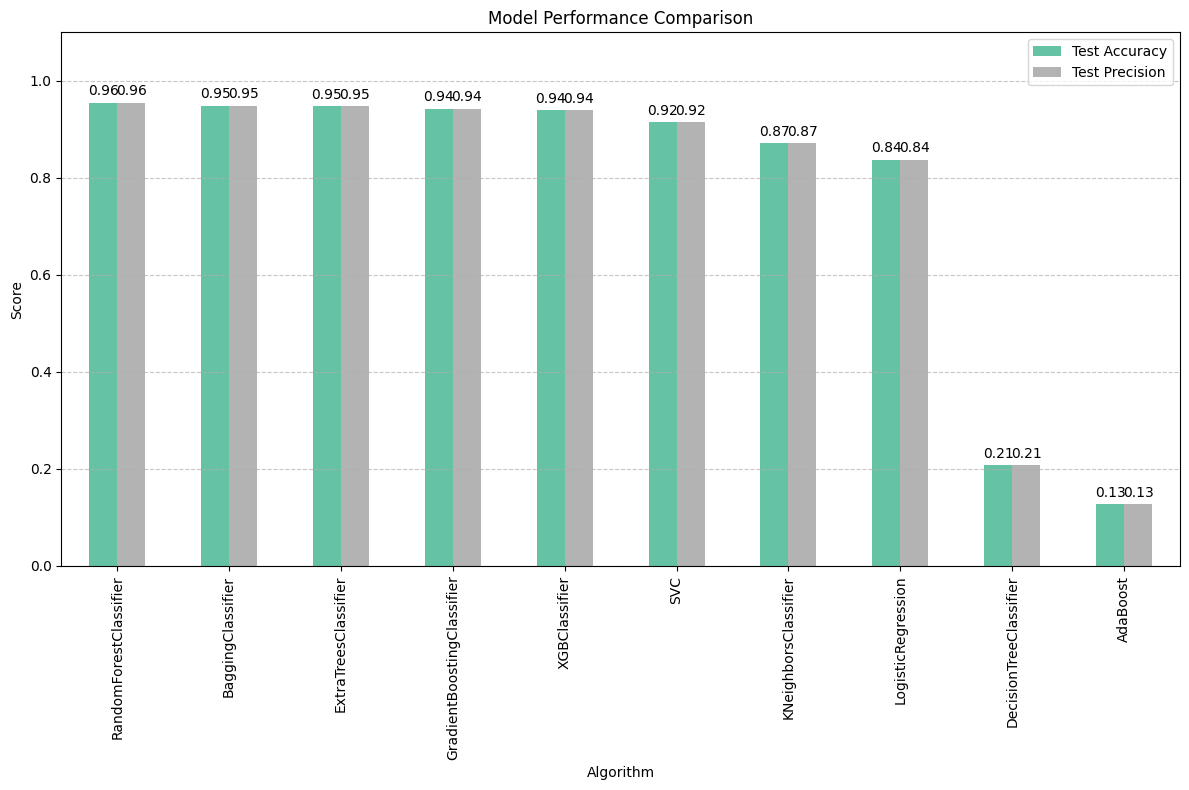

In [40]:


# 🏷️ Set 'Algorithm' as index and select columns to plot
ax = summary_df.set_index('Model')[['Test Accuracy', 'Test Precision']].plot(
    kind='bar',                # 📊 Bar chart
    figsize=(12, 8),           # 📐 Figure size
    colormap='Set2'            # 🎨 Color palette
)

# 🖼️ Chart titles and labels
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Algorithm")
plt.xticks(rotation=90)        # 🔄 Rotate x-axis labels vertically for readability
plt.ylim(0, 1.1)              # 📏 Y-axis limit with extra space for labels above bars
plt.legend(loc='upper right') # 🗂️ Legend position
plt.tight_layout()            # 🧹 Adjust layout for neatness
plt.grid(axis='y', linestyle='--', alpha=0.7)  # ➖ Horizontal grid lines

# 🏷️ Add value labels above each bar for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# 🖥️ Display the plot
plt.show()


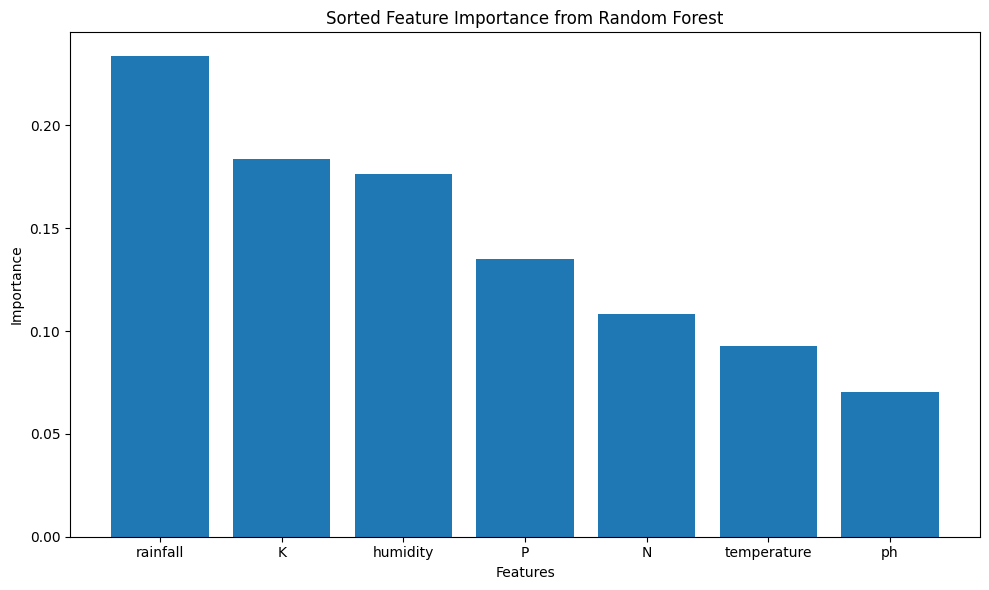

In [41]:

# Get feature importances and sort them
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot sorted features
plt.figure(figsize=(10, 6))
plt.bar([X_train.columns[i] for i in indices], importances[indices])
plt.title('Sorted Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)



In [43]:
# Perform grid search with cross-validation
Rfc_GC = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [44]:
# Fit to training data
Rfc_GC.fit(X_train, y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=2)

In [45]:
#Access Full Result
cv_results = pd.DataFrame(Rfc_GC.cv_results_)
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)
print(cv_results[['params', 'mean_test_score']].head())


                                                params  mean_test_score
850  {'bootstrap': False, 'criterion': 'gini', 'max...         0.963840
877  {'bootstrap': False, 'criterion': 'gini', 'max...         0.963840
59   {'bootstrap': True, 'criterion': 'gini', 'max_...         0.963394
845  {'bootstrap': False, 'criterion': 'gini', 'max...         0.963394
194  {'bootstrap': True, 'criterion': 'gini', 'max_...         0.963394


In [46]:

print("Best Parameters:\n", Rfc_GC.best_params_)
best_rf = Rfc_GC.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("A")


Best Parameters:
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       1.00      0.86      0.92        35
           2       0.98      0.98      0.98        41
           3       0.81      0.85      0.83        26
           4       0.97      0.77      0.86        39
           5       0.92      0.95      0.93        37
           6       0.76      1.00      0.87        26
           7       0.81      0.96      0.88        26
           8       0.91      1.00      0.95        30
           9       0.84      1.00      0.91        21
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00      

In [85]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):

    print(f"=== Evaluation Report for {model_name} ===\n")

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Confusion Matrix (Test)
    cm = confusion_matrix(y_test, y_test_pred)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy: {:.4f}".format(train_acc))
    print("Testing Accuracy: {:.4f}\n".format(test_acc))

    print("Confusion Matrix (Test Data):")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)  # Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')  # Heatmap Title
    plt.show()

    # Classification Report
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, y_test_pred))

    print("="*50 + "\n")


=== Evaluation Report for Random Forest (Best GridSearch) ===

Training Accuracy: 0.9991
Testing Accuracy: 0.9604

Confusion Matrix (Test Data):


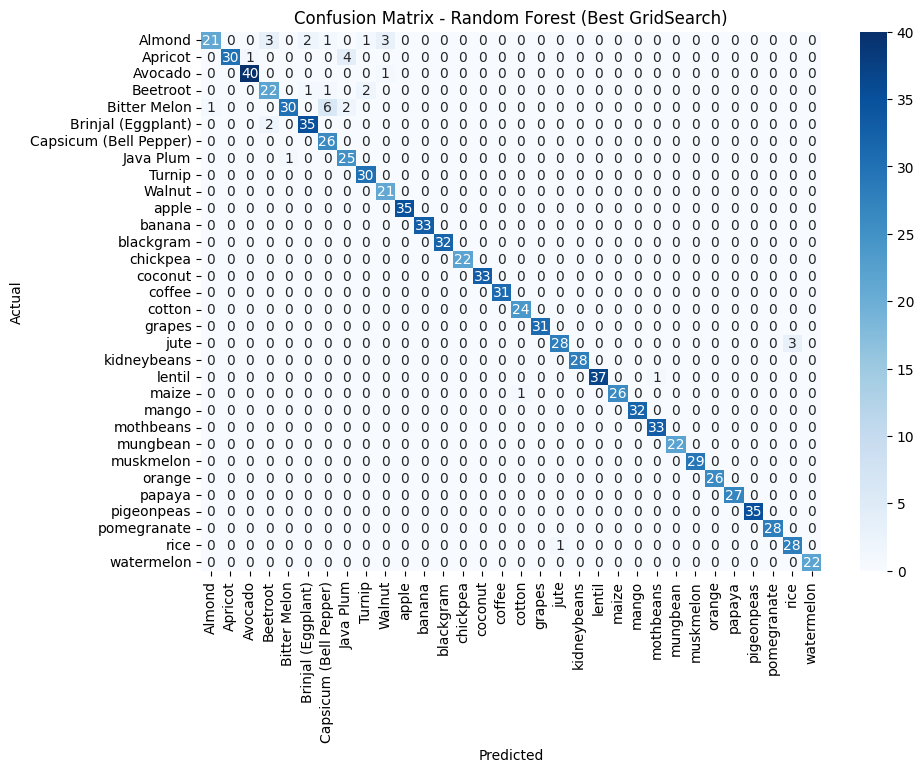


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       1.00      0.86      0.92        35
           2       0.98      0.98      0.98        41
           3       0.81      0.85      0.83        26
           4       0.97      0.77      0.86        39
           5       0.92      0.95      0.93        37
           6       0.76      1.00      0.87        26
           7       0.81      0.96      0.88        26
           8       0.91      1.00      0.95        30
           9       0.84      1.00      0.91        21
          10       1.00      1.00      1.00        35
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        31
          16       0.96      1.00      0.98  

In [86]:
# Evaluate the best model from GridSearchCV
evaluate_model(best_rf, X_train, y_train, X_test, y_test, model_name="Random Forest (Best GridSearch)")


In [47]:
import pickle

# Save Random Forest model
with open('/content/drive/MyDrive/crop/p/best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Save the StandardScaler
with open('/content/drive/MyDrive/crop/p/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the LabelEncoder
with open('/content/drive/MyDrive/crop/p/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the feature column names
with open('/content/drive/MyDrive/crop/p/feature_columns.pkl', 'wb') as f:
    pickle.dump(features.columns.tolist(), f)


In [87]:
new_data = pd.DataFrame([{
    'N': 122,
    'P': 92,
    'K' : 50,
    'temperature': 20,
    'humidity': 90,
    'ph': 6.5,
    'rainfall': 210
}])


In [88]:
new_data_scaled = scaler.transform(new_data)
best_rf.predict(new_data_scaled)

prediction = best_rf.predict(new_data_scaled)

label_encoder.inverse_transform(prediction)



array(['banana'], dtype=object)

# Deep Learing 